## Testing

Index(['1500_2000BA', '125BefAir', '500BefAir', '6000BefAir', '1000BefBone'], dtype='object')
125AftAir
ols_test_std = 12.14428751486192
ols_test_r2 = 0.04981465578000899
ols_test_mae = 10.651101943397775

lasso_test_mae = 10.056816468746321
lasso_test_r2 = 0.146479756954766
lasso_test_std = 11.944662186390877

ridge_test_mae = 10.076261977613756
ridge_test_r2 = 0.14692175253667106
ridge_test_std = 11.945037938708811

{'n_neighbors': 9}
knn_test_mae = 12.244444444444444
knn_test_r2 = -0.08191045279319353
knn_test_std = 13.6902957430022

rf_test_mae = 10.473287380037066
rf_test_r2 = 0.11912699760480971
rf_test_std = 12.648425009900476

{'max_depth': 5, 'max_features': 3, 'n_estimators': 50}
Random Forest with all features
rf_test_mae = 10.807314671844216
rf_test_r2 = 0.06944619155291054
rf_test_std = 12.979100267245787

125BefAir
Index(['250BefAir', '500BefAir', '2000BefAir', '8000BefAir', '1000BefBone'], dtype='object')
250AftAir
ols_test_std = 13.449358118129057
ols_test_r2 = 0.174495

c:\Users\vidre\Desktop\stapedotomy-prediction-code\funct.py:181: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,10))


{'n_neighbors': 9}
knn_test_mae = 7.977777777777778
knn_test_r2 = 0.5754671662583466
knn_test_std = 9.640039956886609

rf_test_mae = 7.020350399926204
rf_test_r2 = 0.6989893638604676
rf_test_std = 8.210759173821211

{'max_depth': 10, 'max_features': 1, 'n_estimators': 100}
Random Forest with all features
rf_test_mae = 7.389919690640744
rf_test_r2 = 0.6655469799830301
rf_test_std = 8.68870590276777

1000BefAir
Index(['Bone*Air', 'ABG', '1500BefAir', '8000BefAir', '1000BefBone',
       '1500BefBone'],
      dtype='object')
1500AftAir
ols_test_std = 7.56119210436839
ols_test_r2 = 0.7296771377830953
ols_test_mae = 5.187383625390863

lasso_test_mae = 5.2566278026434325
lasso_test_r2 = 0.7742610038879285
lasso_test_std = 6.894874185034427

ridge_test_mae = 5.001507366599523
ridge_test_r2 = 0.7810182413723605
ridge_test_std = 6.740377348198481

{'n_neighbors': 9}
knn_test_mae = 6.777777777777779
knn_test_r2 = 0.5838502534651072
knn_test_std = 9.051294157518356

rf_test_mae = 5.054213725087191

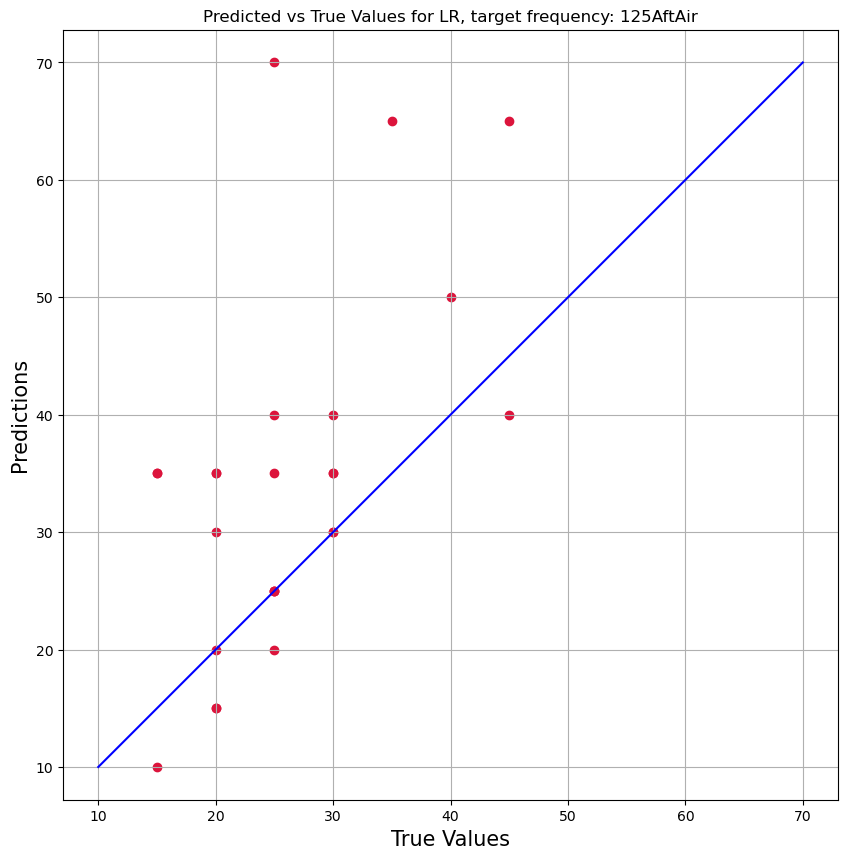

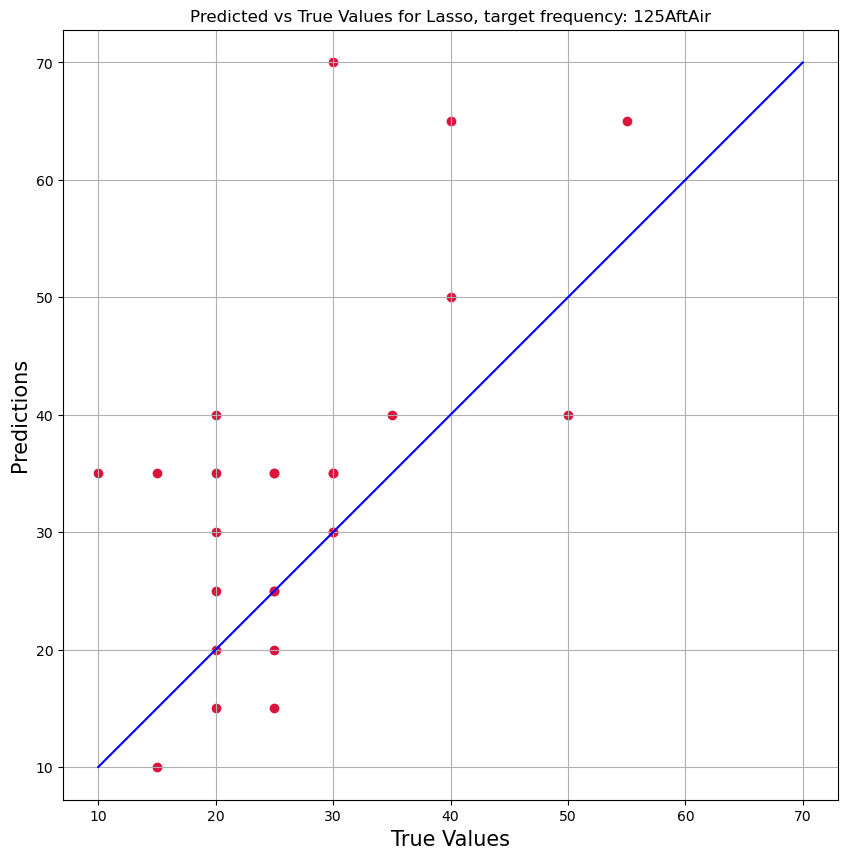

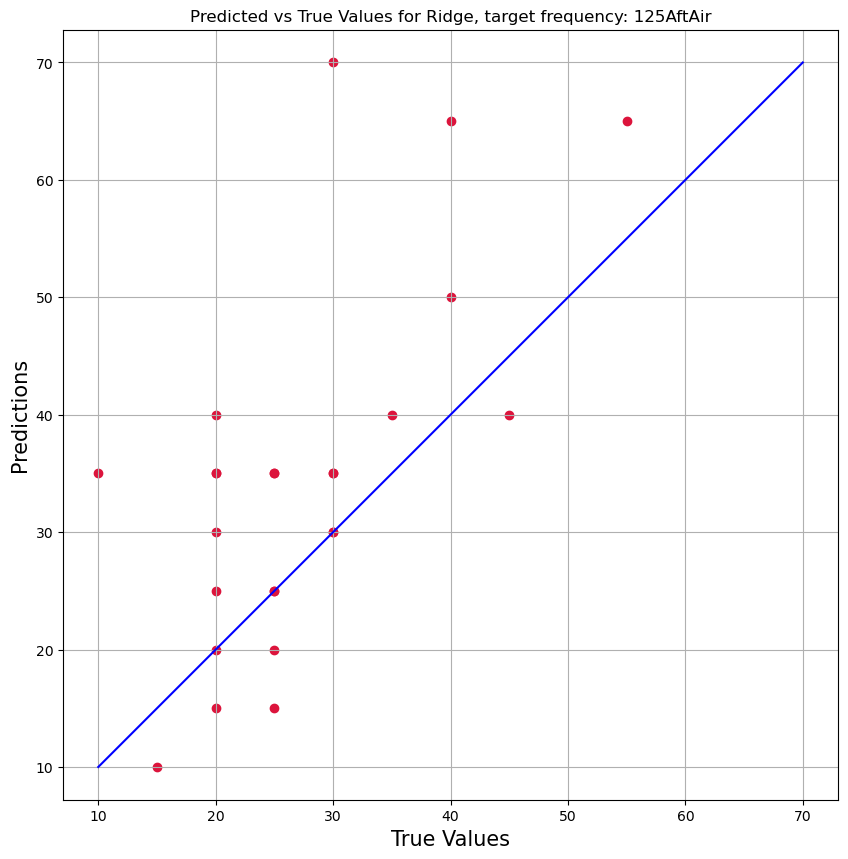

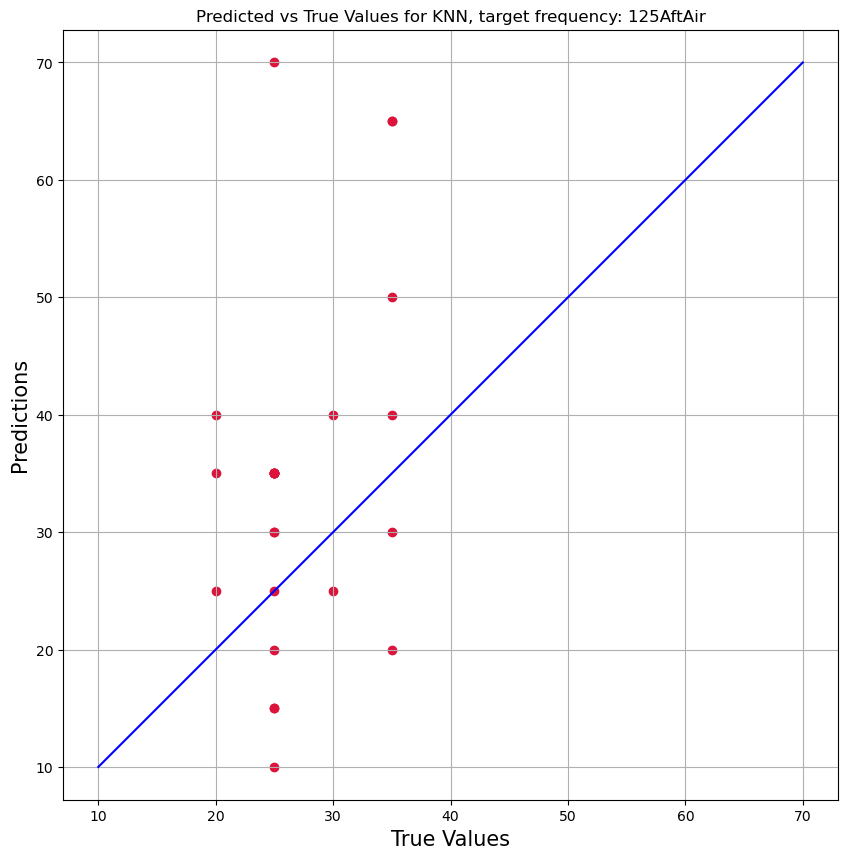

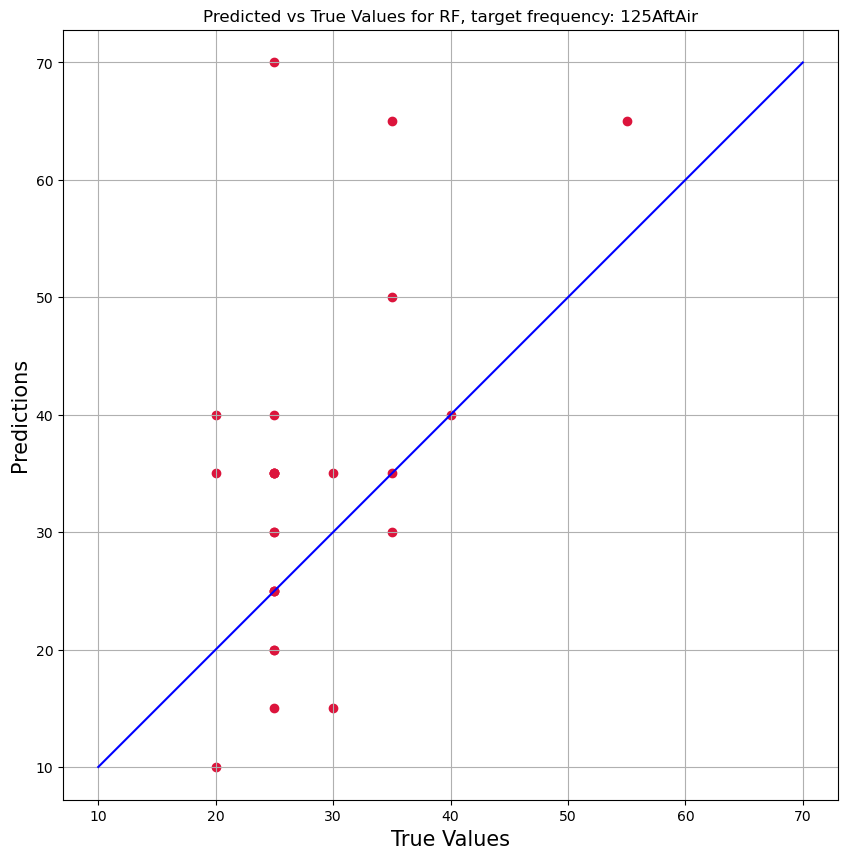

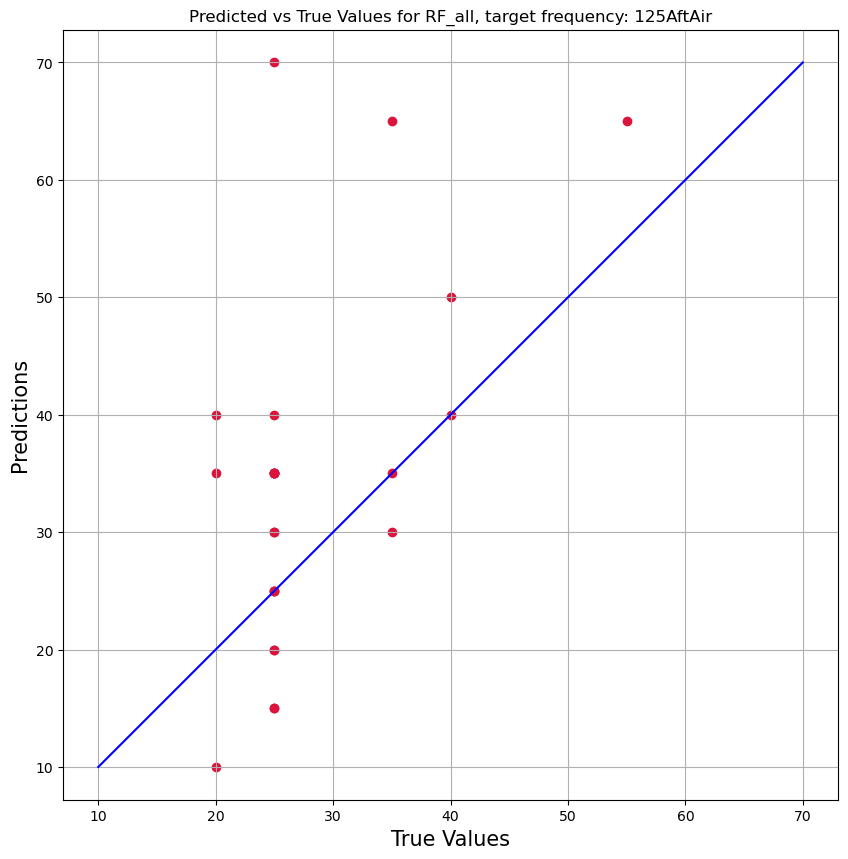

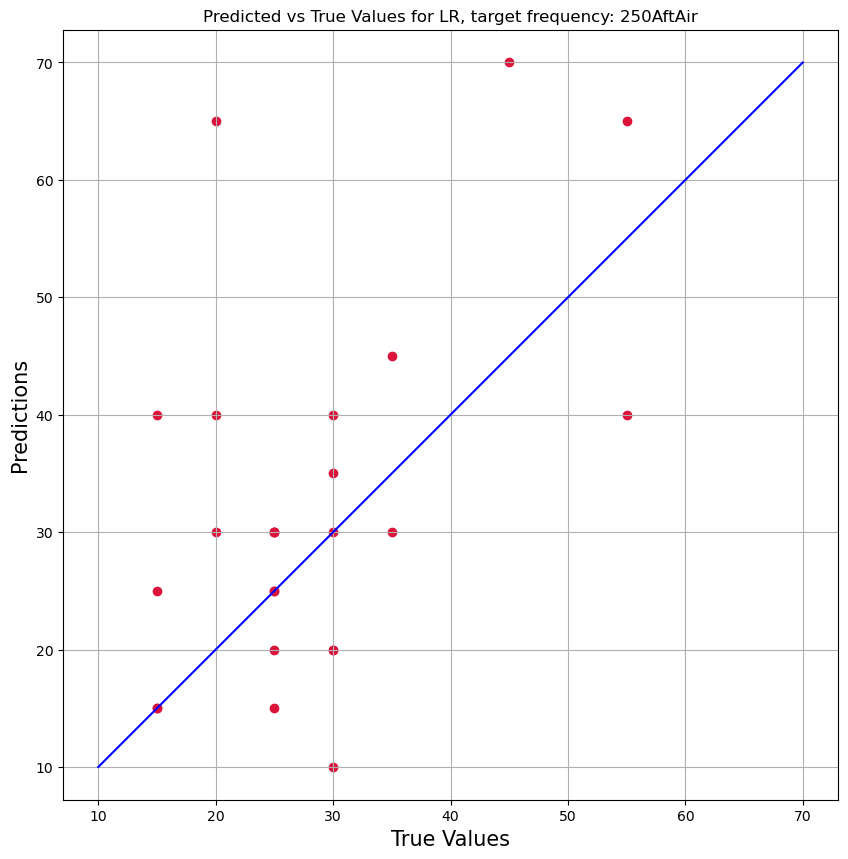

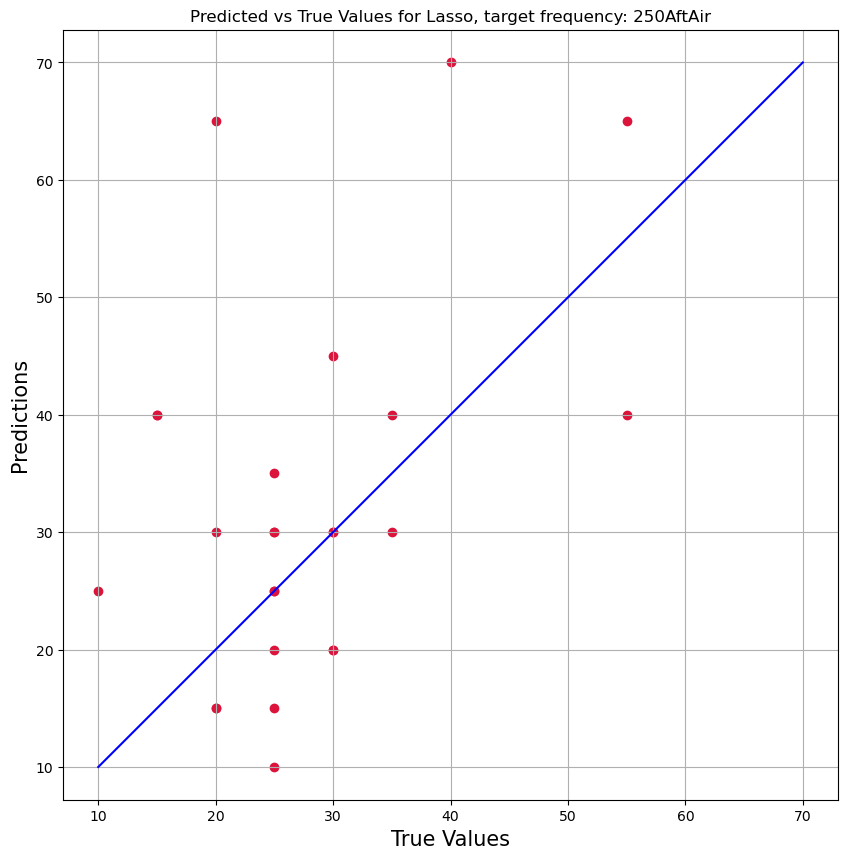

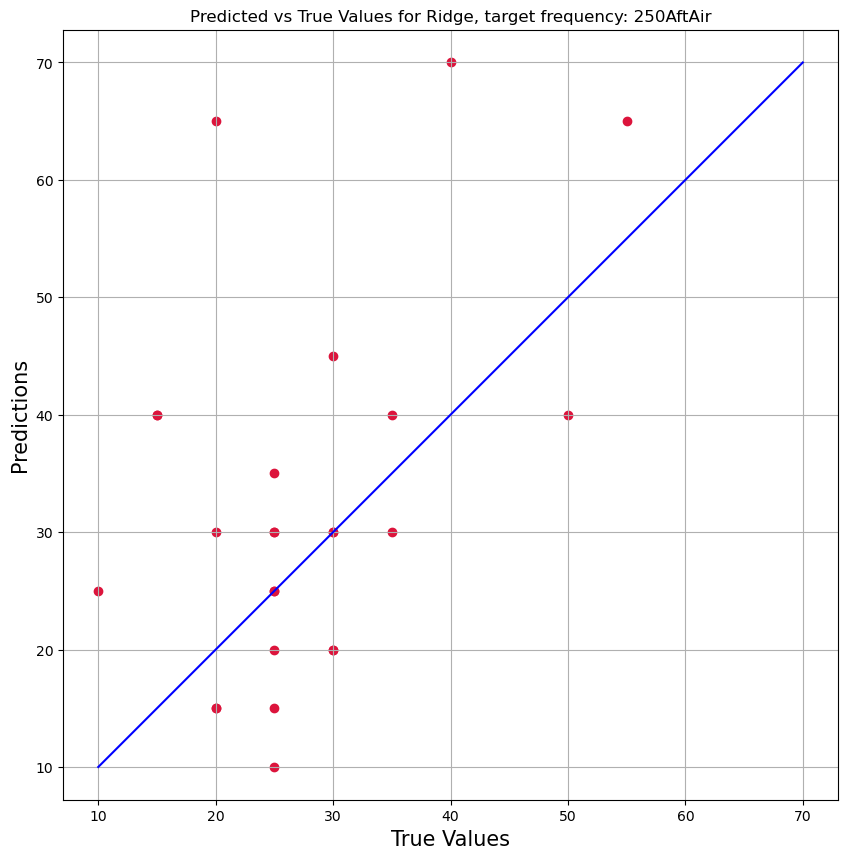

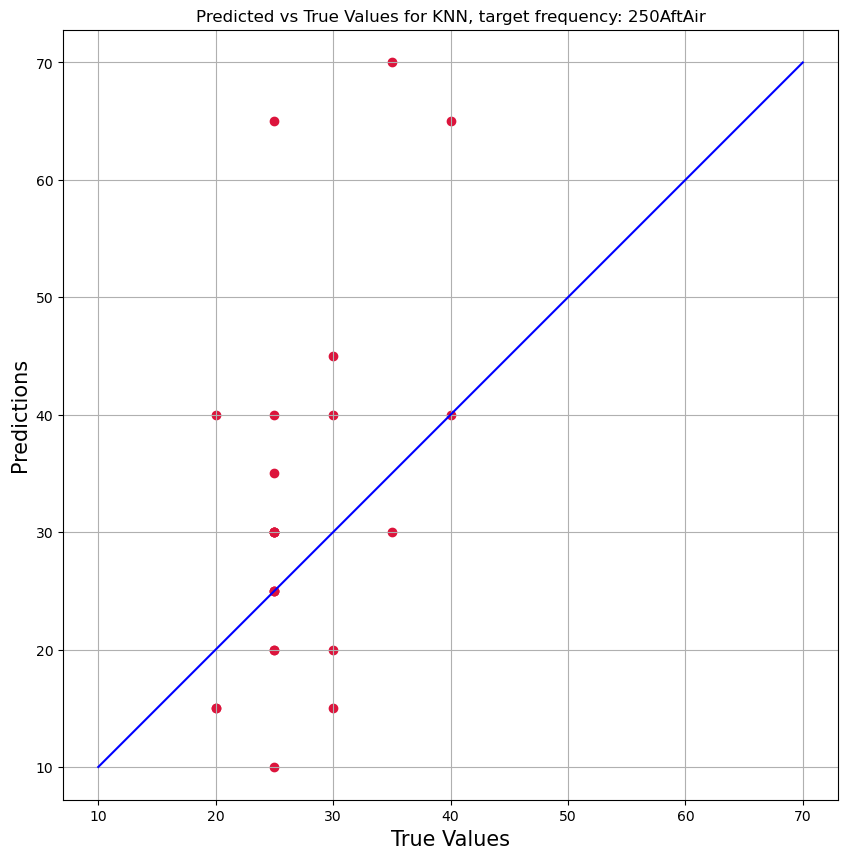

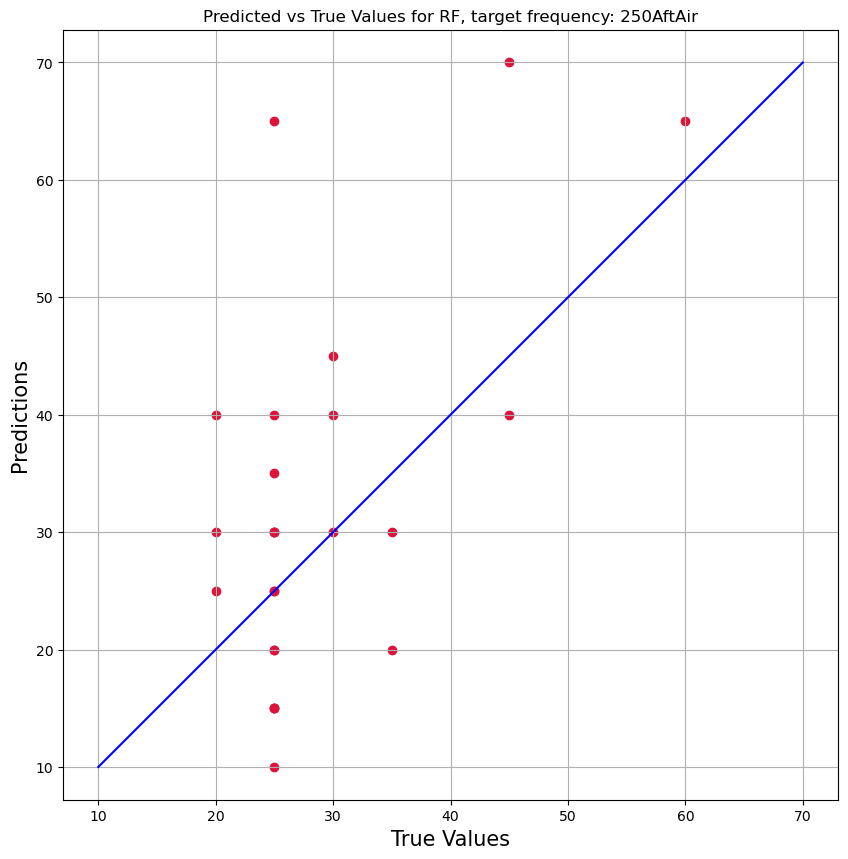

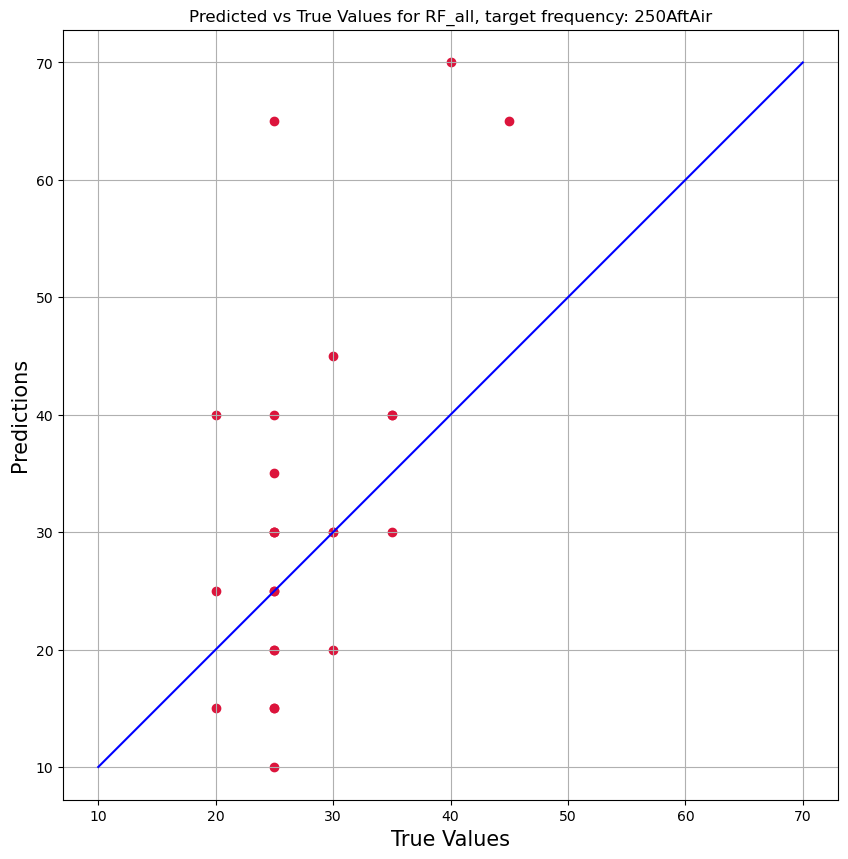

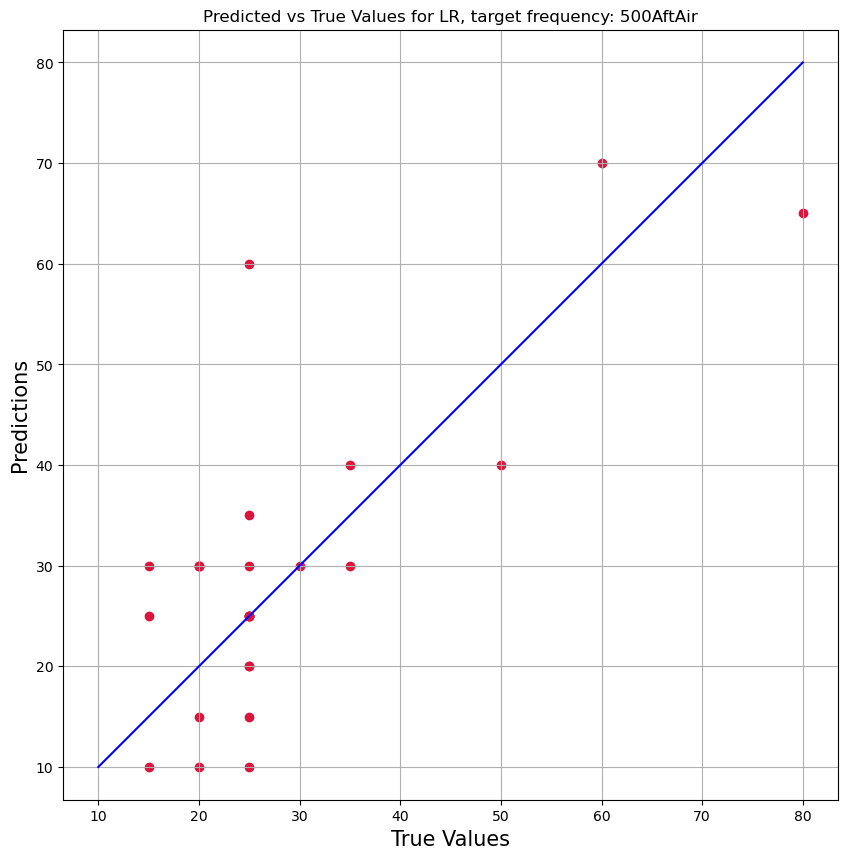

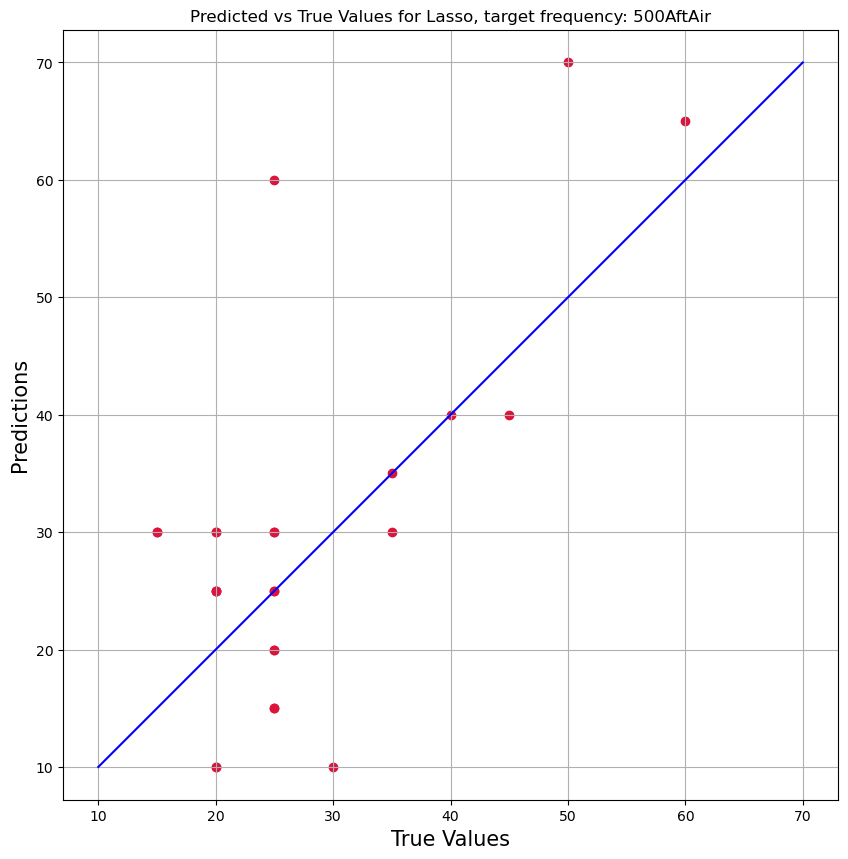

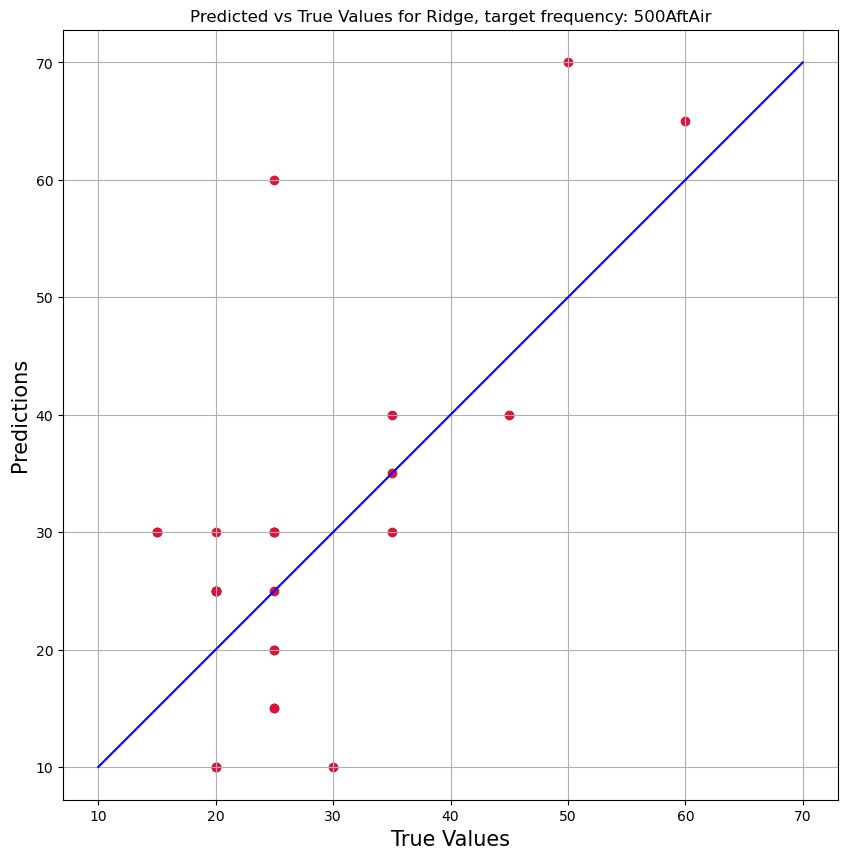

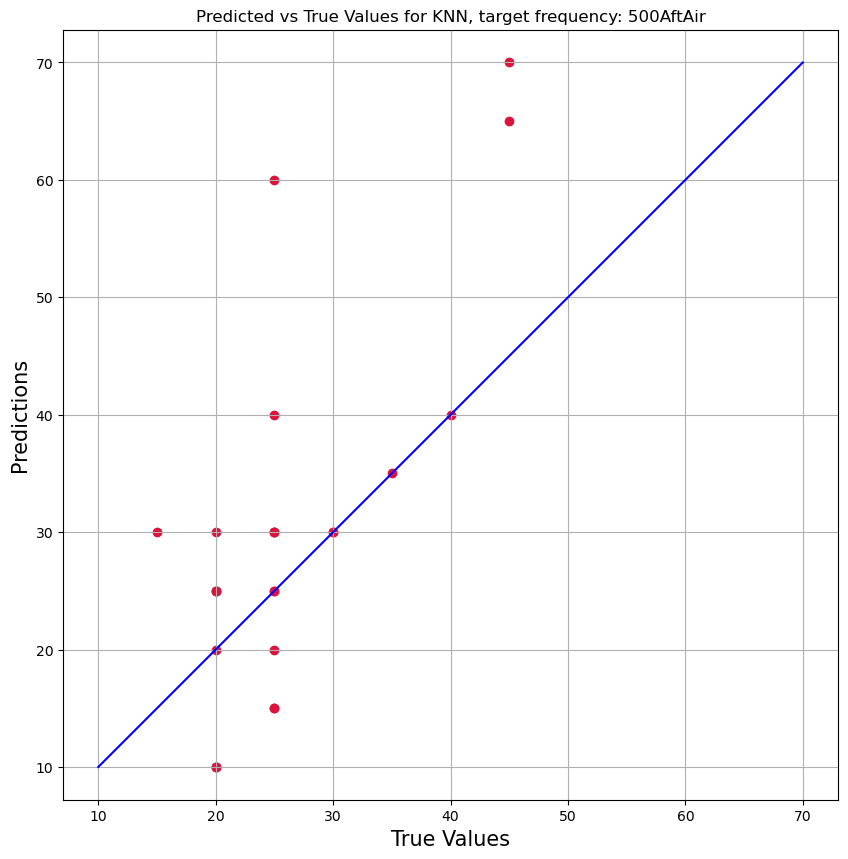

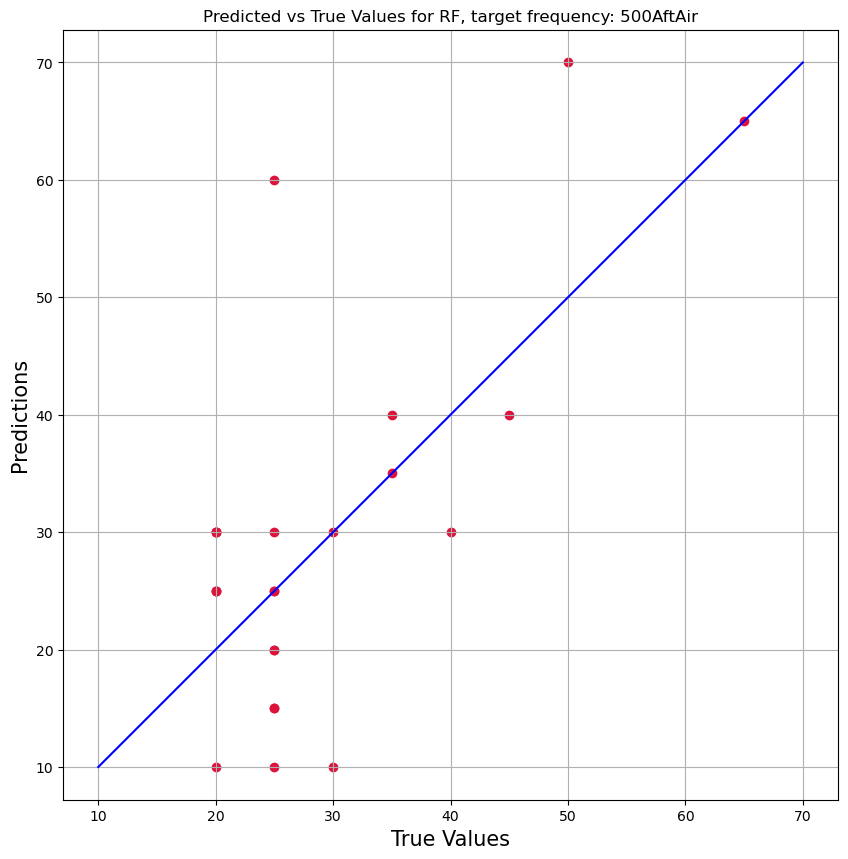

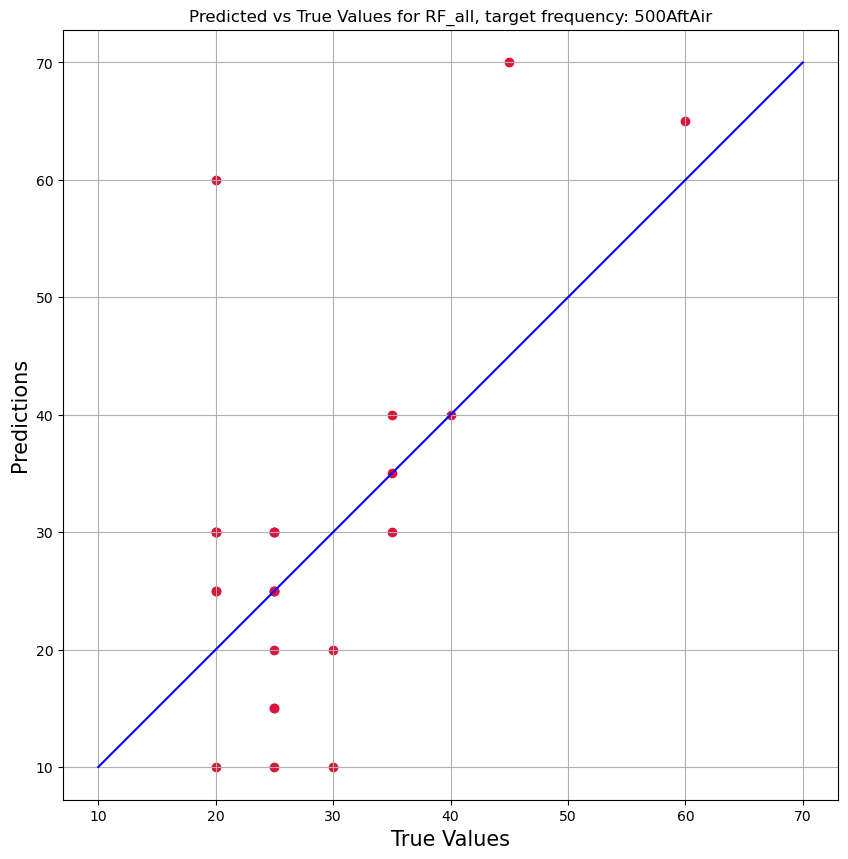

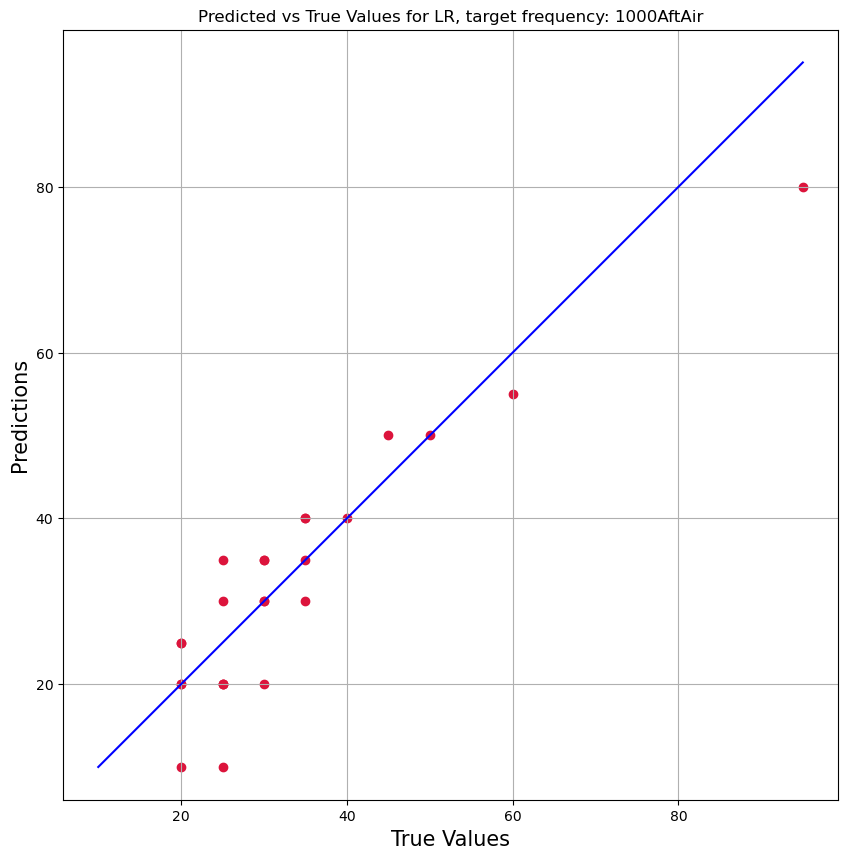

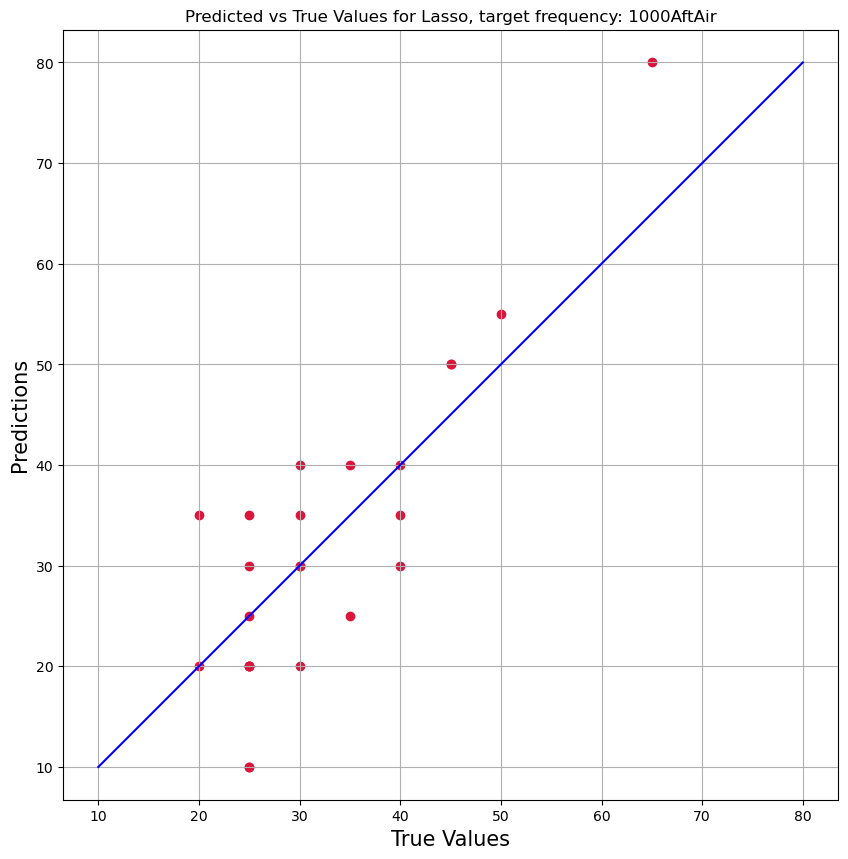

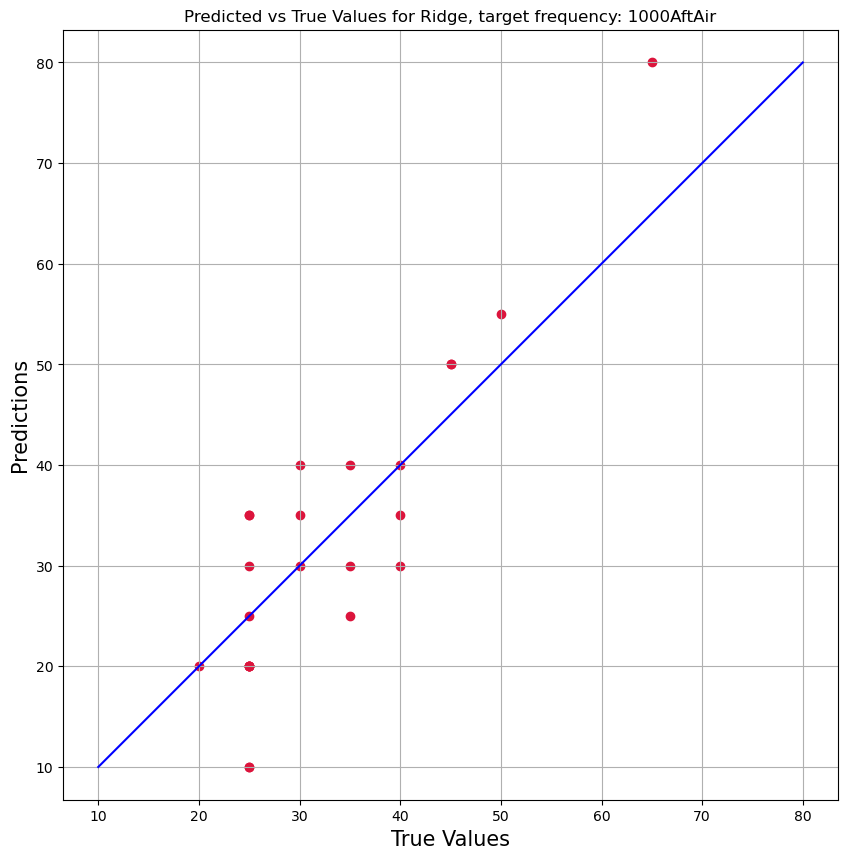

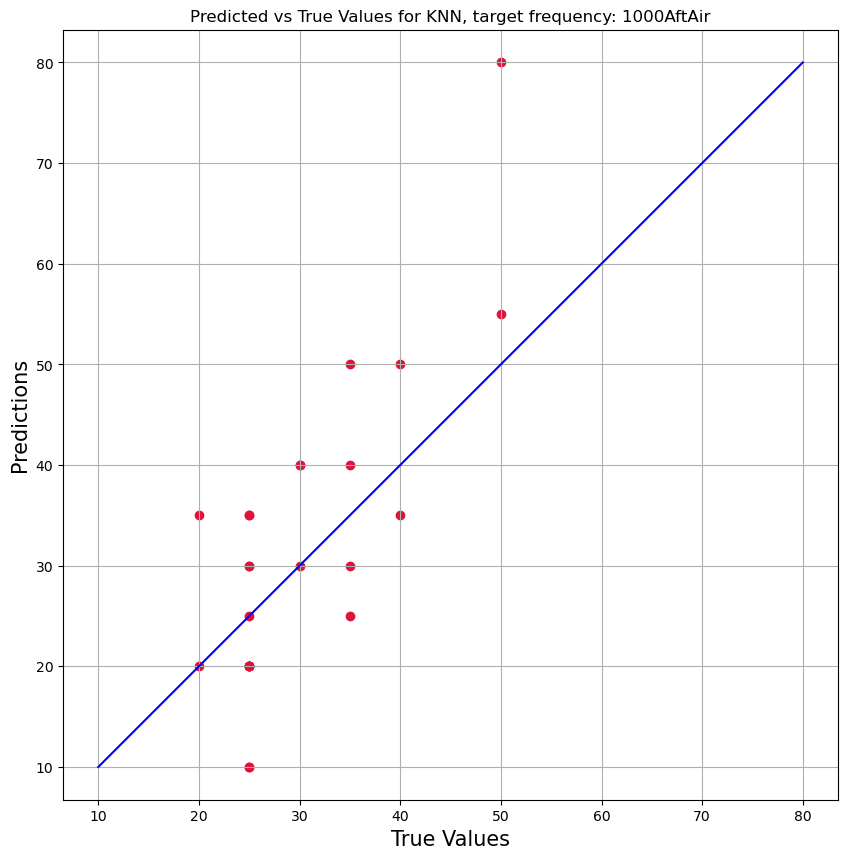

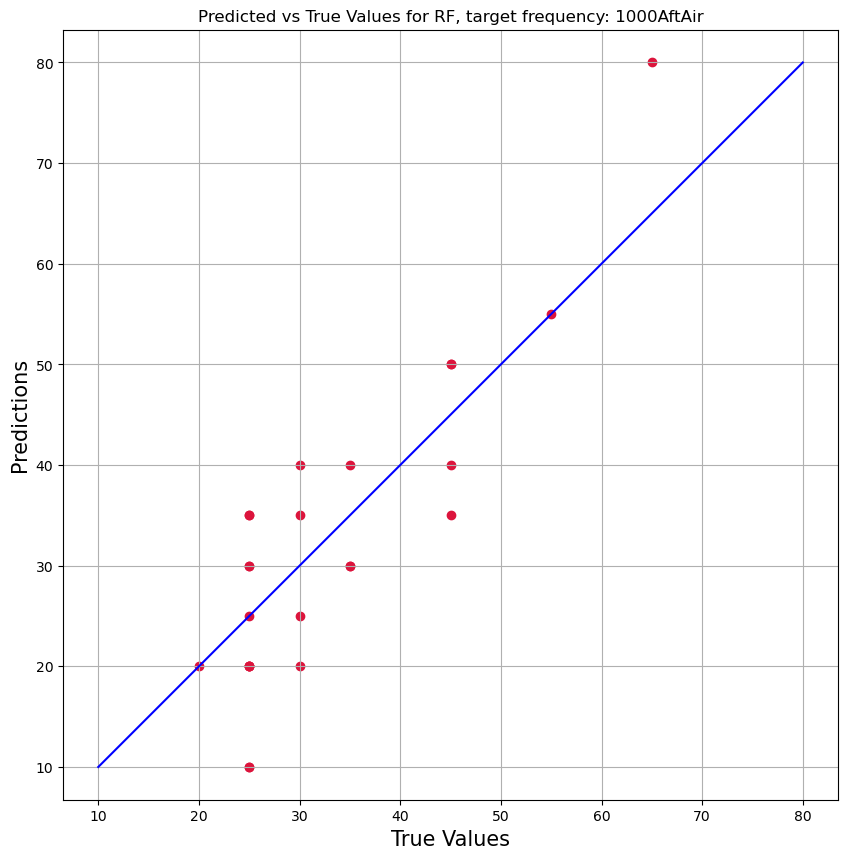

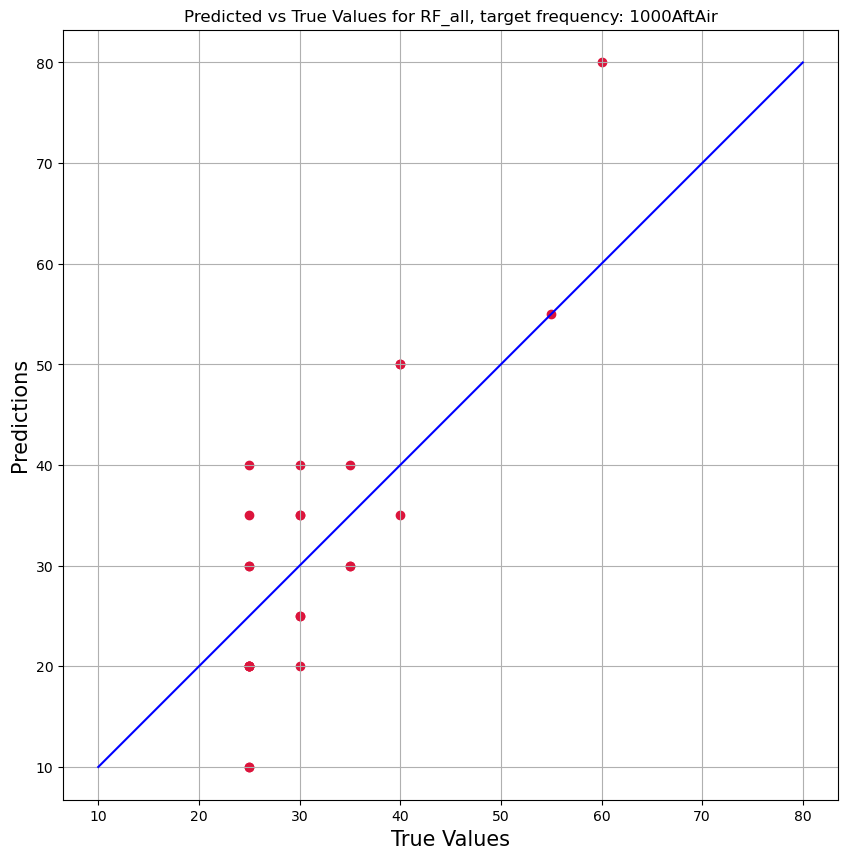

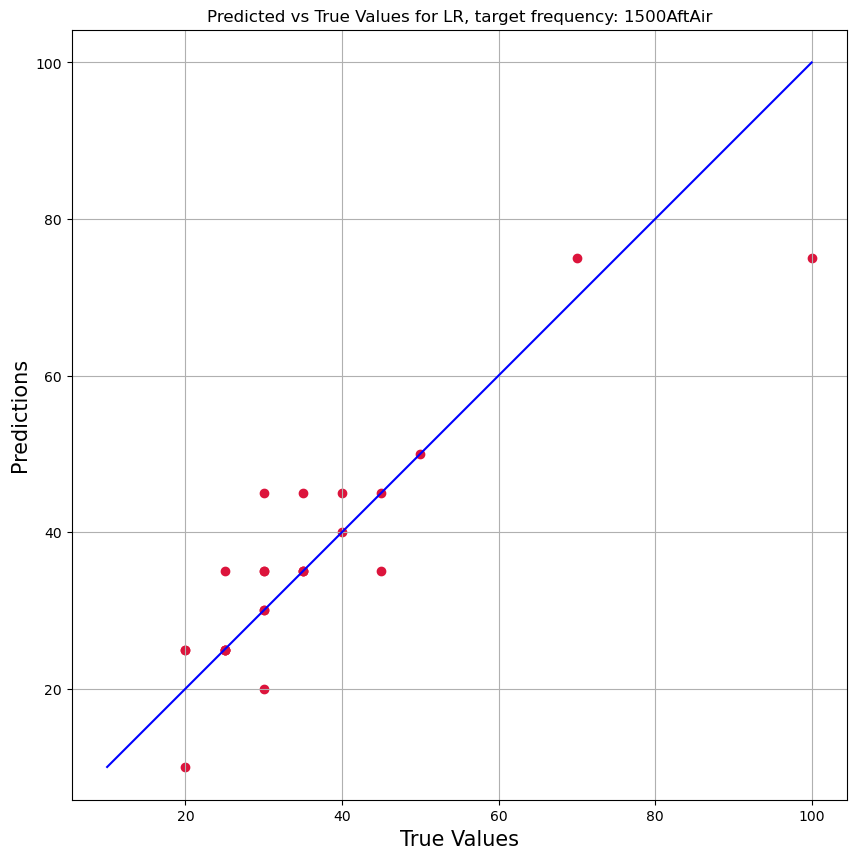

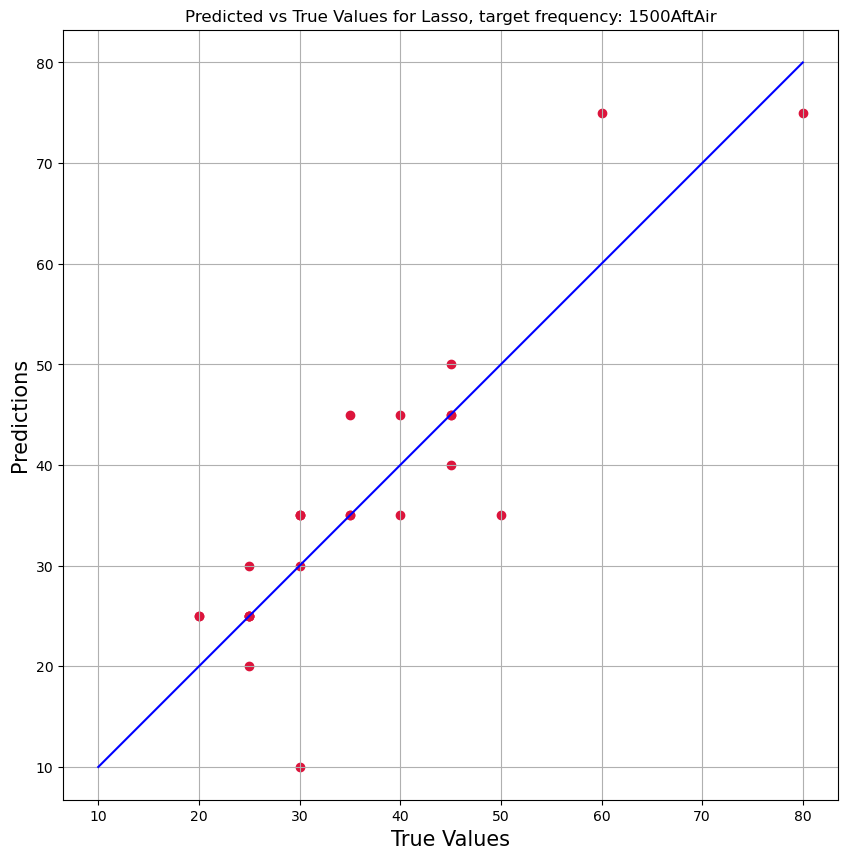

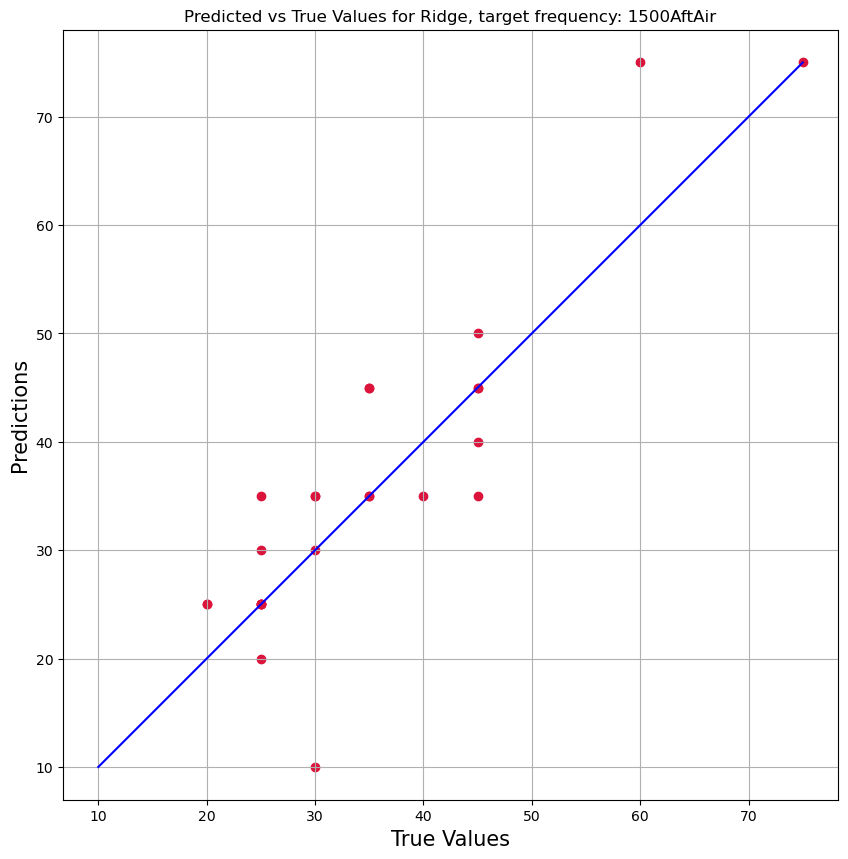

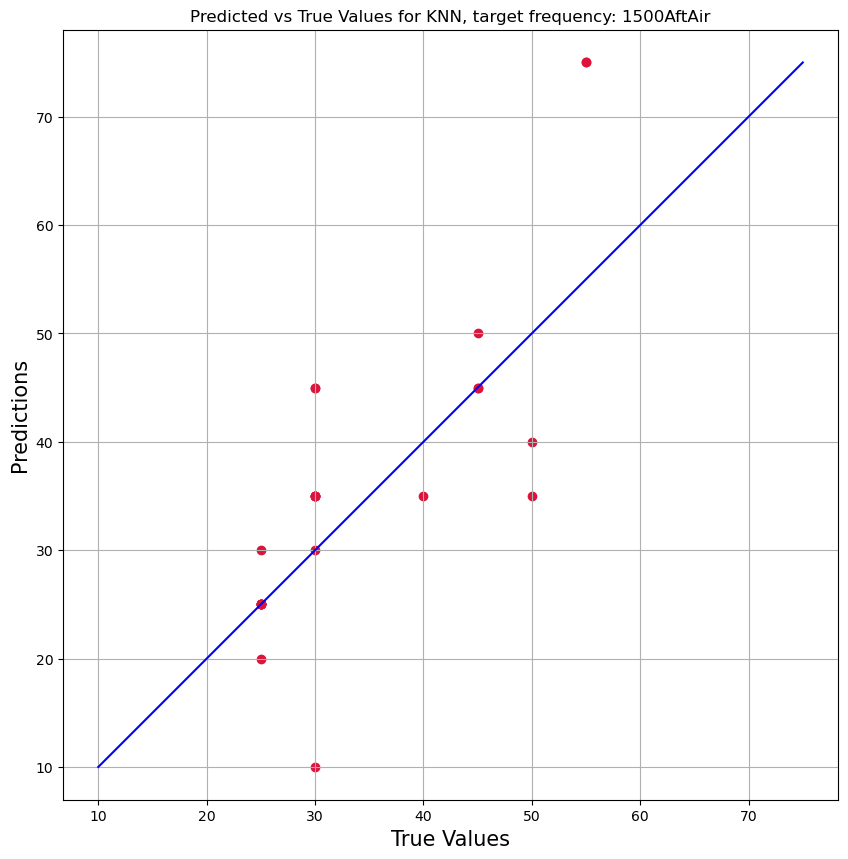

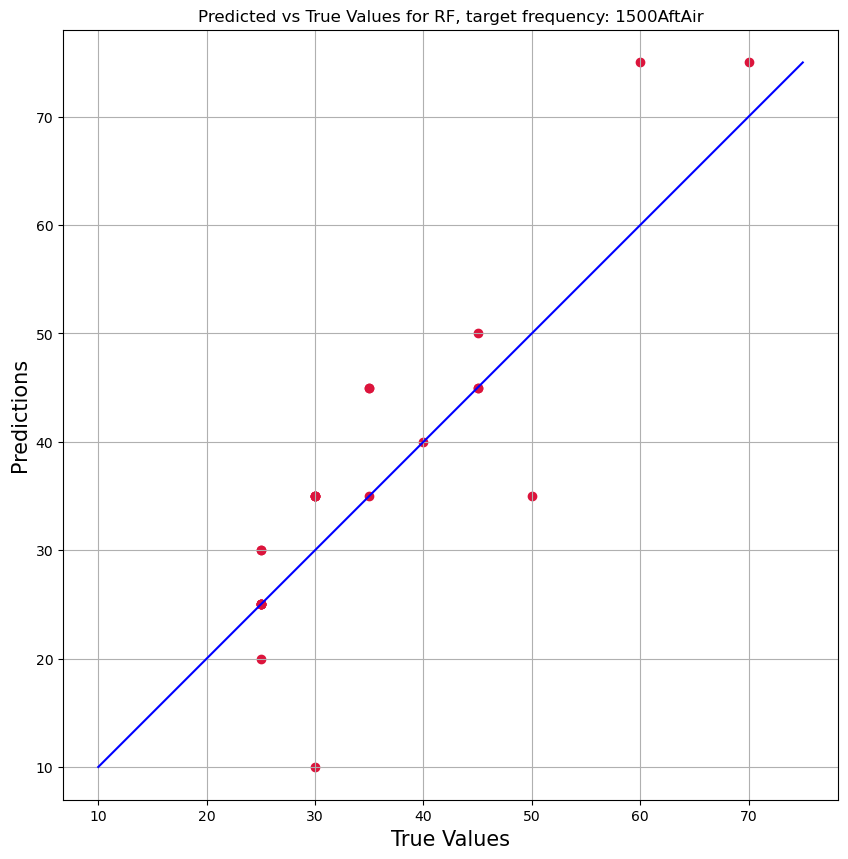

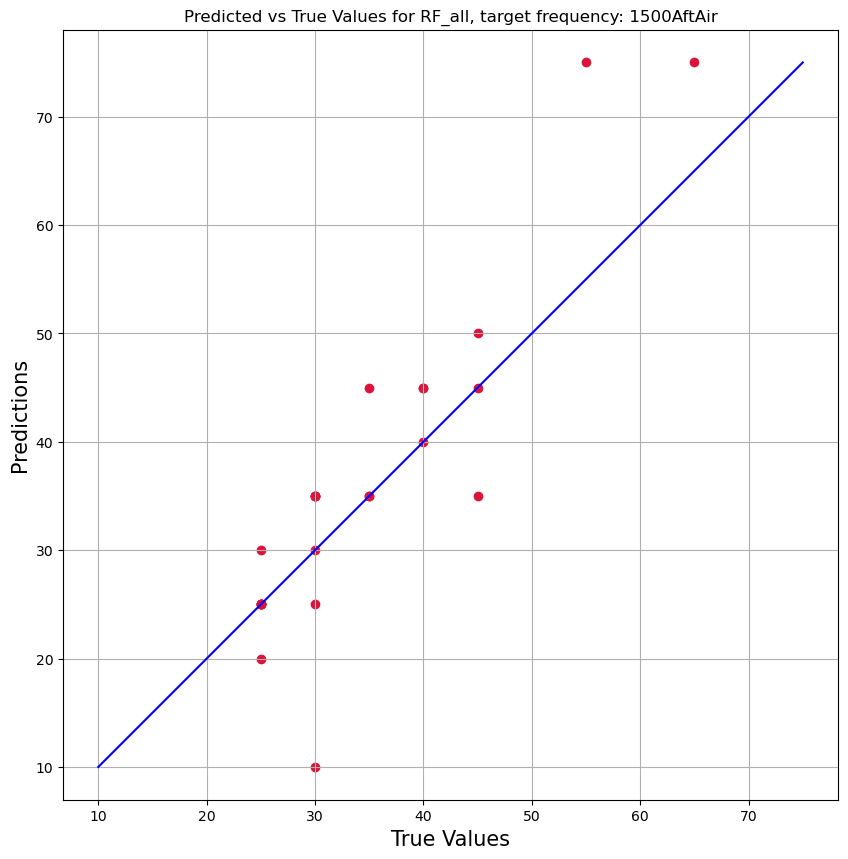

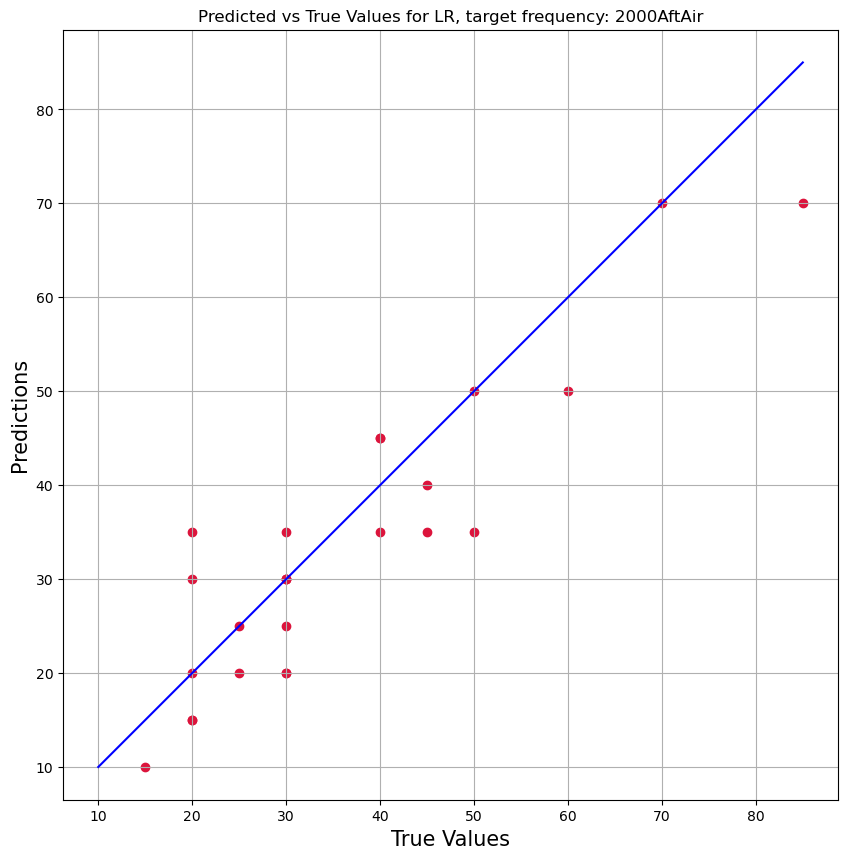

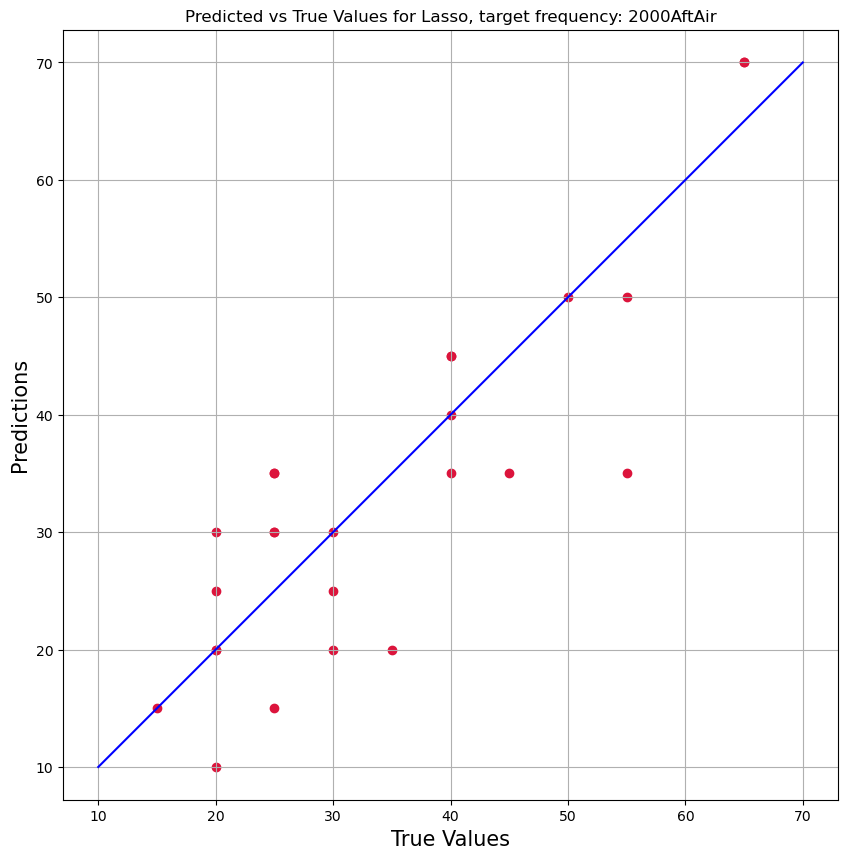

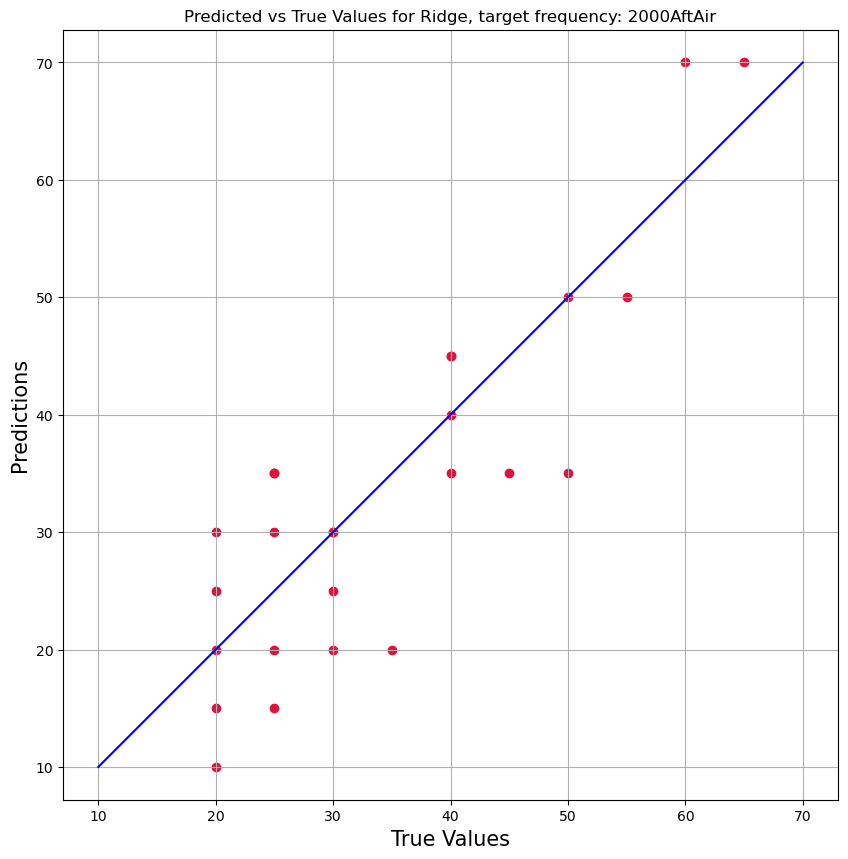

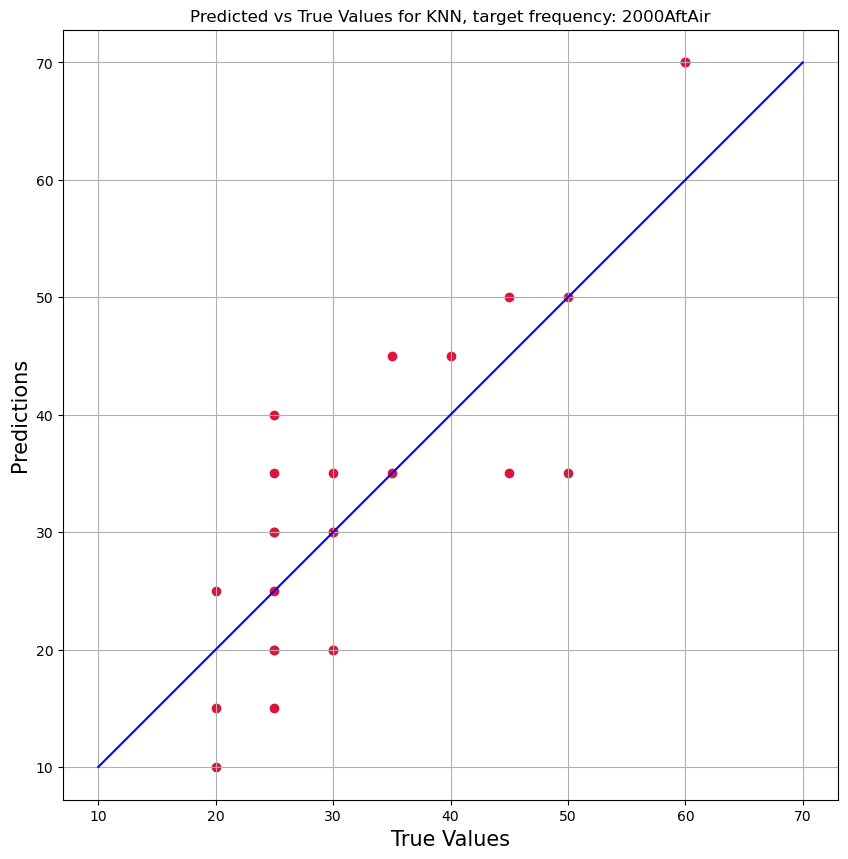

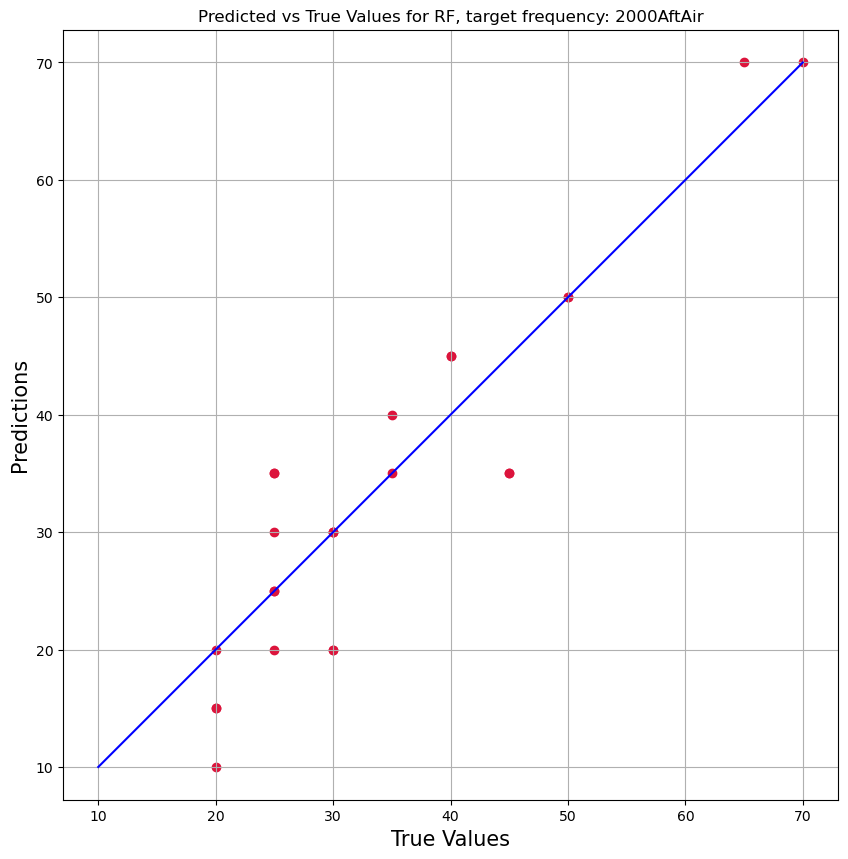

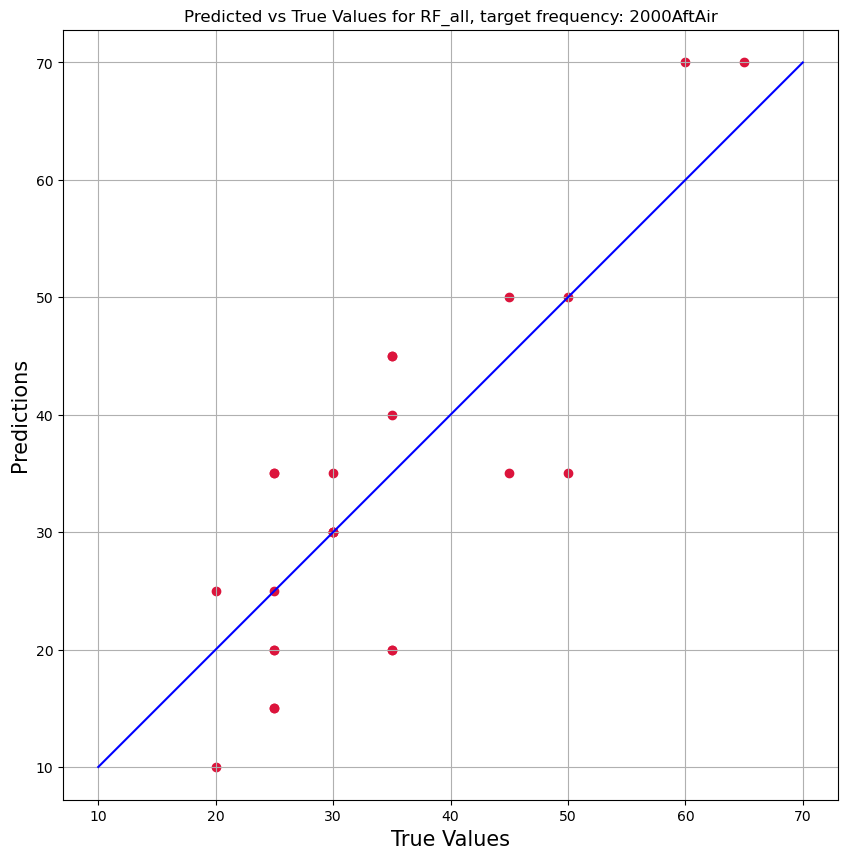

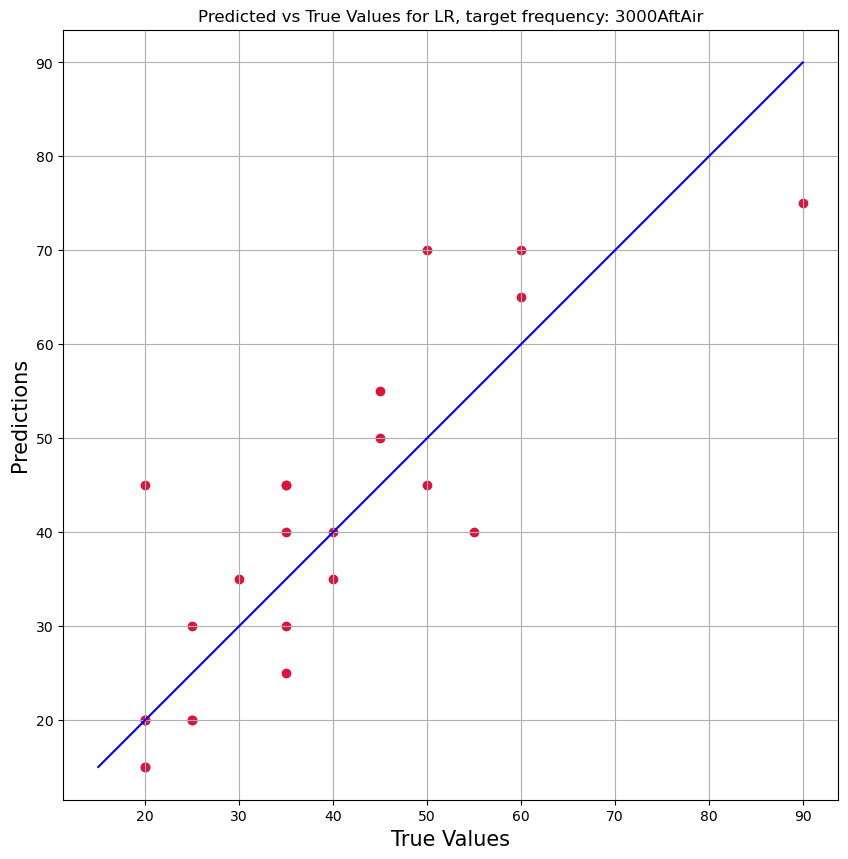

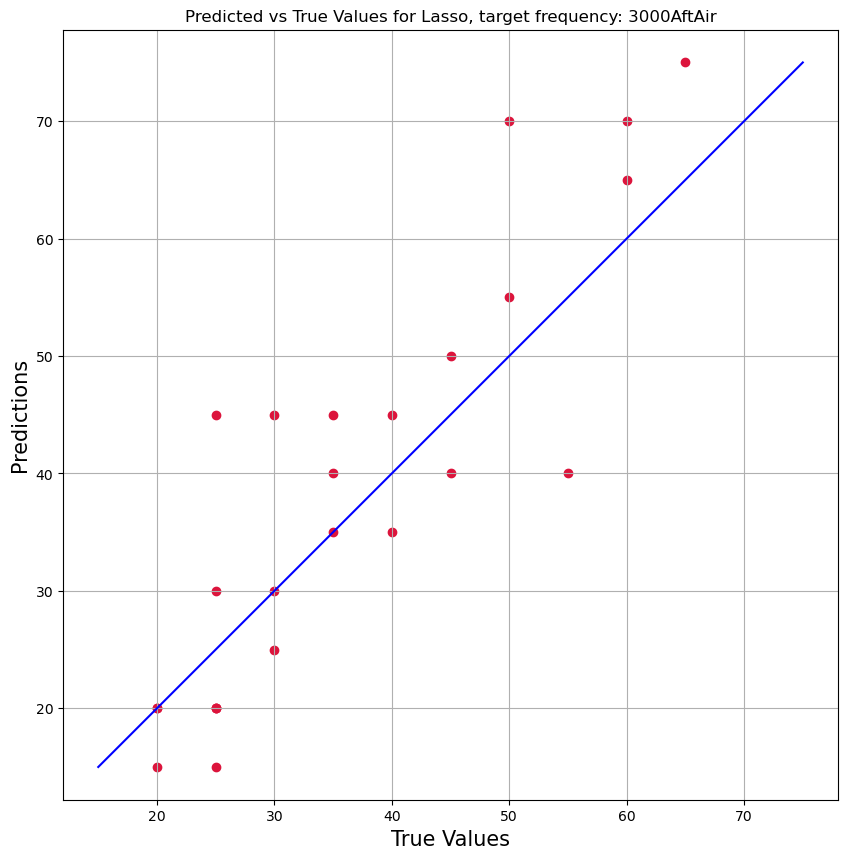

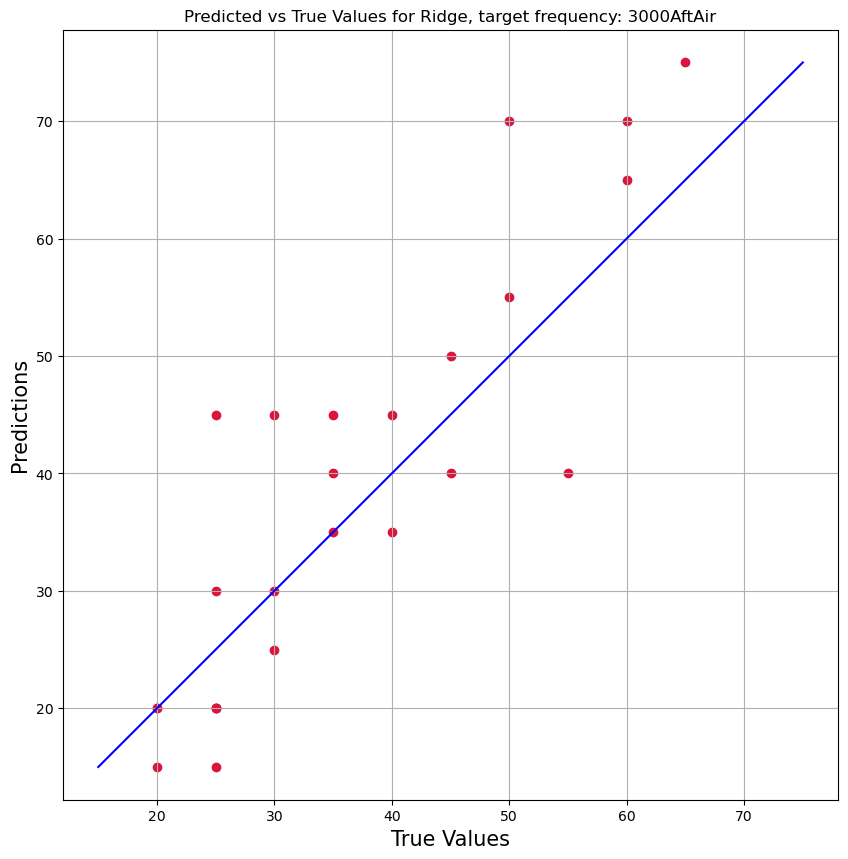

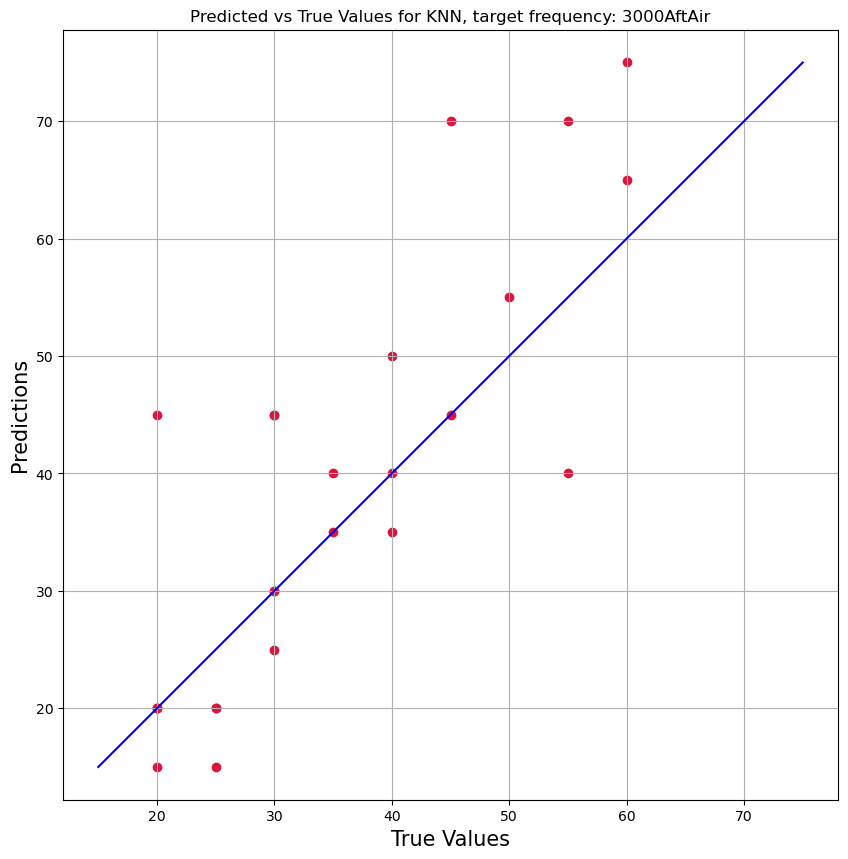

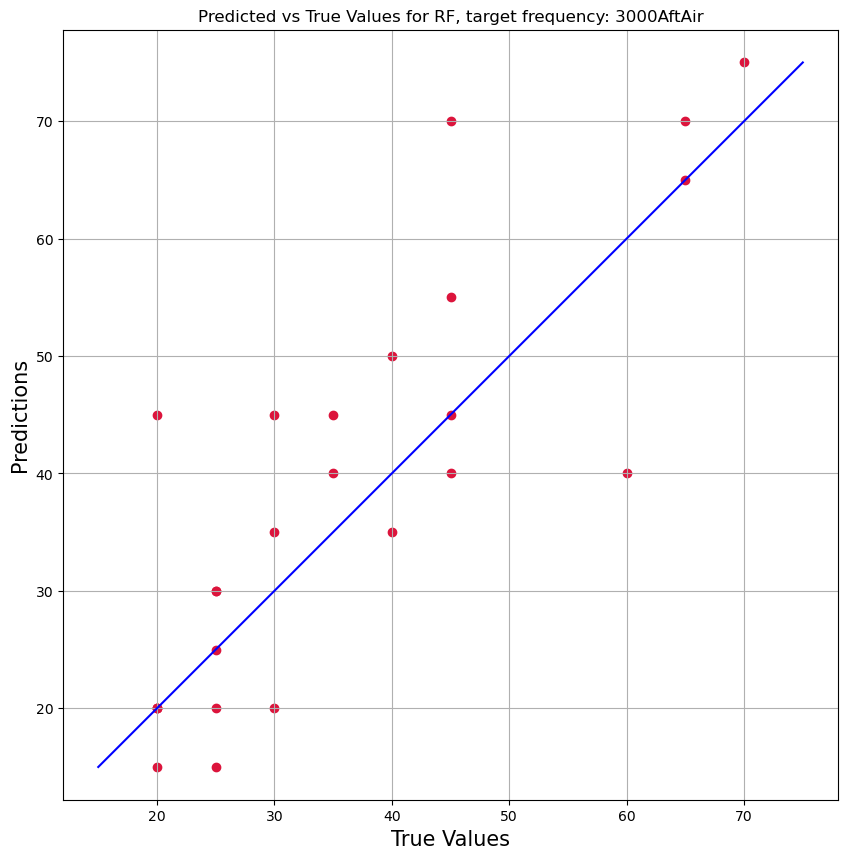

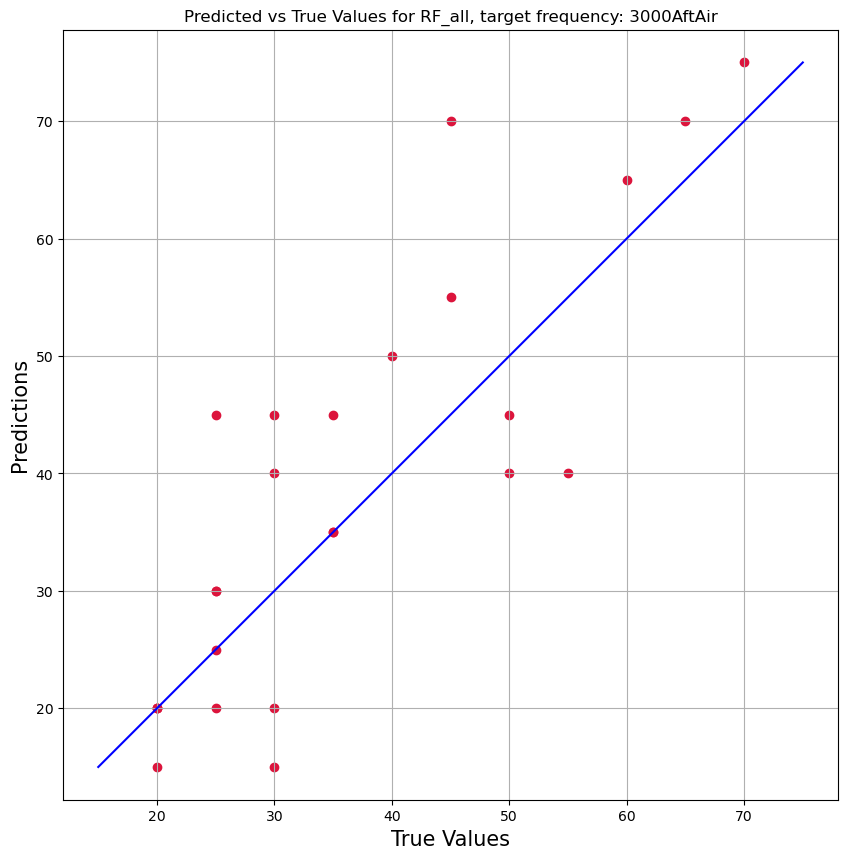

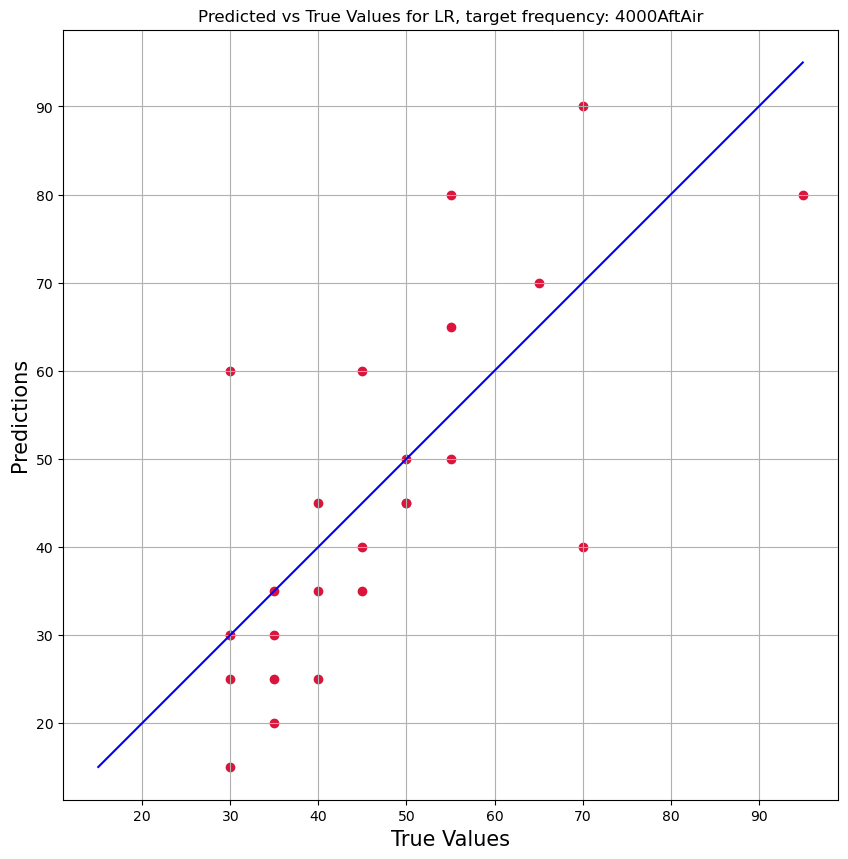

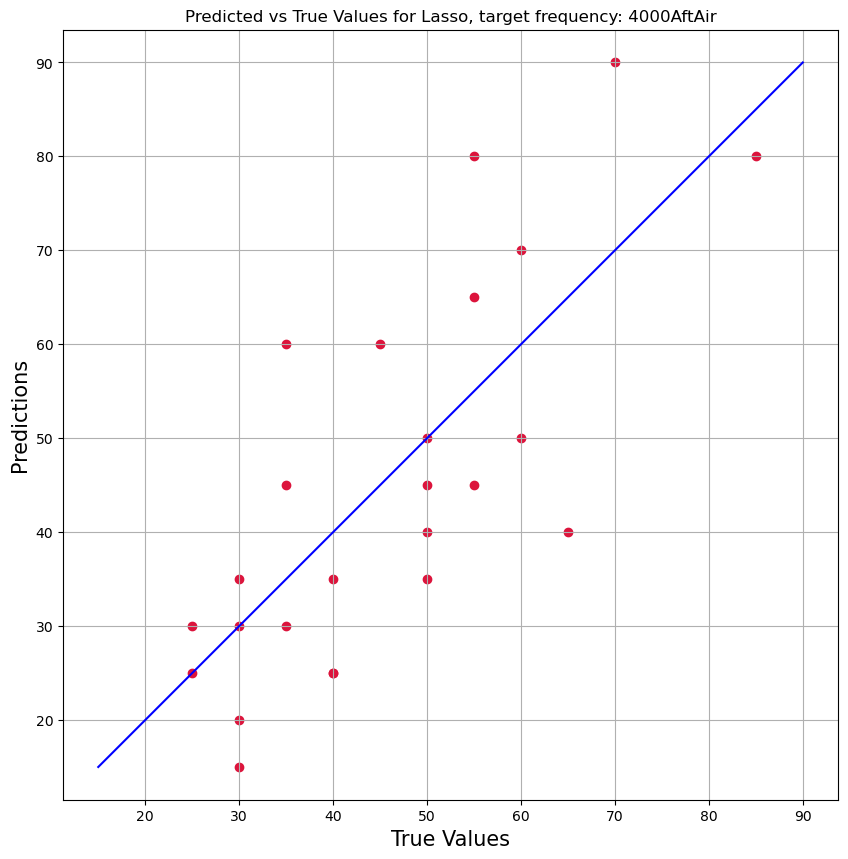

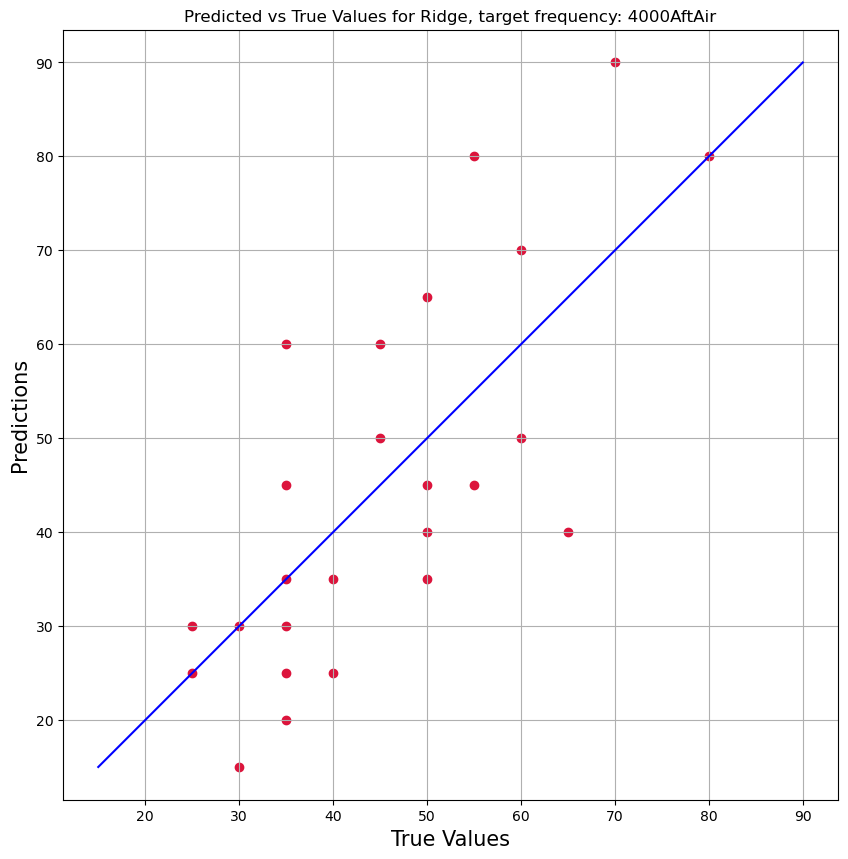

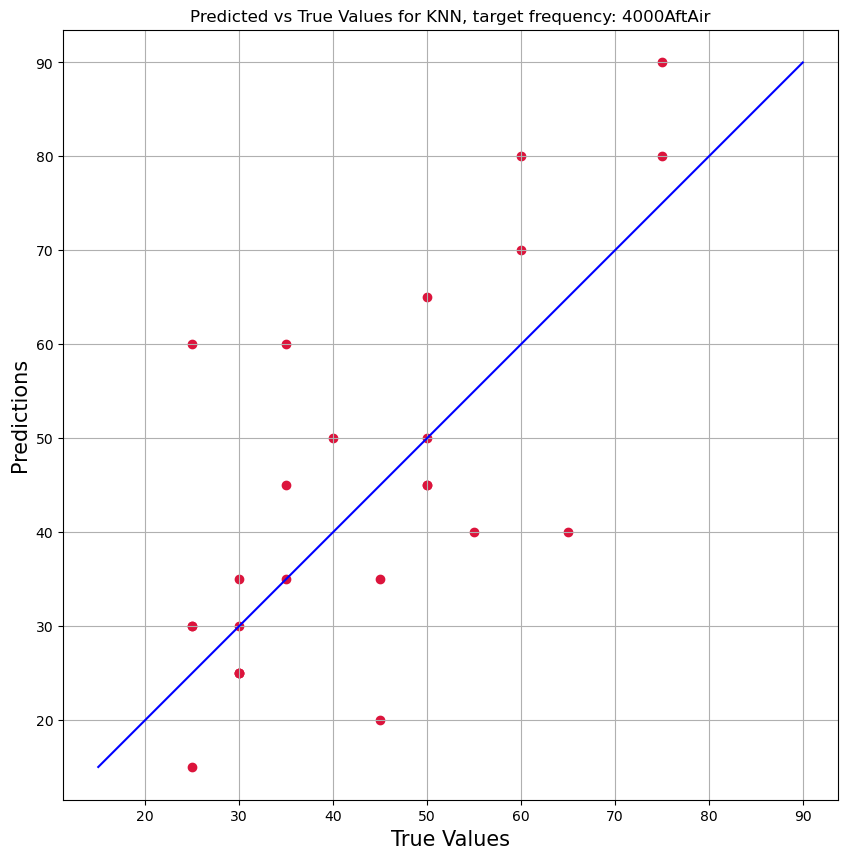

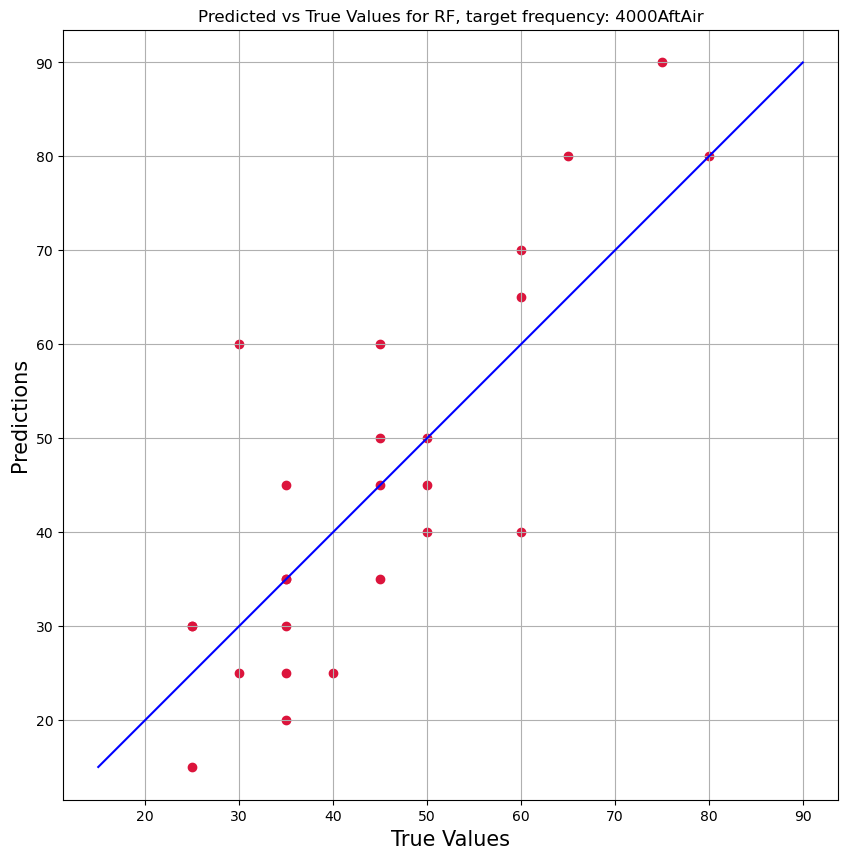

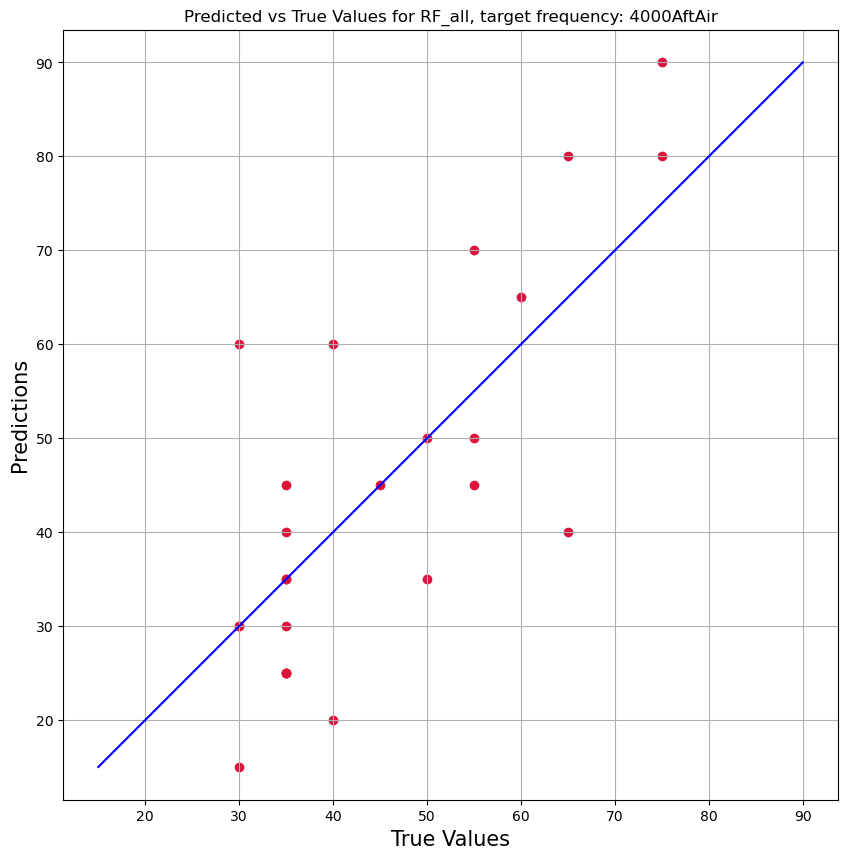

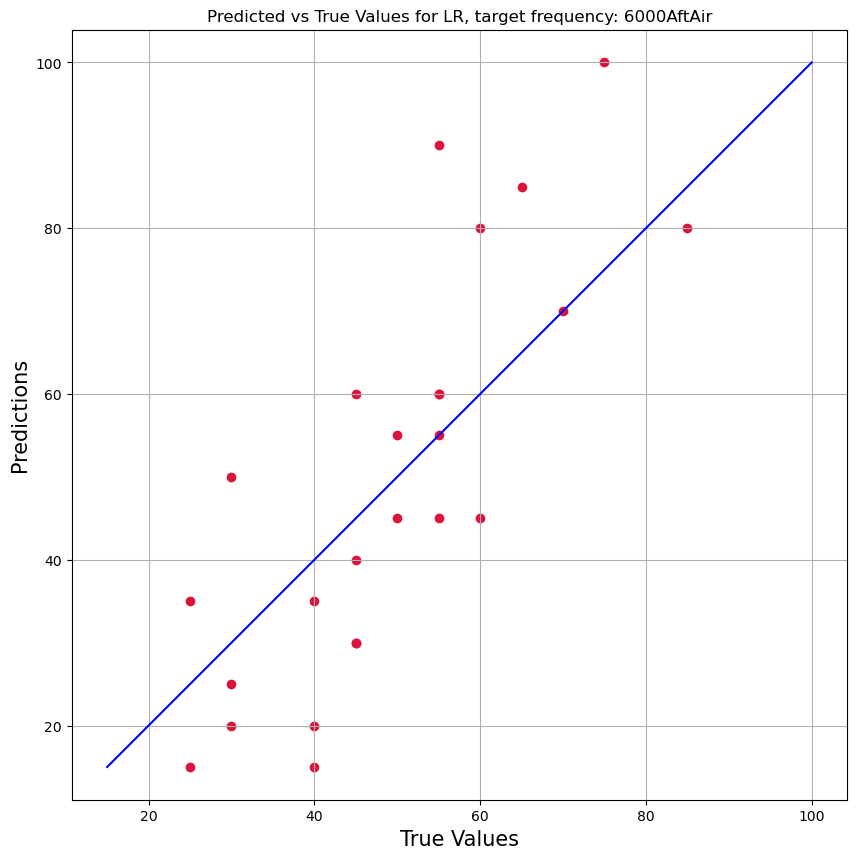

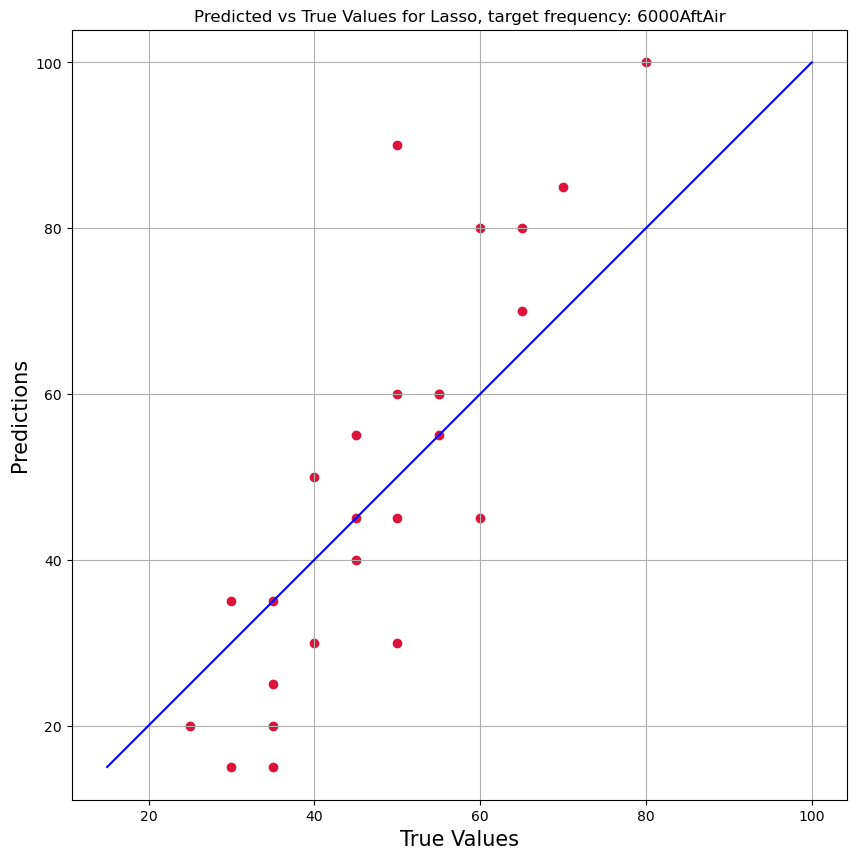

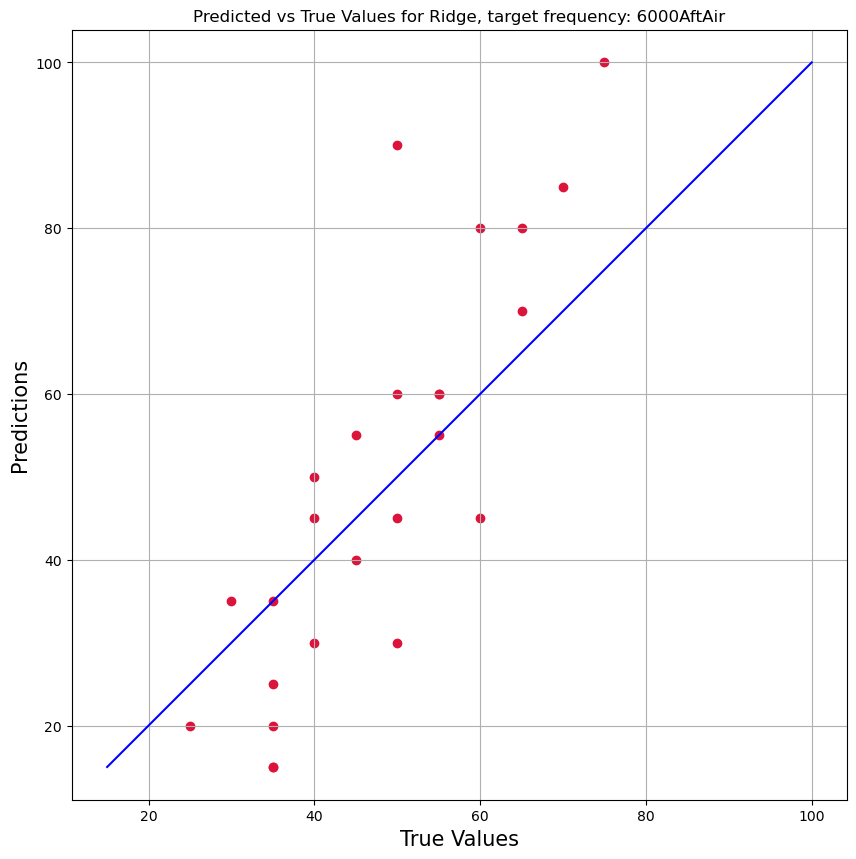

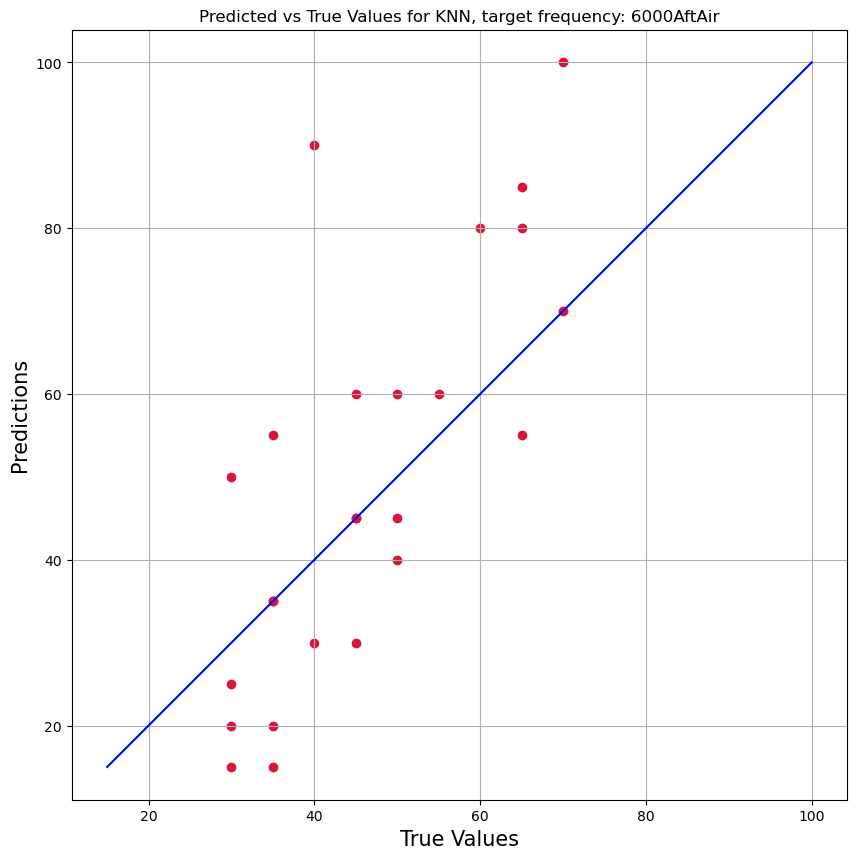

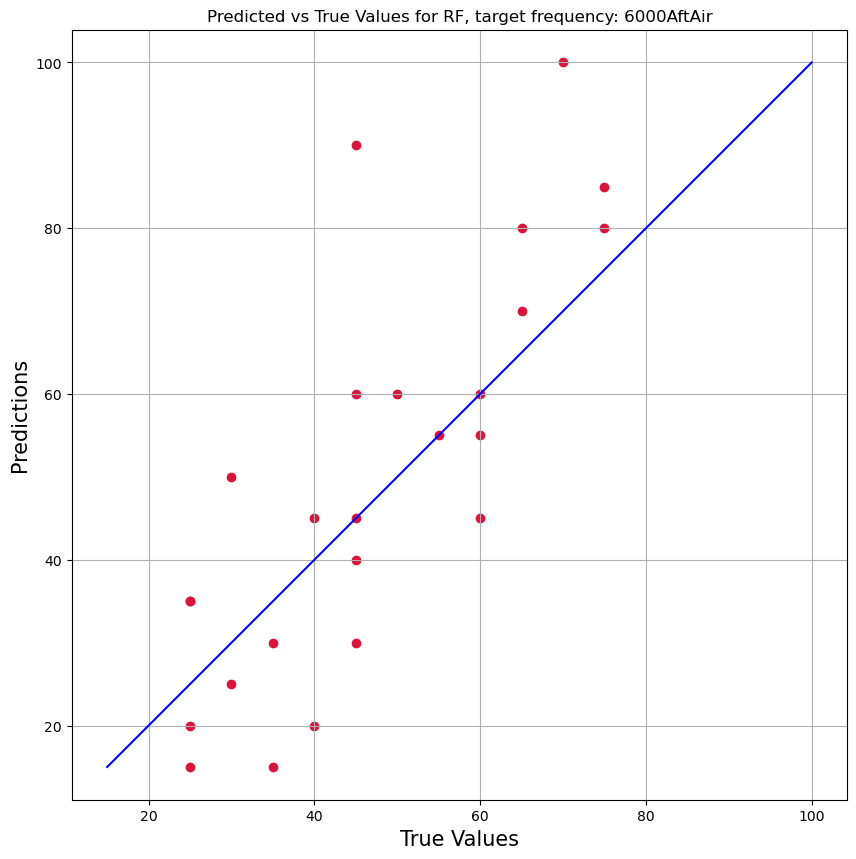

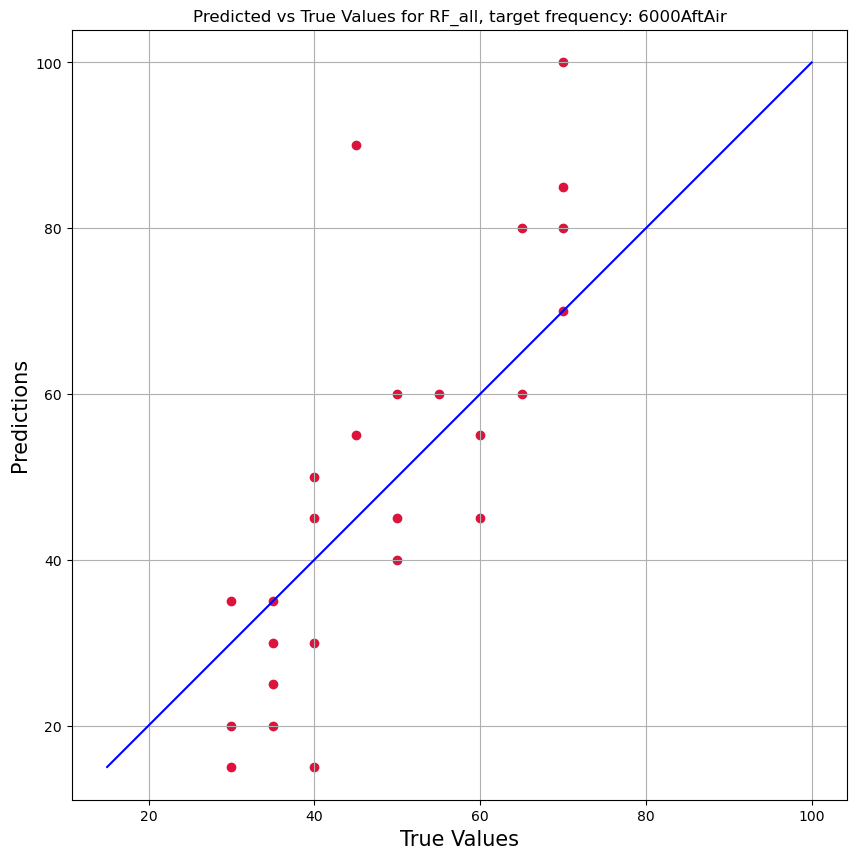

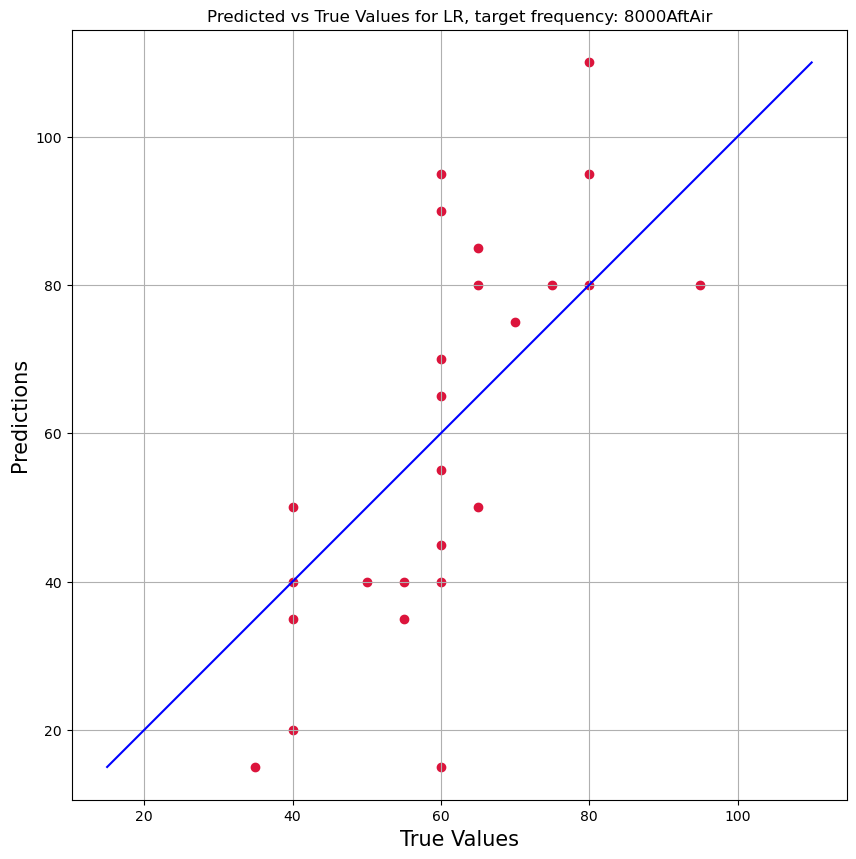

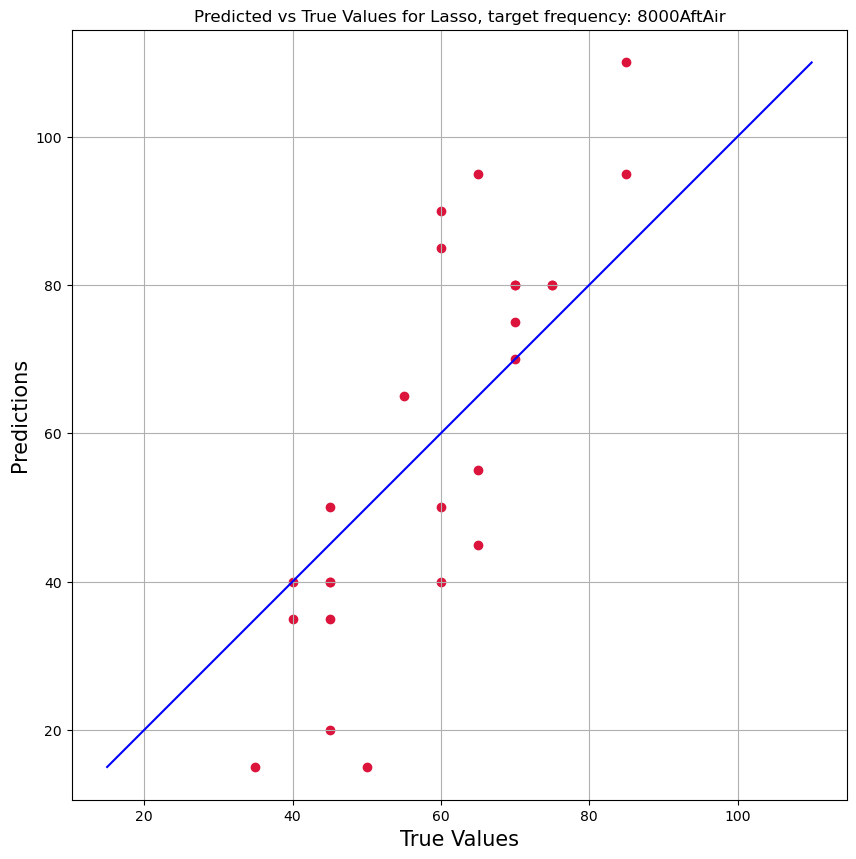

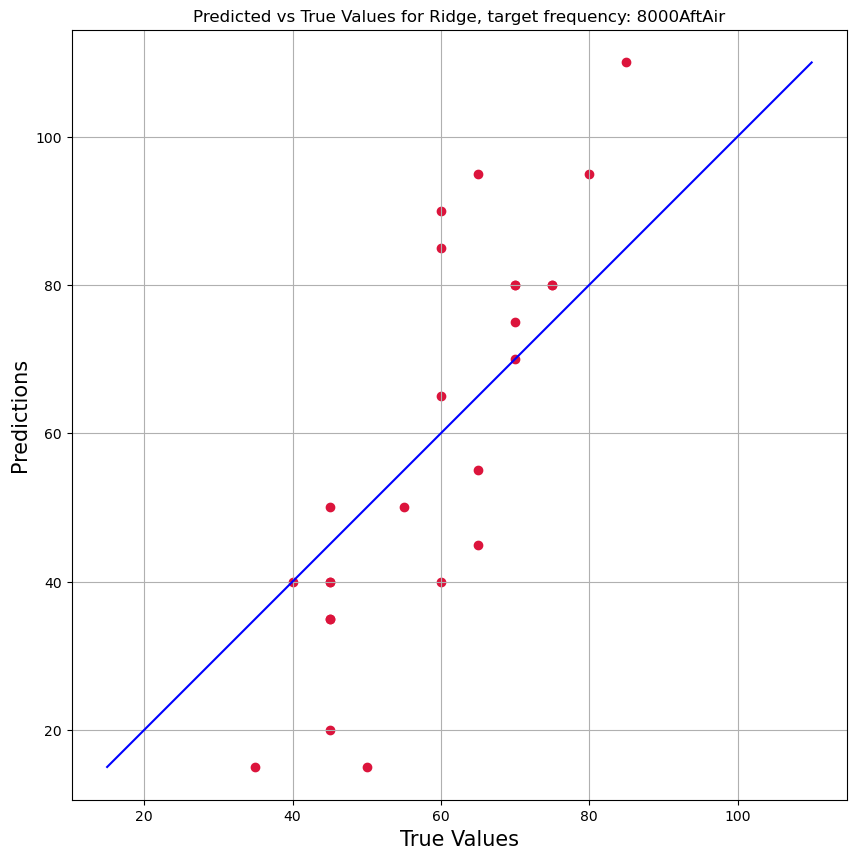

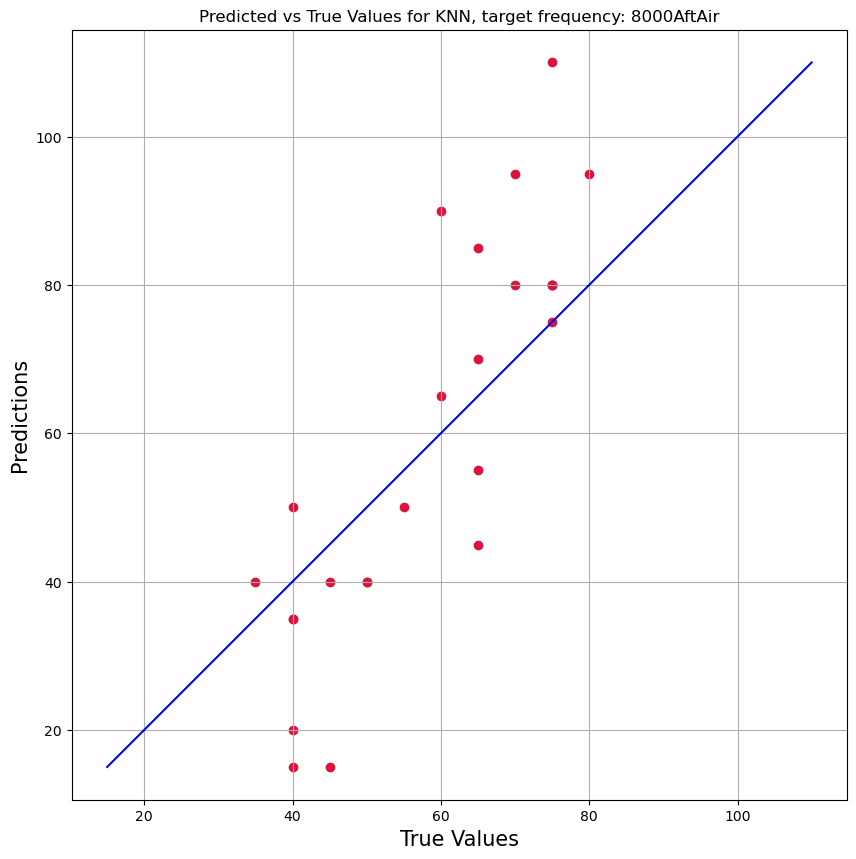

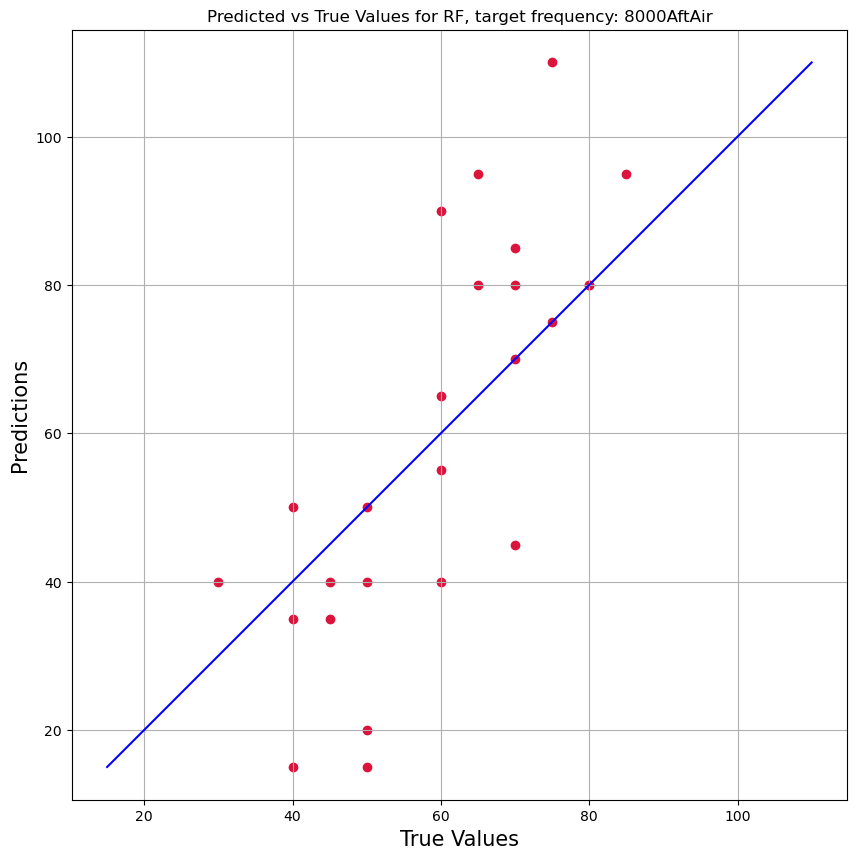

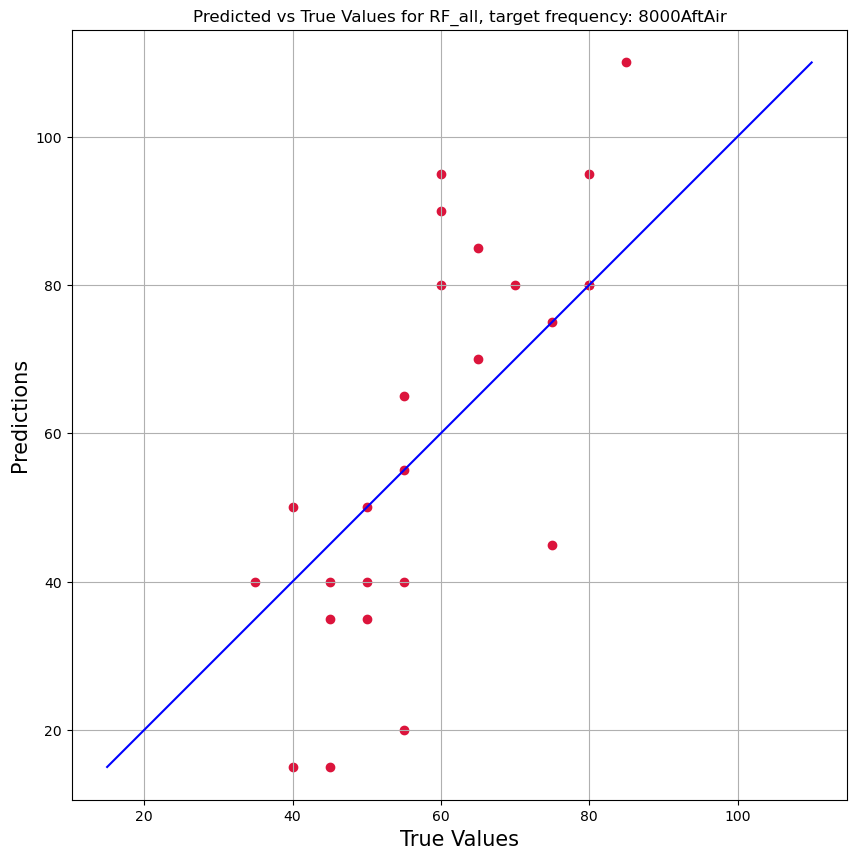

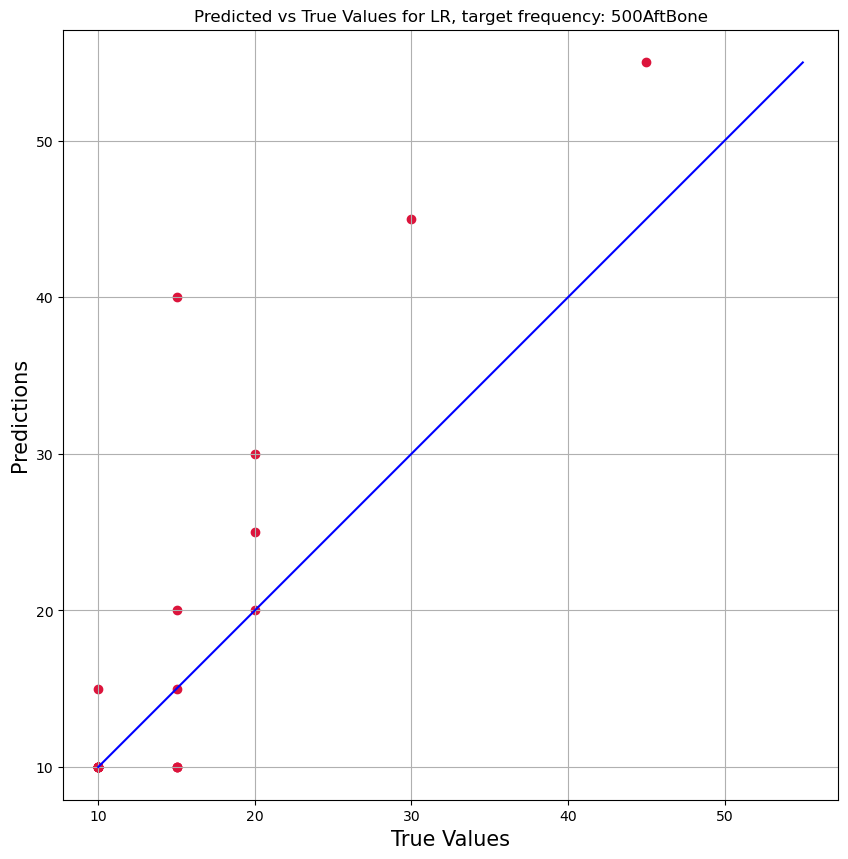

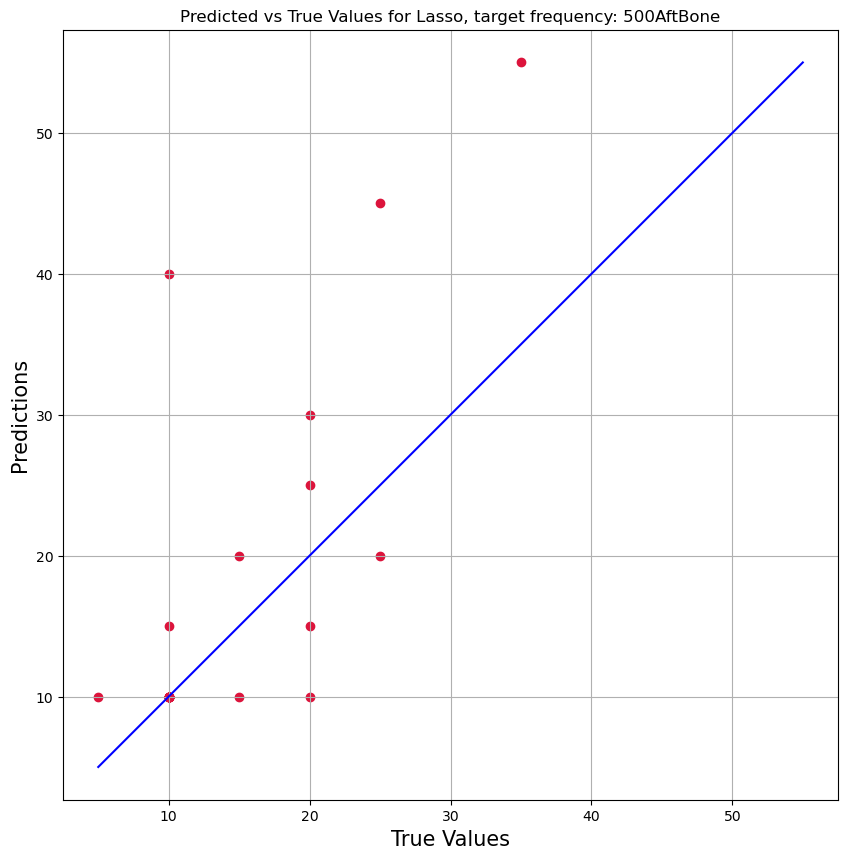

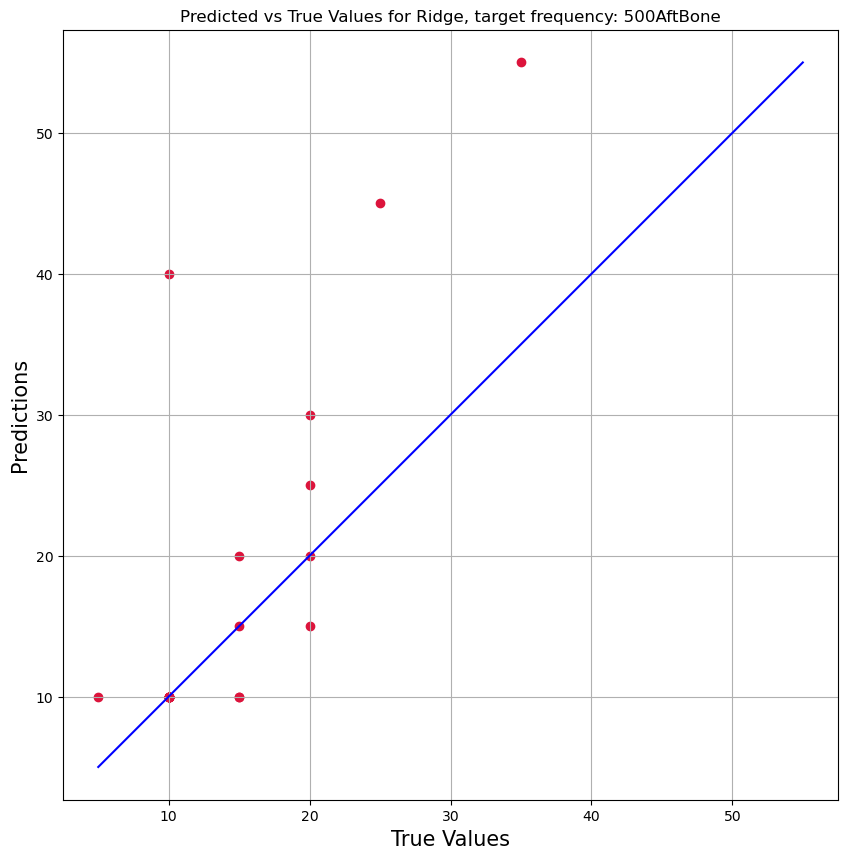

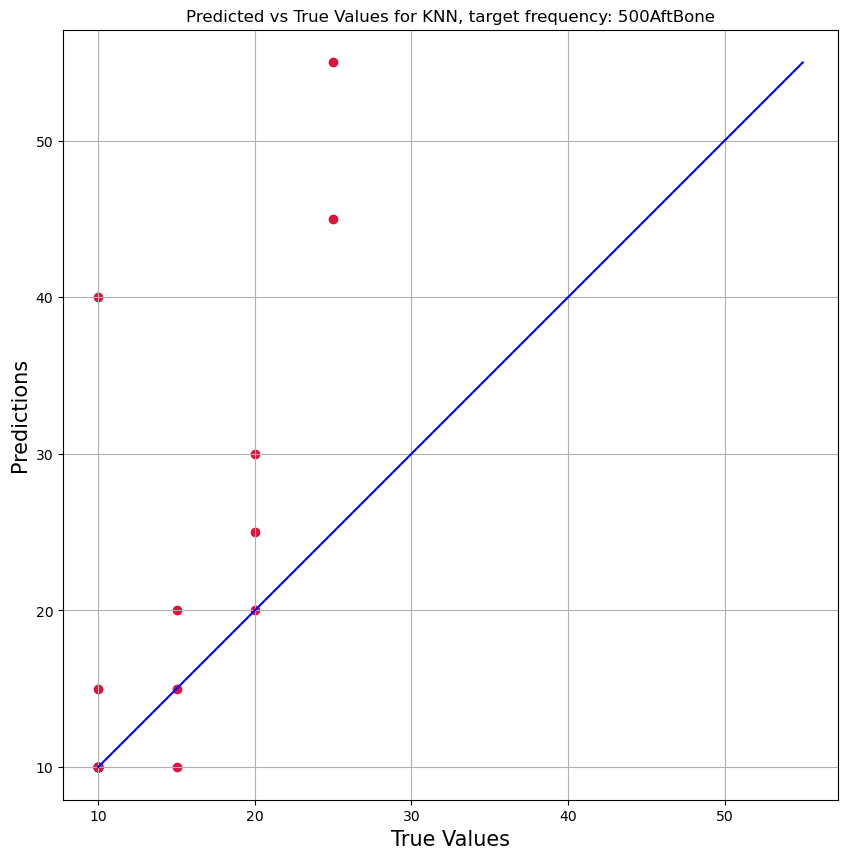

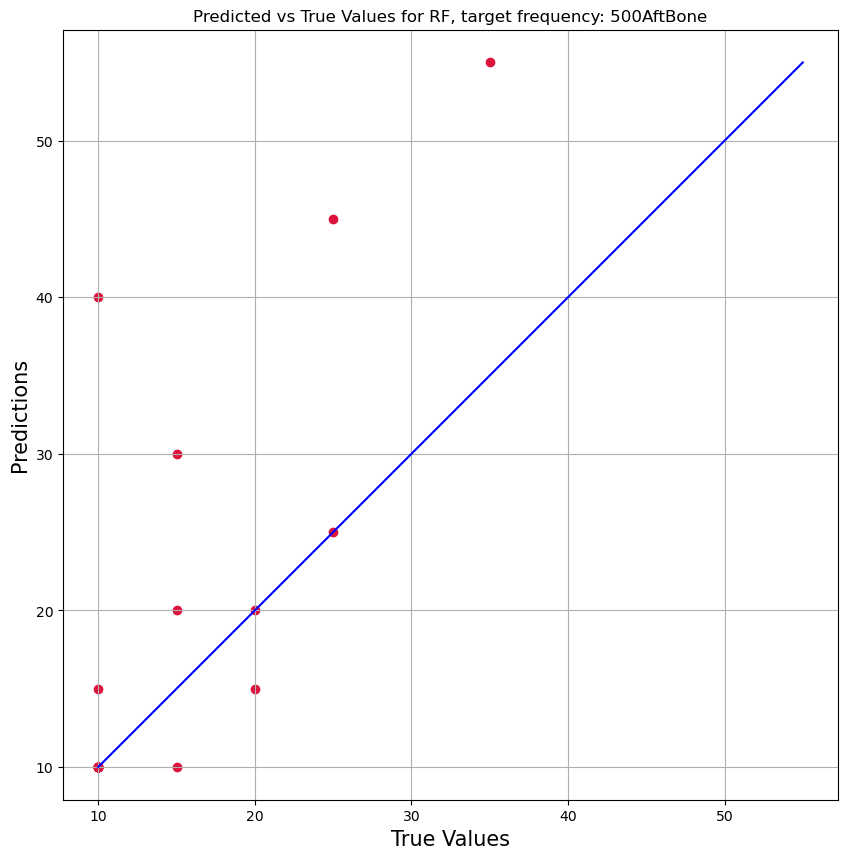

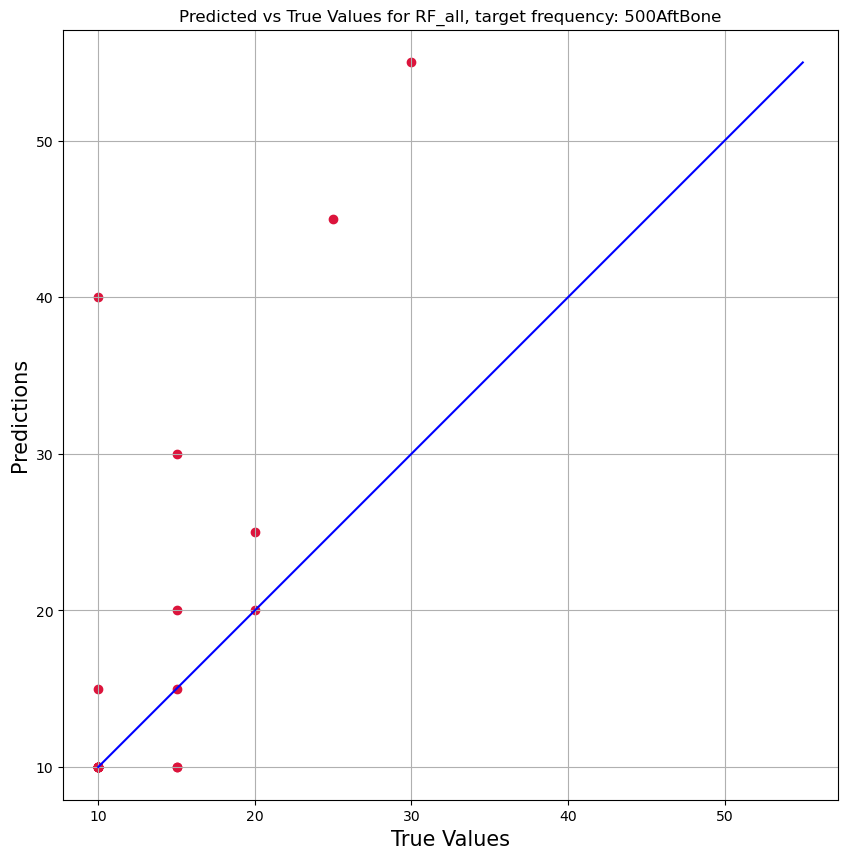

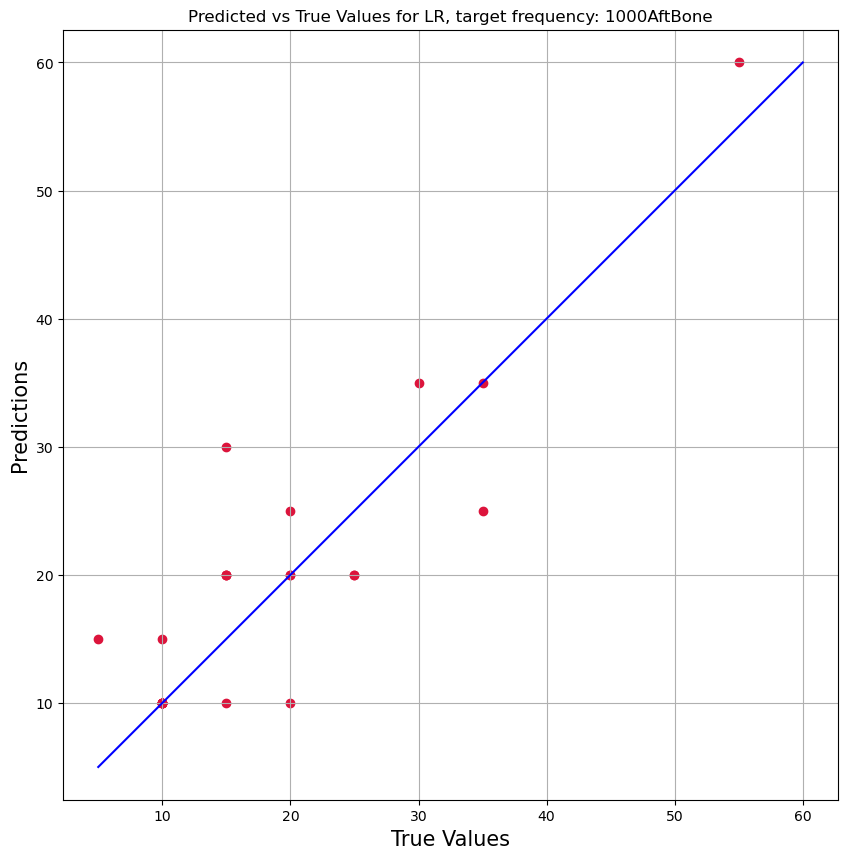

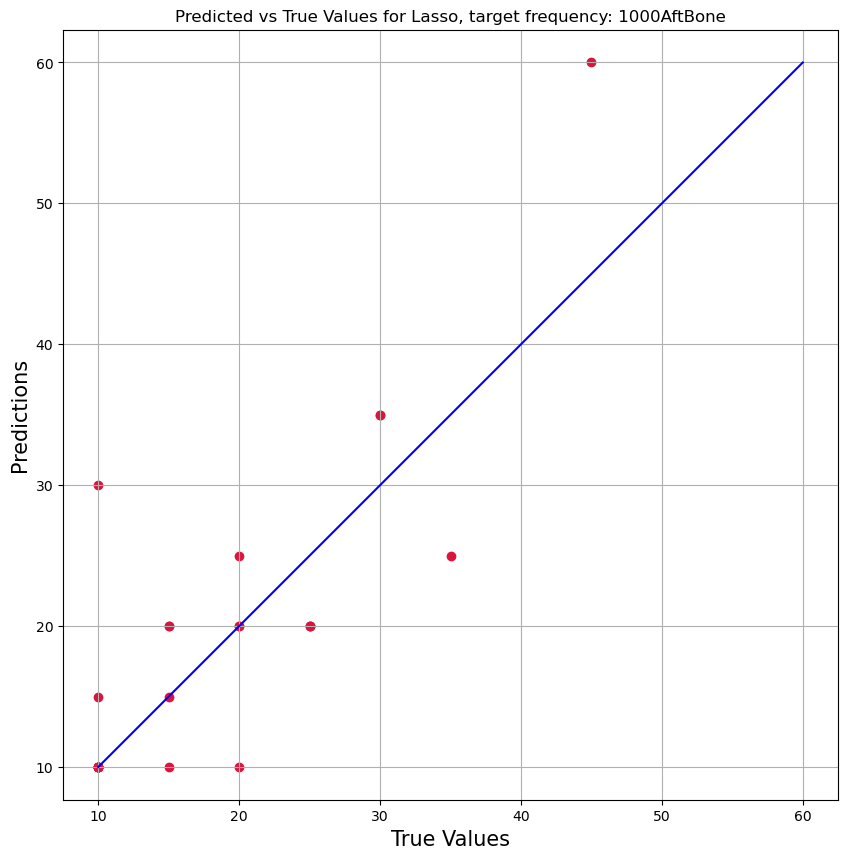

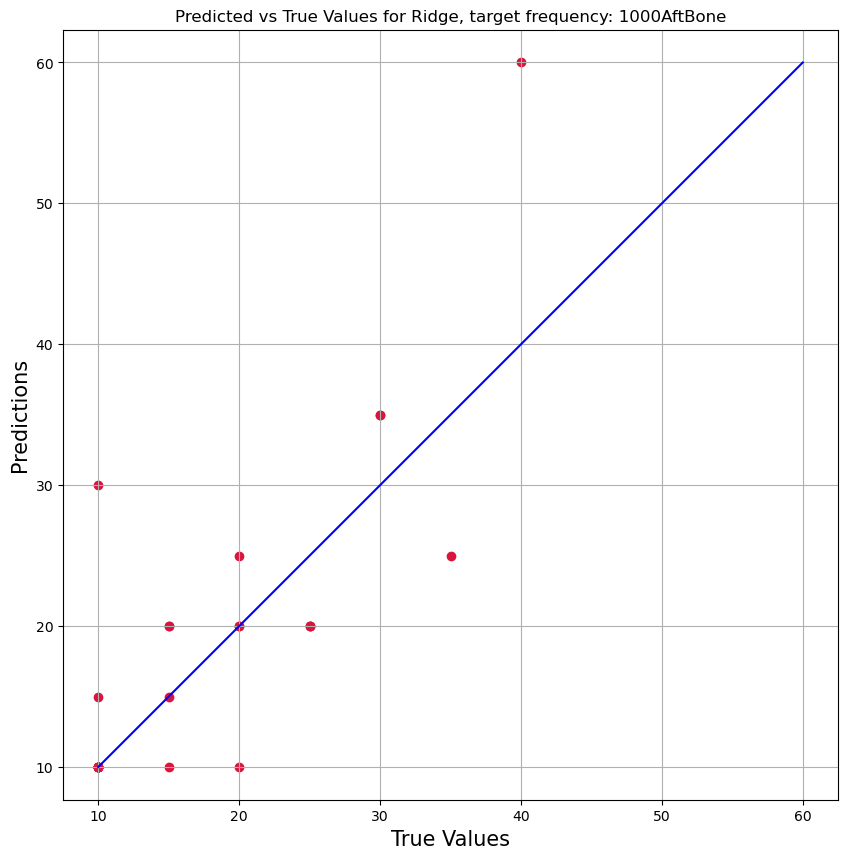

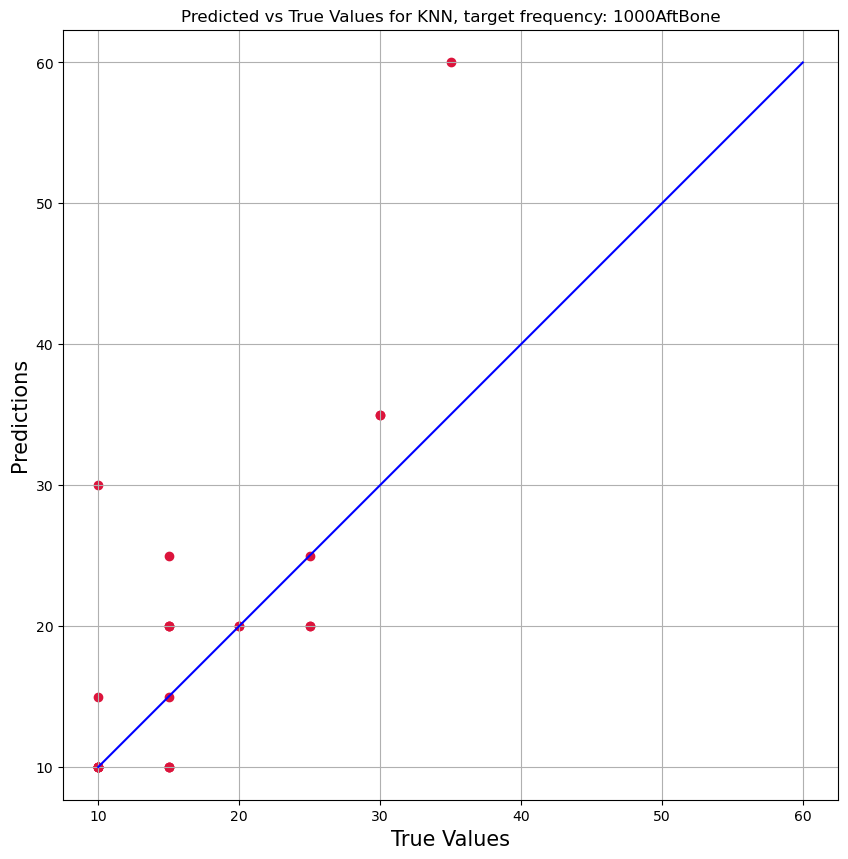

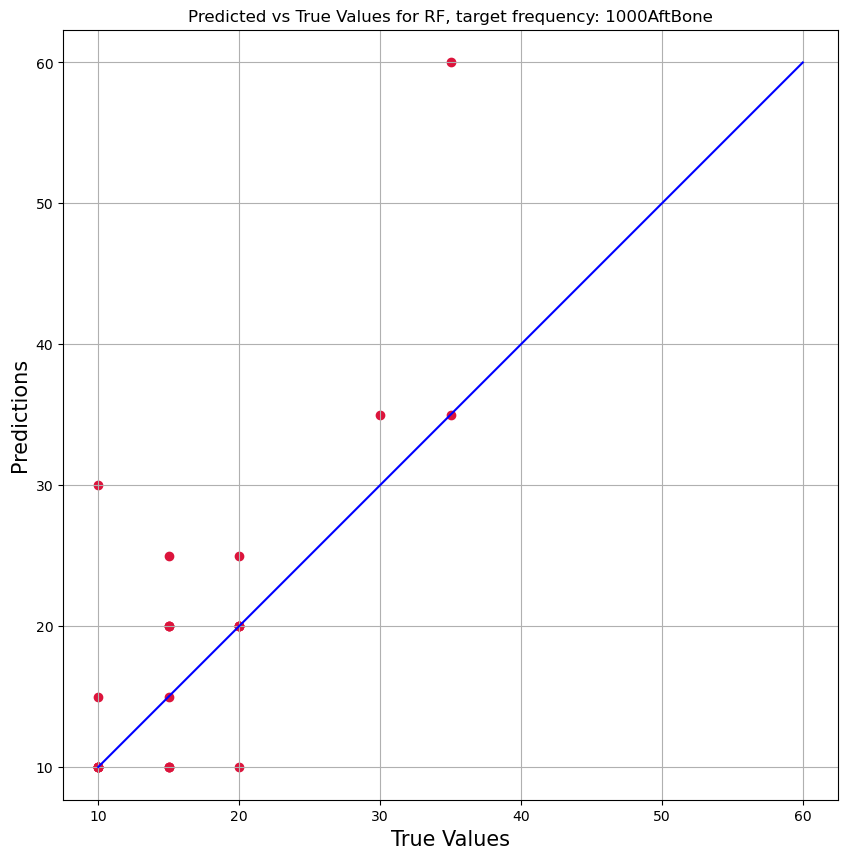

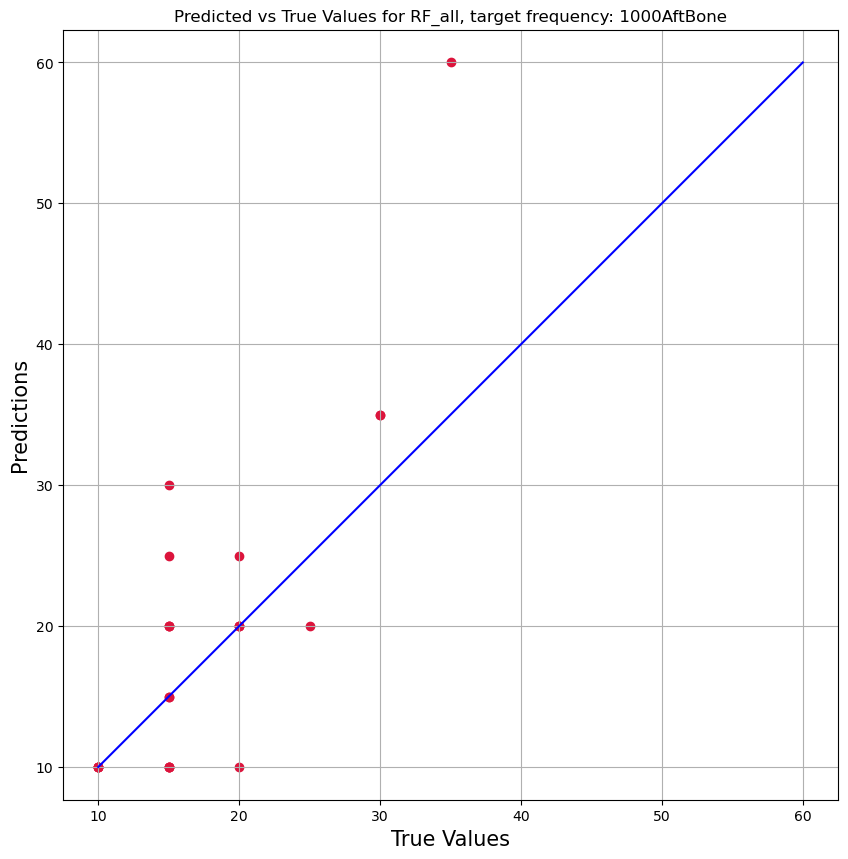

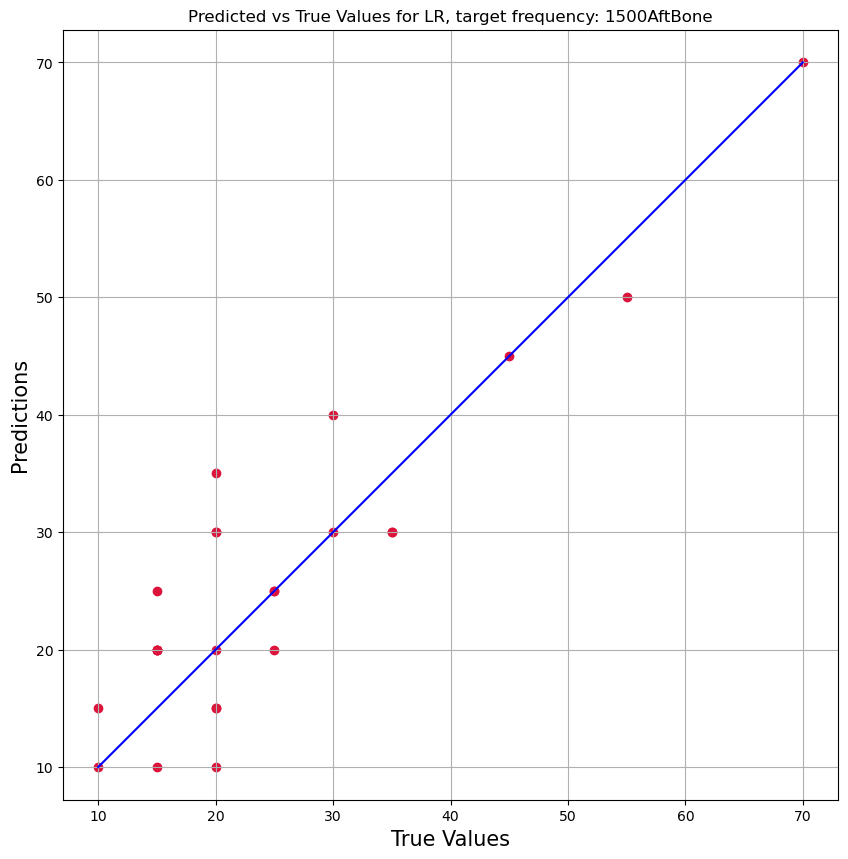

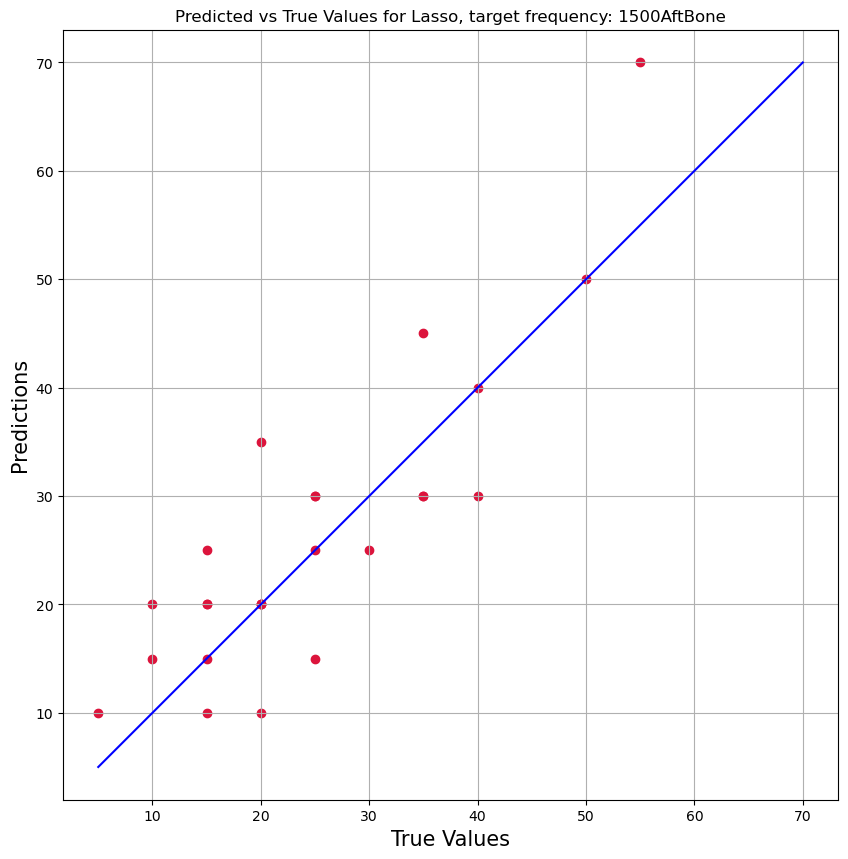

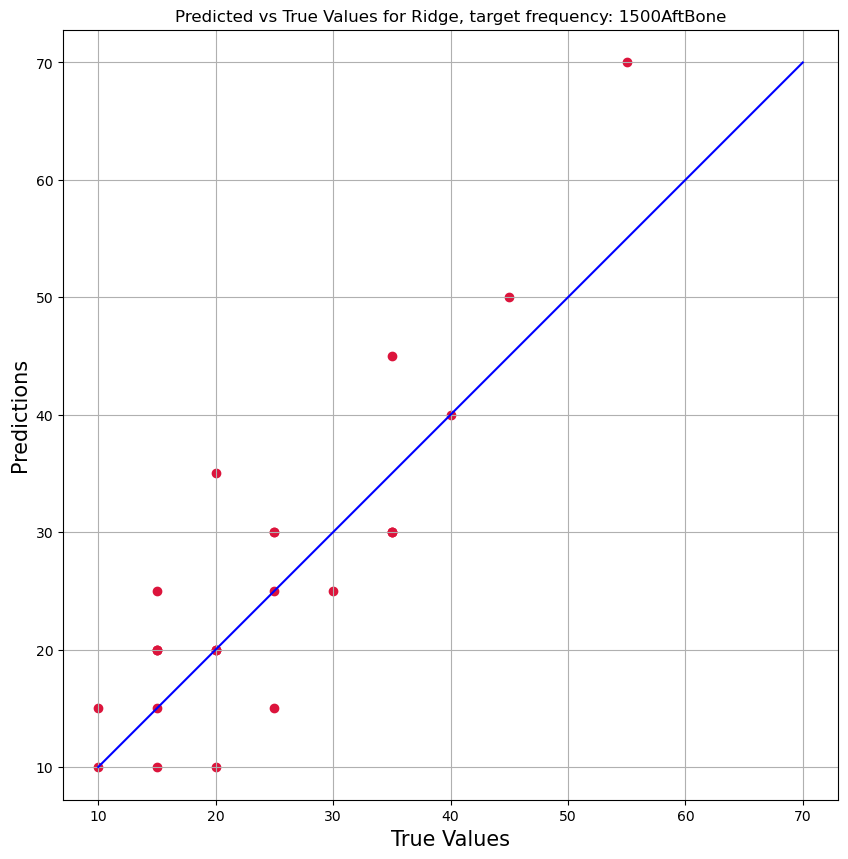

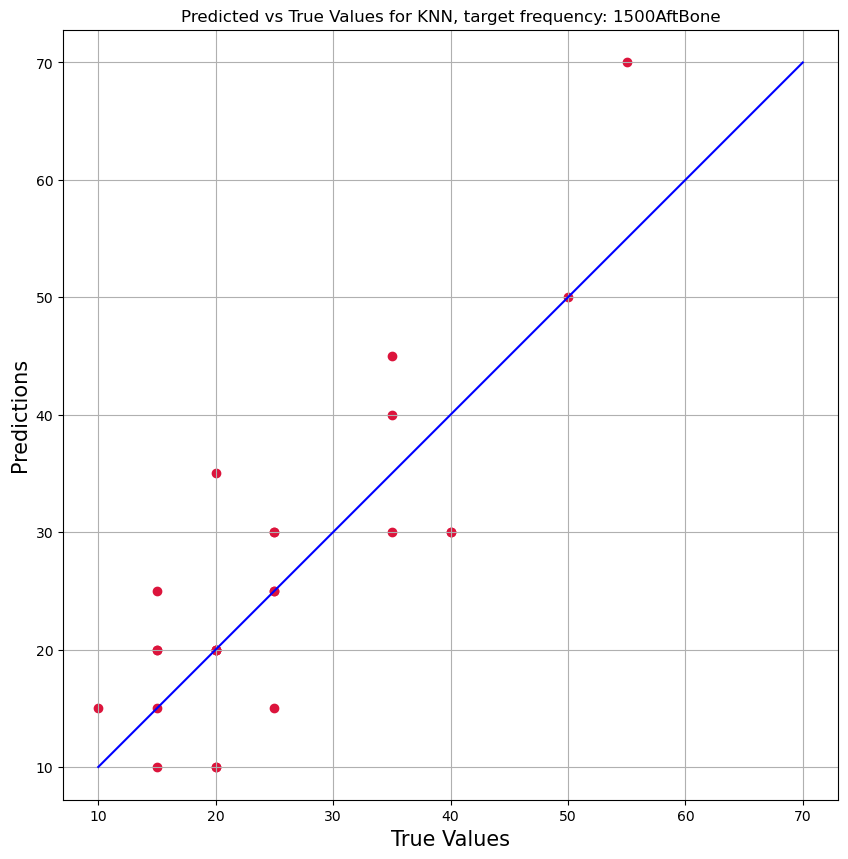

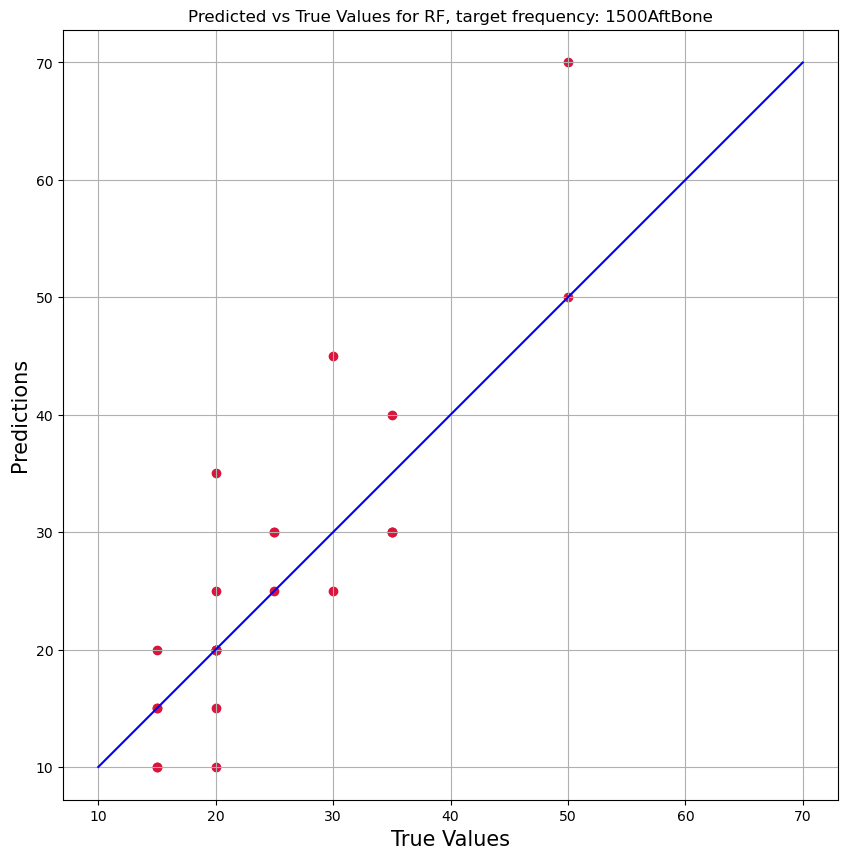

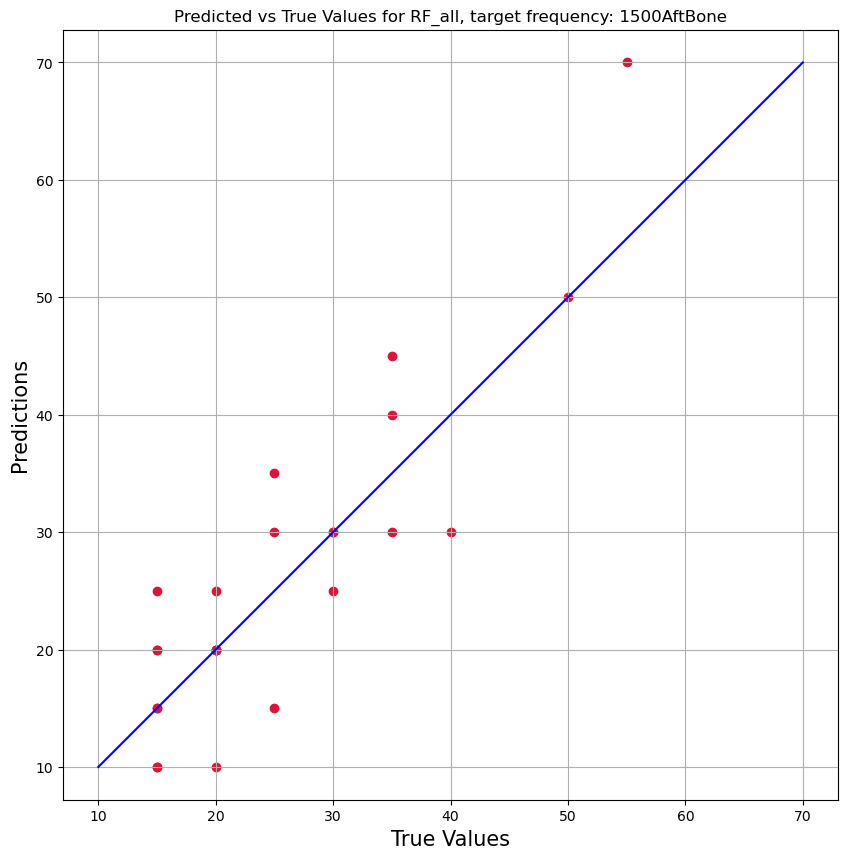

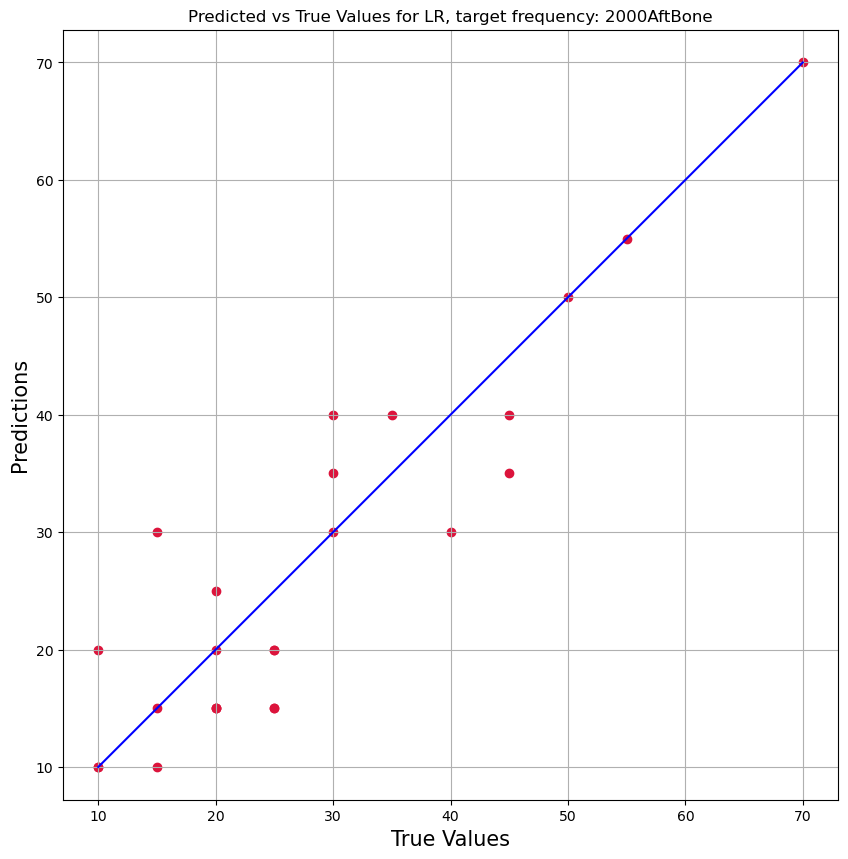

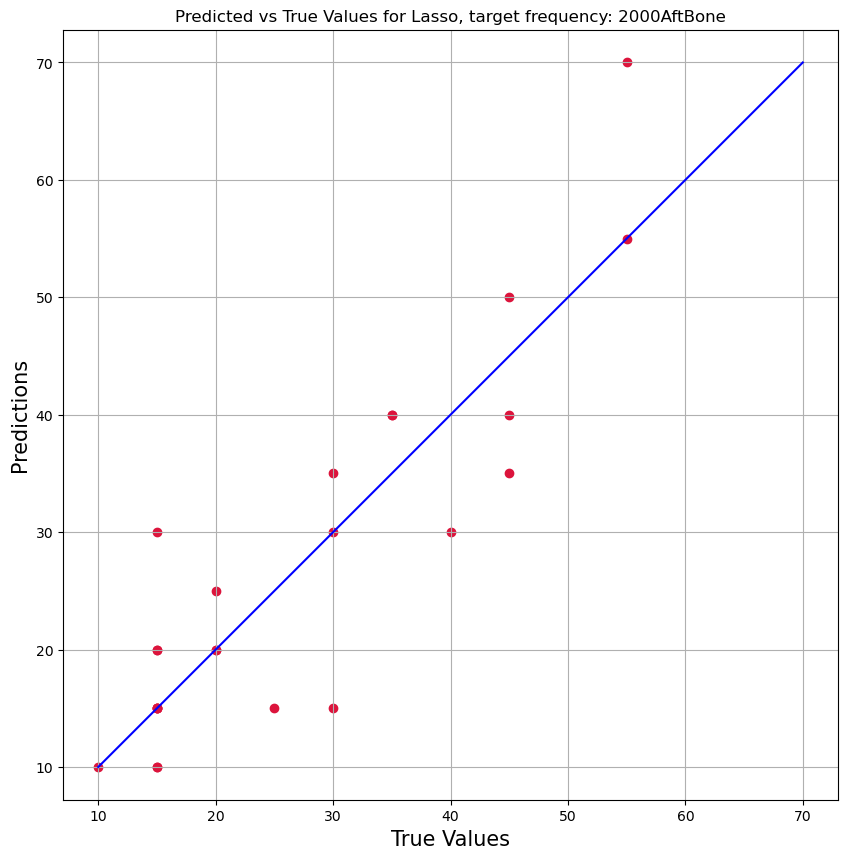

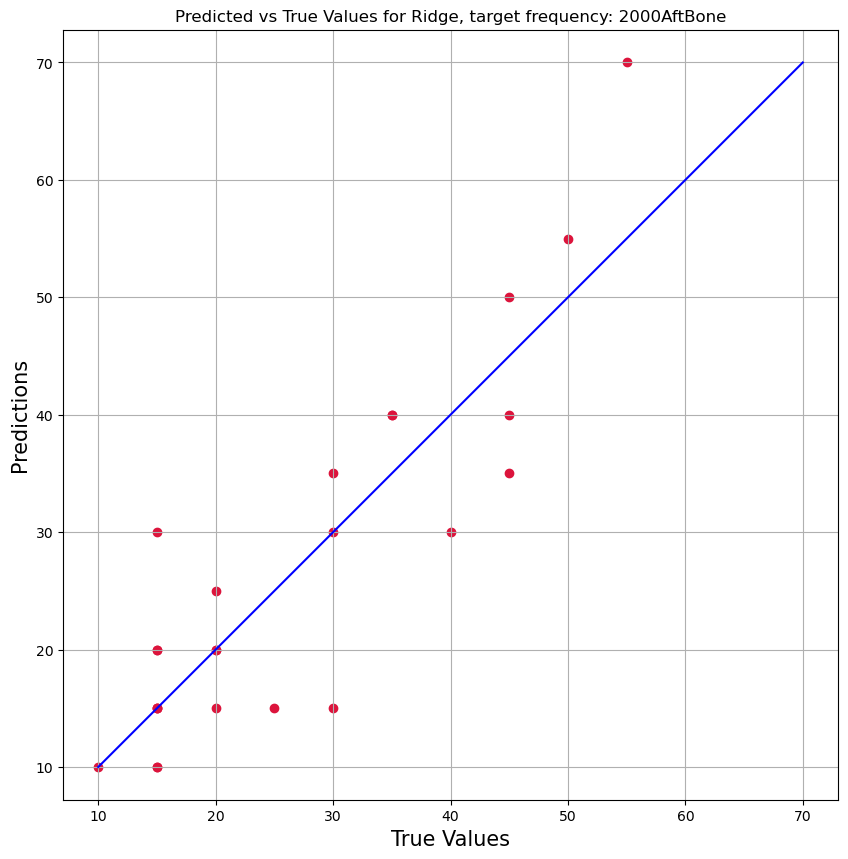

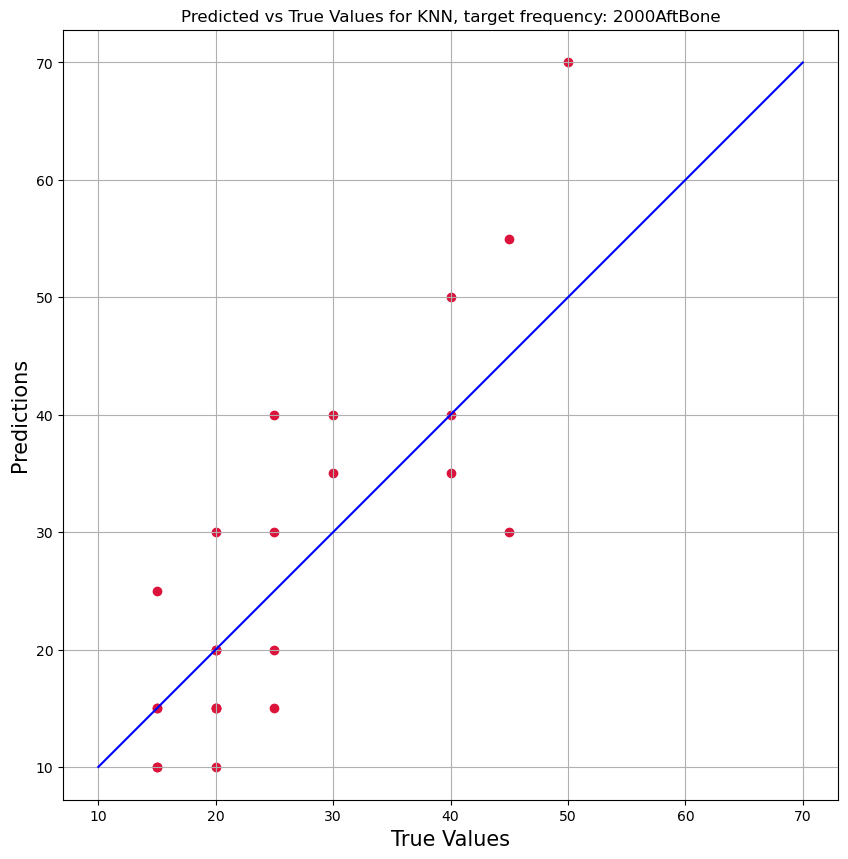

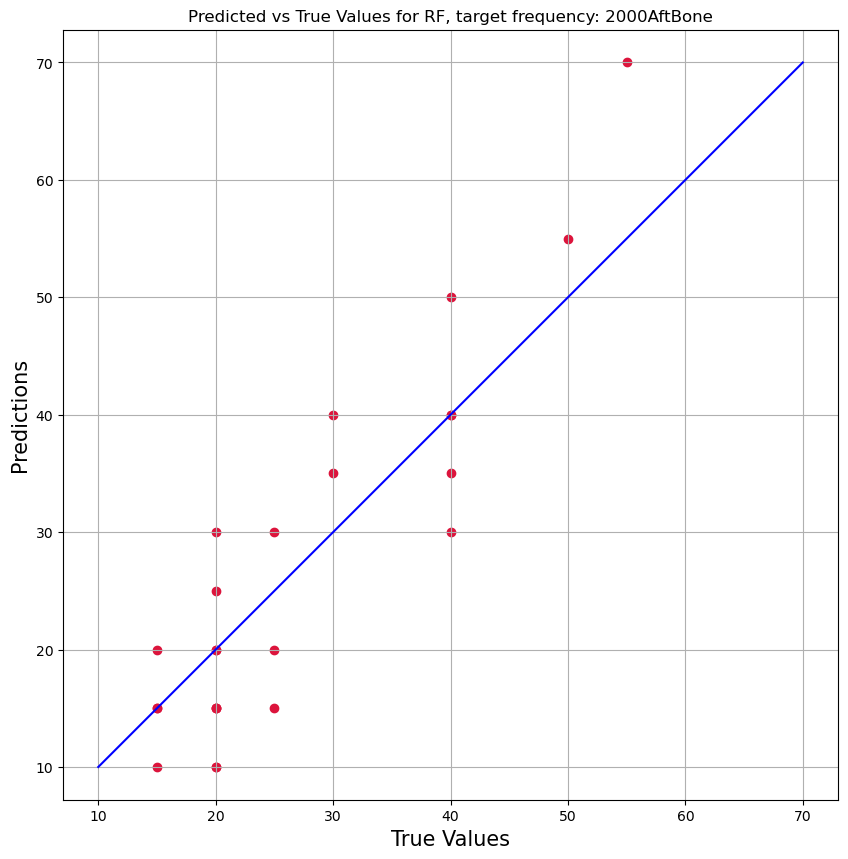

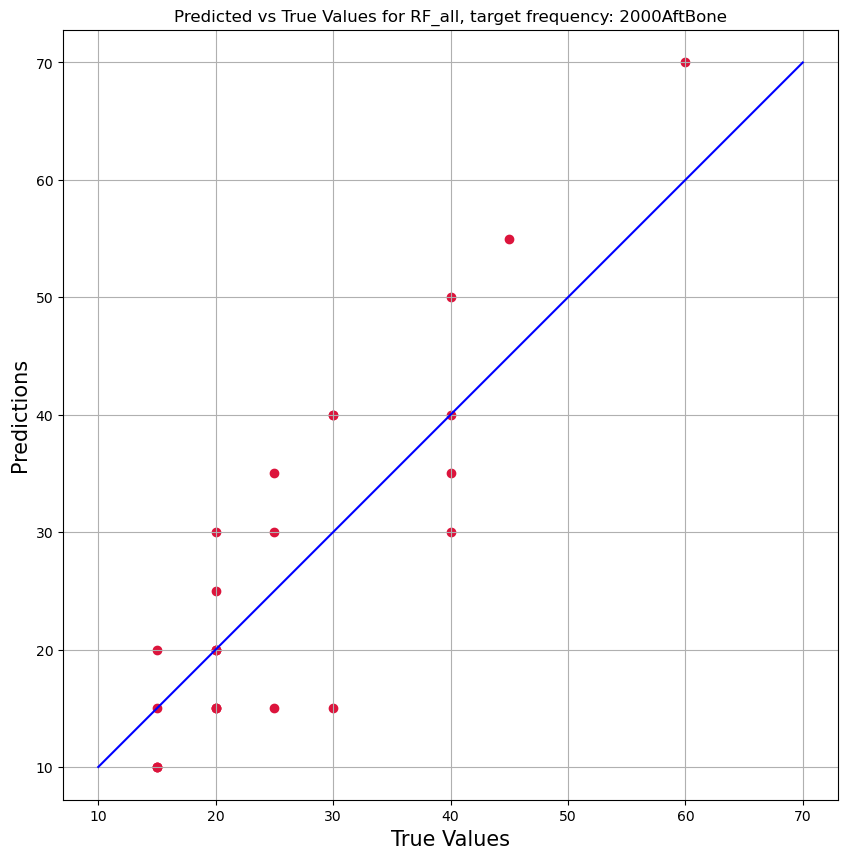

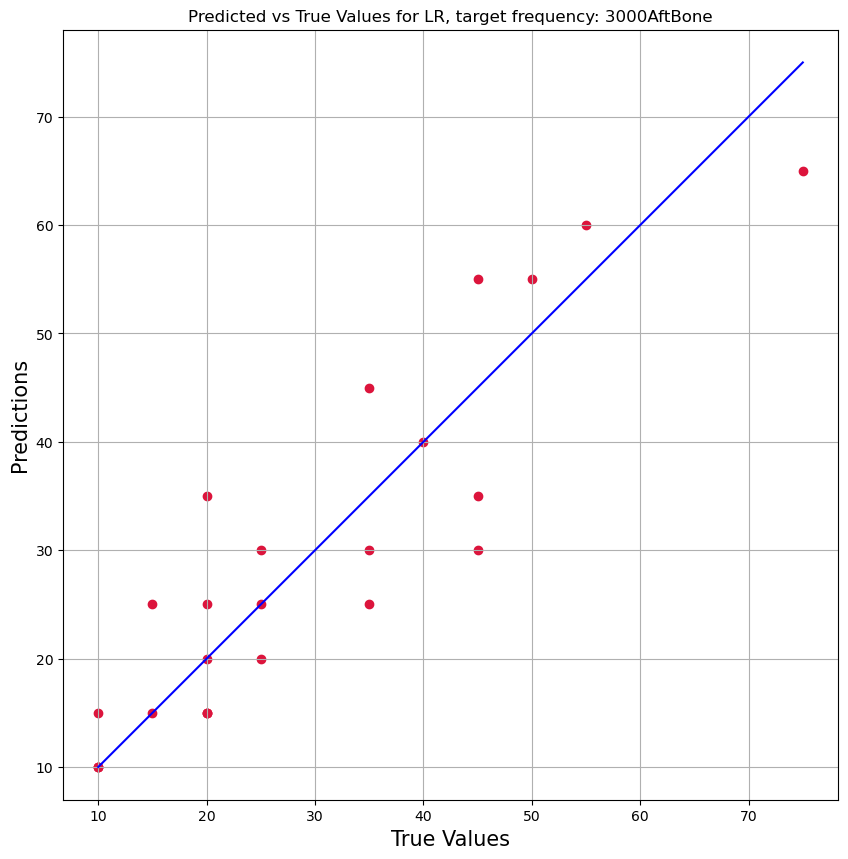

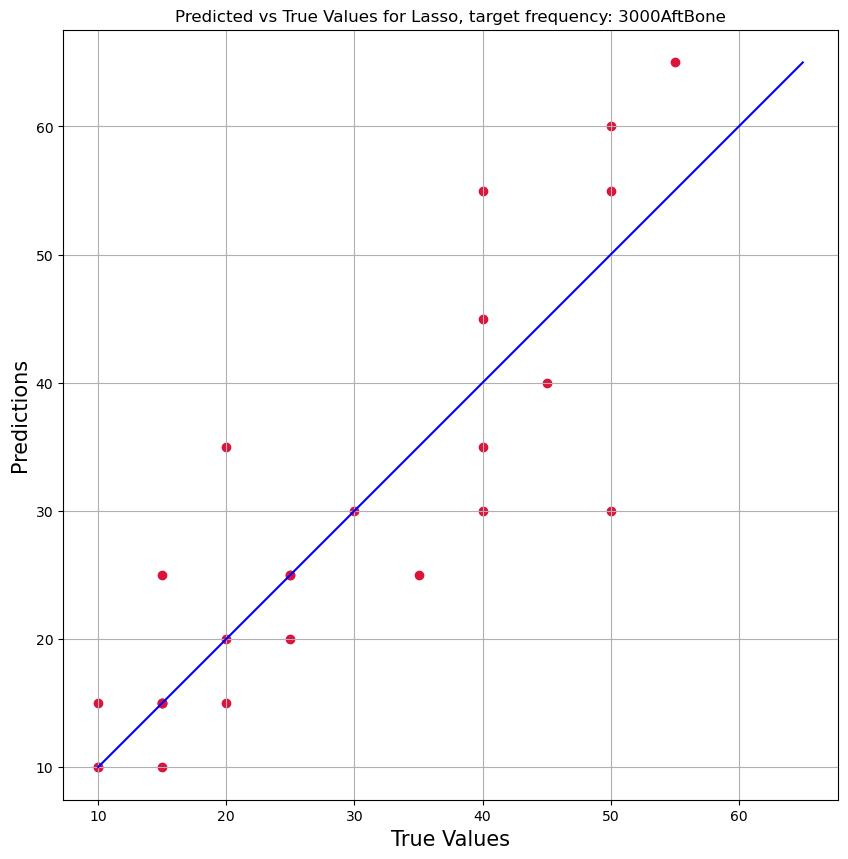

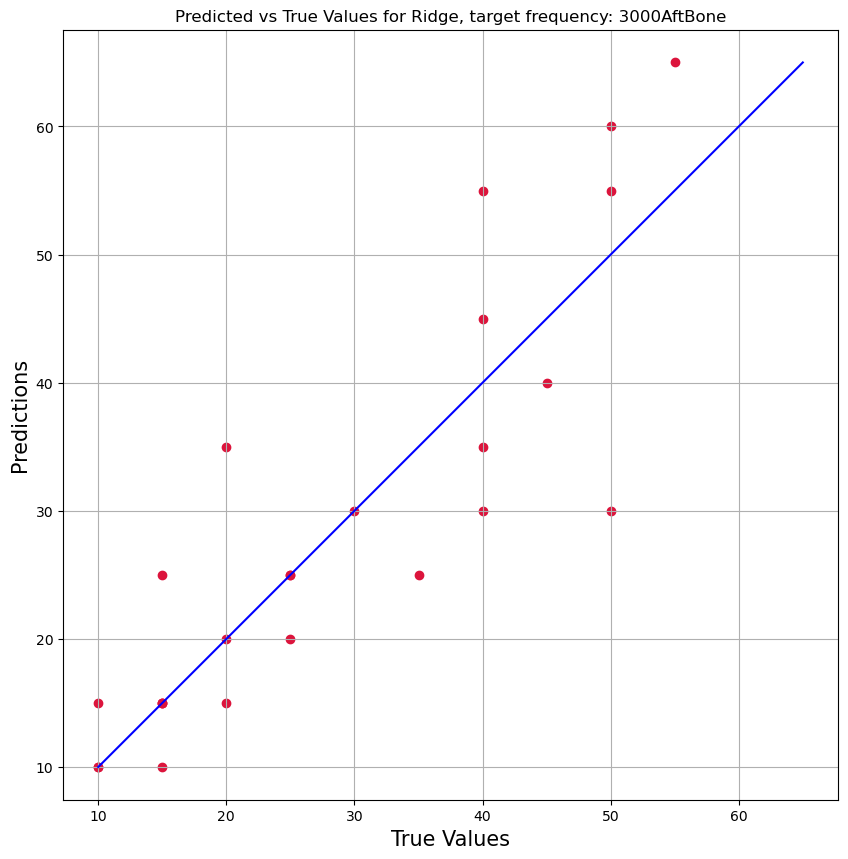

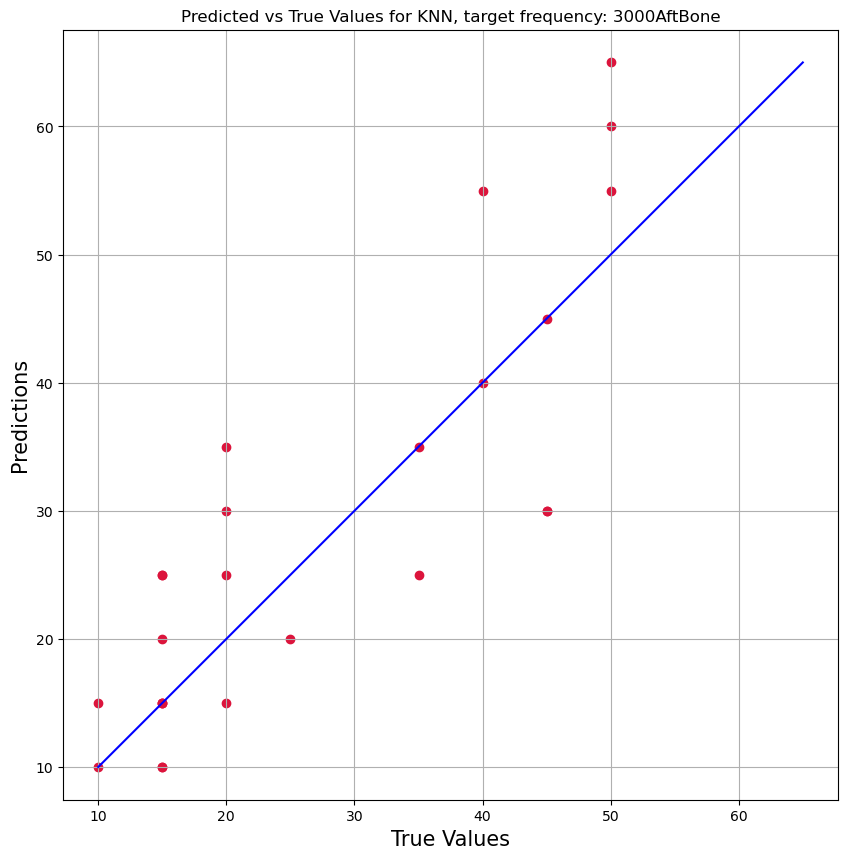

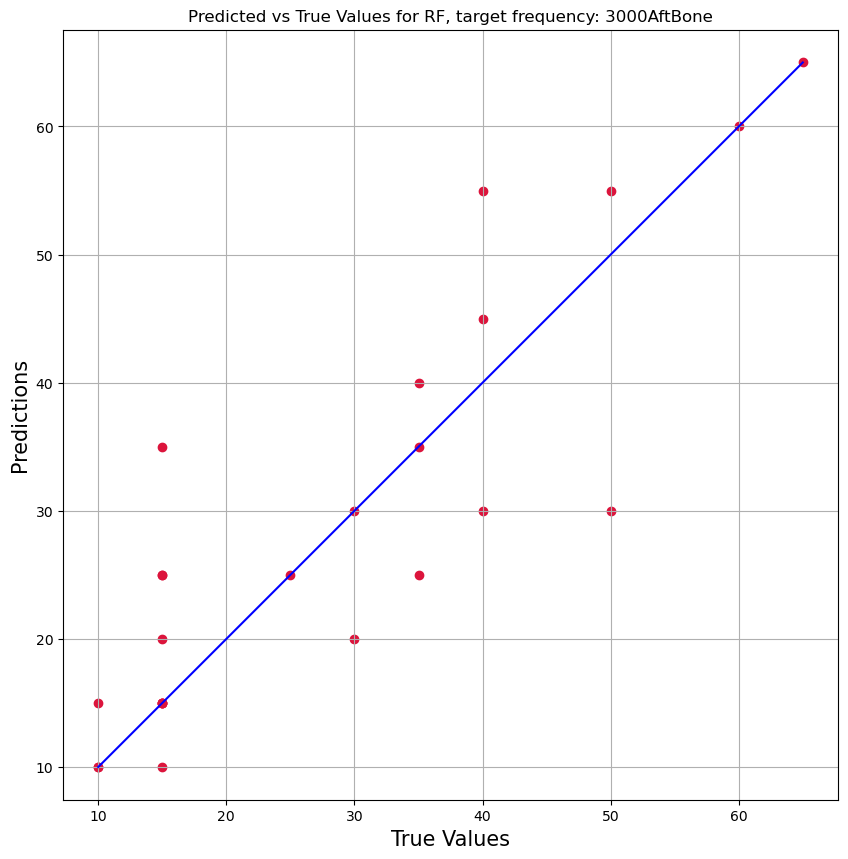

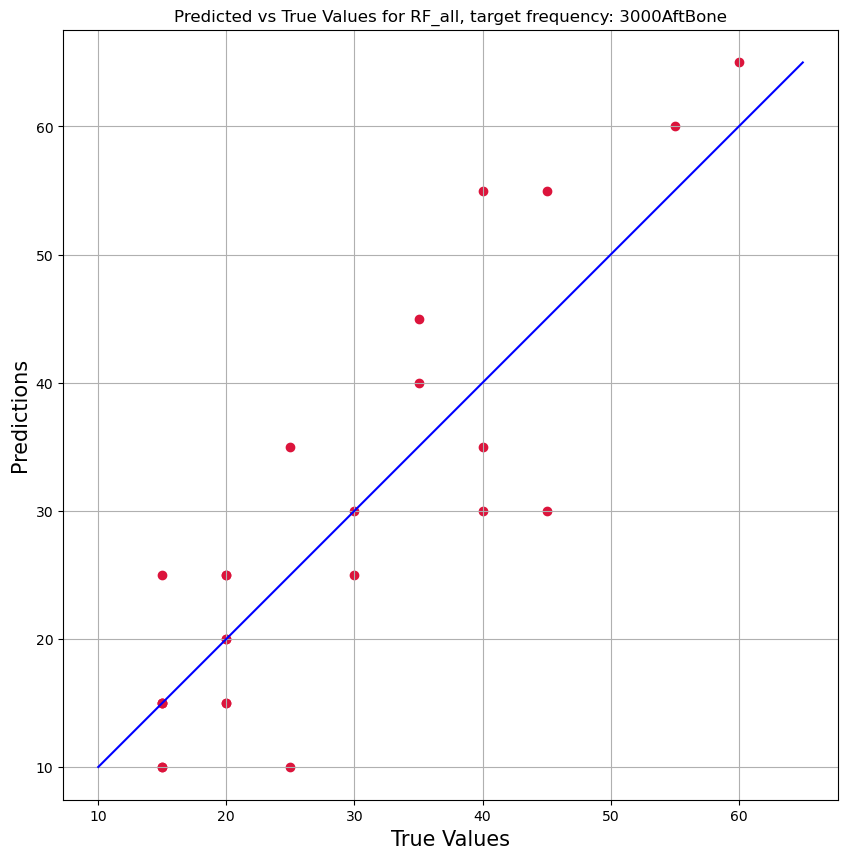

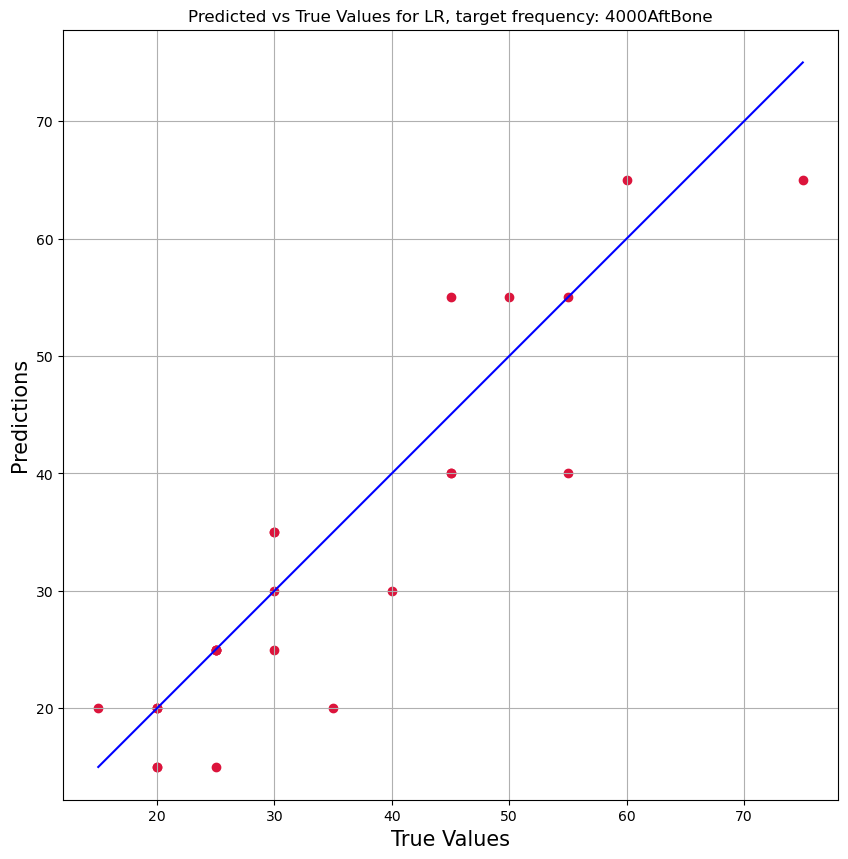

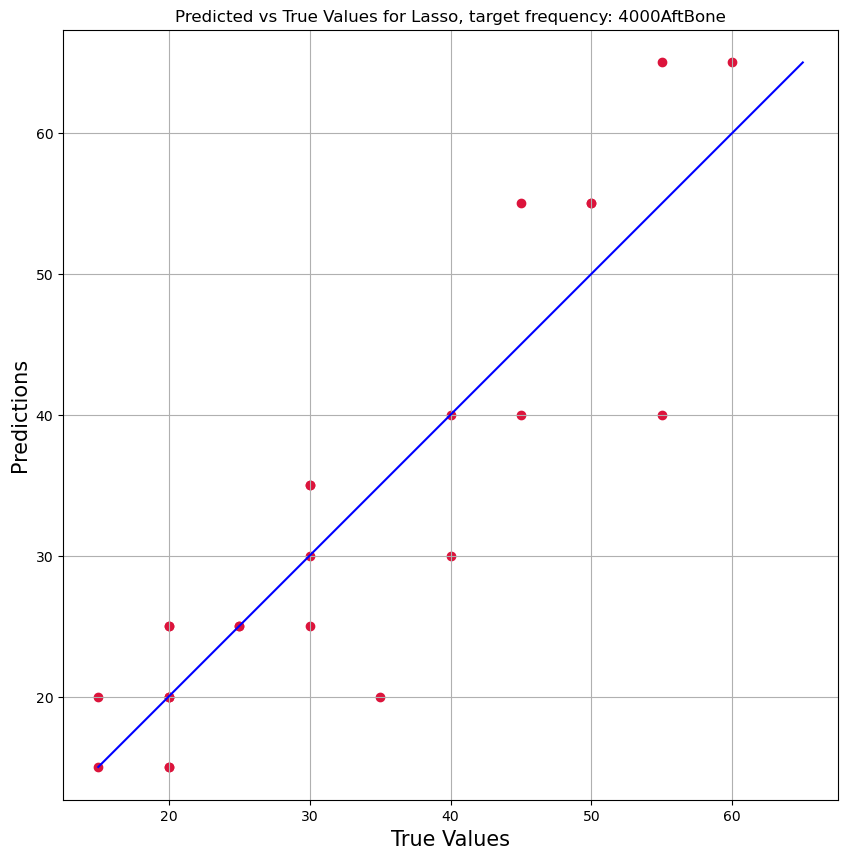

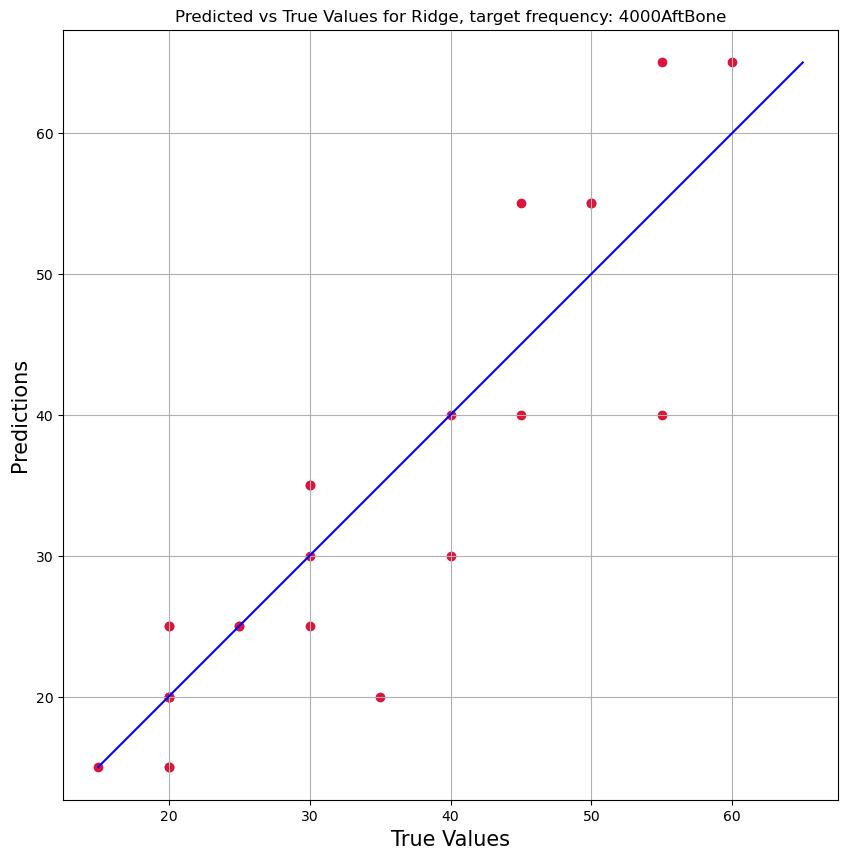

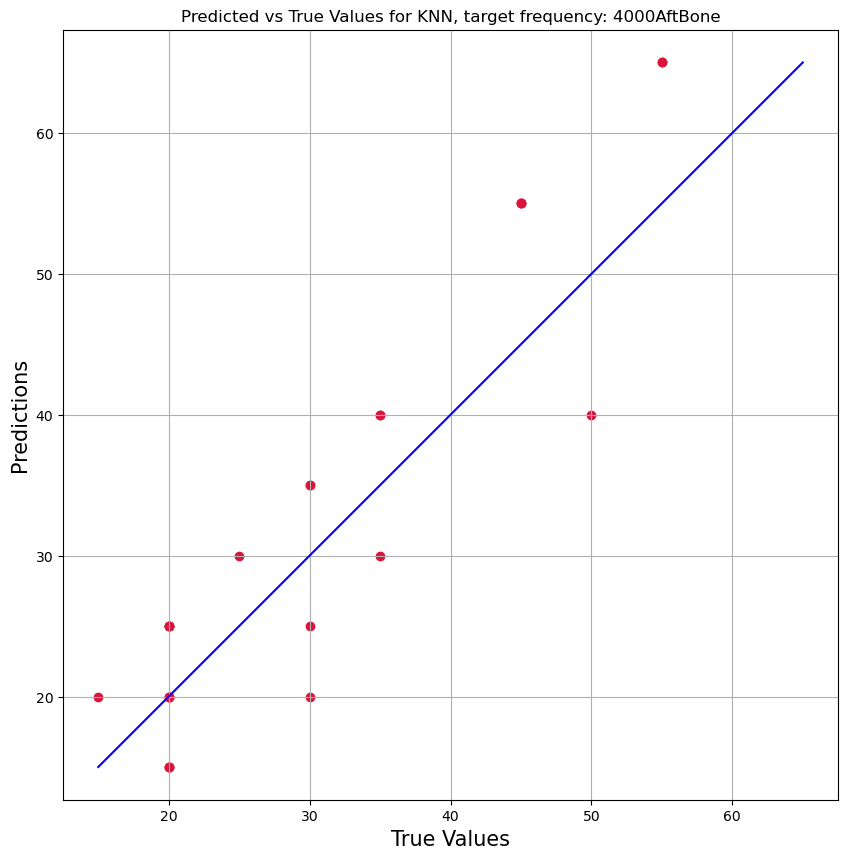

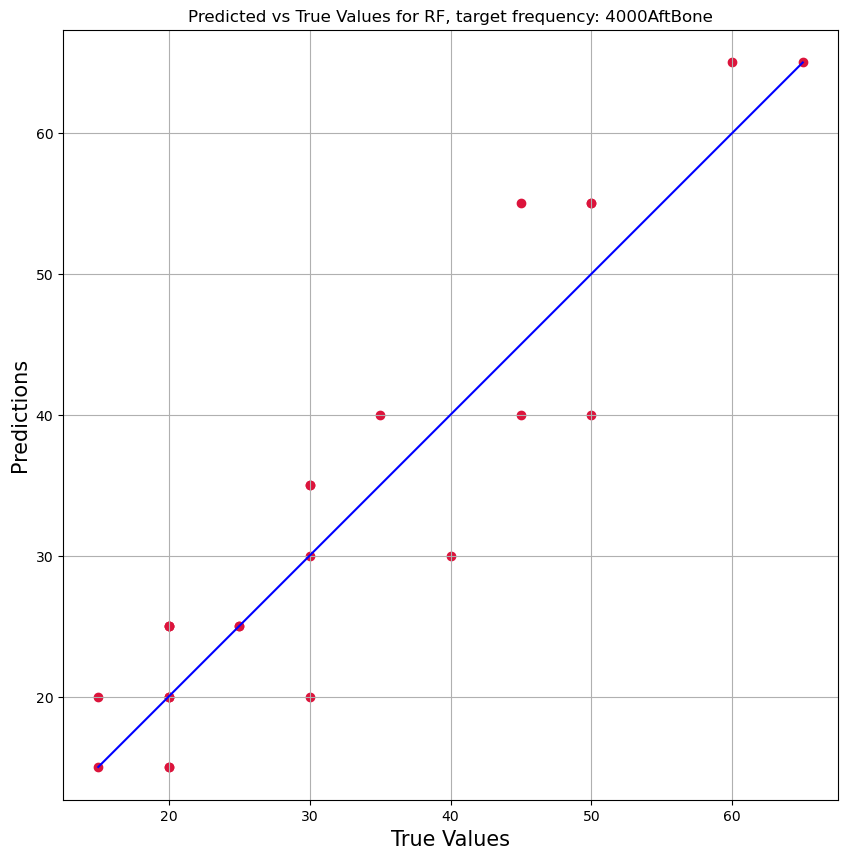

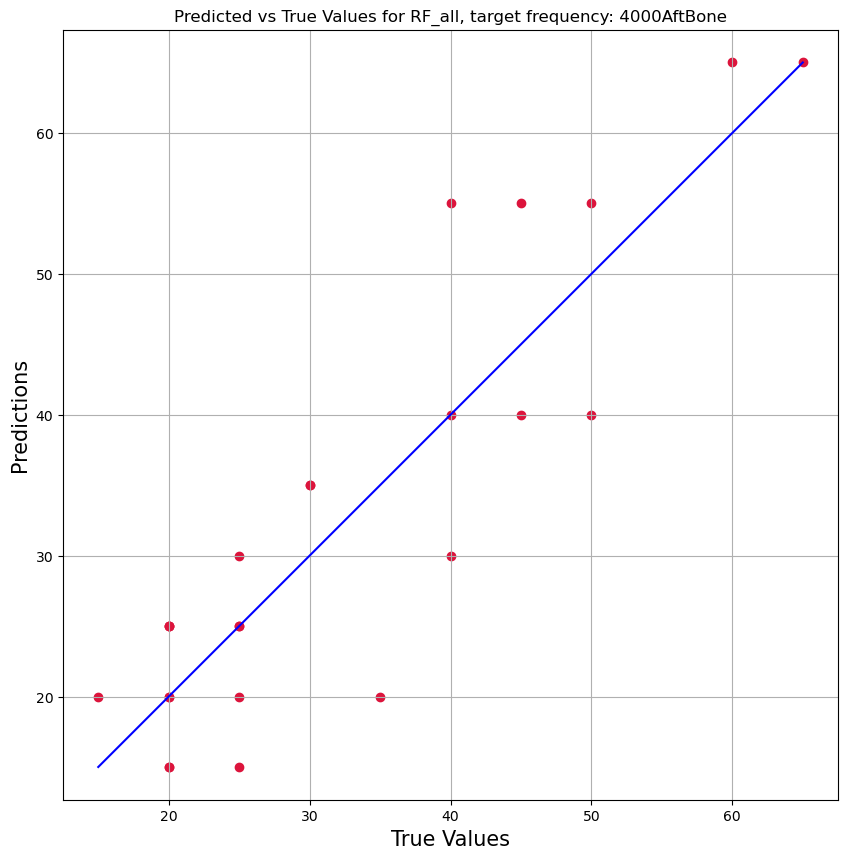

In [1]:
import funct
import constants
import importlib
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd
import numpy as np

importlib.reload(funct)


col_path = "variables/class_columns"
var_path = "variables/"


x_train = pd.read_csv(var_path + 'x_train.csv')
y_train = pd.read_csv(var_path + 'y_train.csv')
x_test = pd.read_csv(var_path + 'x_test.csv')
y_test = pd.read_csv(var_path + 'y_test.csv')

y_means = pd.read_csv('variables/ymeans.csv')
y_means = np.array(y_means)
x_means = pd.read_csv('variables/xmeans.csv')
x_means = np.array(x_means)
x_test_orig = pd.read_csv('variables/x_test_orig.csv')
naive_maesyavg = []
naive_maesxavg = []
naive_maesx = []
naive_stdsyavg = []
naive_stdsxavg = []
naive_stdsx = []

filters = funct.load_pickle(col_path)  

outer_cv = KFold(n_splits=10, shuffle=True, random_state=0)

models = ["LR","Lasso","Ridge","KNN","RF","RF_all"]

mae_df = pd.DataFrame(index=y_train.columns,columns=models)
mae_rd_df = pd.DataFrame(index=y_train.columns,columns=models)
std_df = pd.DataFrame(index=y_train.columns,columns=models)
r2_df = pd.DataFrame(index=y_train.columns,columns=["LR","Lasso","Ridge"])

best_models = []
all_features = np.zeros(16)

for i in range(16):
    x_cols = filters[i]
    x_train_sel = x_train[x_cols]
    y_train_i = y_train.iloc[:,i]
    y_test_i = y_test.iloc[:,i]
    x_test_sel = x_test[x_cols]

    print(x_cols)   
    
    print(y_train_i.name)
    
    tmp_maes = []
    tmp_maes_rd=[]
    tmp_stds = []
    tmp_r2s = []

    ols_model = LinearRegression()
    ols_model.fit(x_train, y_train_i)

    ols_predicted = ols_model.predict(x_test)
    ols_predicted_rounded = funct.predict_and_round(ols_model,x_test)


    ols_test_mae = mean_absolute_error(y_test_i,ols_predicted)
    ols_test_pr_mae = mean_absolute_error(y_test_i,ols_predicted_rounded)
    ols_test_r2 = r2_score(y_test_i,ols_predicted)
    ols_test_std = np.std(y_test_i - ols_predicted)

    funct.plot_predicted_vs_target(y_test_i,ols_predicted_rounded,models[0],y_train_i.name)

    ols_scores = f"{ols_test_std = }\n" \
                 f"{ols_test_r2 = }\n" \
                 f"{ols_test_mae = }\n" \
                    #f"{ols_score_mean = }\n" \
    print(ols_scores)
    
    tmp_maes.append(ols_test_mae)
    tmp_maes_rd.append(ols_test_pr_mae)   
    tmp_stds.append(ols_test_std)
    tmp_r2s.append(ols_test_r2)

    lasso_model_opt = LassoCV(cv=10, random_state=1).fit(x_train_sel, y_train_i)
    lasso_model = Lasso(lasso_model_opt.alpha_)
    lasso_model.fit(x_train_sel, y_train_i)

    lasso_predicted = lasso_model.predict(x_test_sel)
    lasso_predicted_rounded = funct.predict_and_round(lasso_model,x_test_sel)

    lasso_test_mae = mean_absolute_error(y_test_i,lasso_predicted)
    lasso_test_pr_mae = mean_absolute_error(y_test_i,lasso_predicted_rounded)
    lasso_test_r2 = r2_score(y_test_i,lasso_predicted)
    lasso_test_std = np.std(y_test_i - lasso_predicted)

    funct.plot_predicted_vs_target(y_test_i,lasso_predicted_rounded,models[1],y_train_i.name)


    lasso_scores =  f"{lasso_test_mae = }\n" \
                    f"{lasso_test_r2 = }\n" \
                    f"{lasso_test_std = }\n" \
                    # f"{ridge_score_mean = }\n" \
    print(lasso_scores)
    tmp_maes.append(lasso_test_mae)
    tmp_maes_rd.append(lasso_test_pr_mae)   
    tmp_stds.append(lasso_test_std)
    tmp_r2s.append(lasso_test_r2)
    #3


    ridge_alphas = np.arange(10) + 1
    ridge_model_opt = RidgeCV(alphas=ridge_alphas,cv=None,store_cv_values=True).fit(x_train_sel, y_train_i)

    ridge_model = Ridge(ridge_model_opt.alpha_)

    ridge_model.fit(x_train_sel, y_train_i)

    ridge_predicted = ridge_model.predict(x_test_sel)
    ridge_predicted_rounded = funct.predict_and_round(ridge_model,x_test_sel)

    ridge_test_mae = mean_absolute_error(y_test_i,ridge_predicted)
    ridge_test_pr_mae = mean_absolute_error(y_test_i,ridge_predicted_rounded)
    ridge_test_r2 = r2_score(y_test_i,ridge_predicted)
    ridge_test_std = np.std(y_test_i - ridge_predicted)

    funct.plot_predicted_vs_target(y_test_i,ridge_predicted_rounded,models[2],y_train_i.name)


    ridge_scores =  f"{ridge_test_mae = }\n" \
                    f"{ridge_test_r2 = }\n" \
                    f"{ridge_test_std = }\n" \
                    # f"{ridge_score_mean = }\n" \
    print(ridge_scores)
    tmp_maes.append(ridge_test_mae)
    tmp_maes_rd.append(ridge_test_pr_mae)   
    tmp_stds.append(ridge_test_std)
    tmp_r2s.append(ridge_test_r2)


    param_grid = {'n_neighbors': [3, 5, 7, 9]}
    grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
    grid_search.fit(x_train_sel, y_train_i)
    print(grid_search.best_params_)

    knn_model = KNeighborsRegressor(n_neighbors=grid_search.best_params_["n_neighbors"])

    knn_model.fit(x_train_sel, y_train_i)

    knn_predicted = knn_model.predict(x_test_sel)
    knn_predicted_rounded = funct.predict_and_round(knn_model,x_test_sel)

    knn_test_mae = mean_absolute_error(y_test_i,knn_predicted)
    knn_test_pr_mae = mean_absolute_error(y_test_i,knn_predicted_rounded)
    knn_test_r2 = r2_score(y_test_i,knn_predicted)
    knn_test_std = np.std(knn_predicted - y_test_i)

    funct.plot_predicted_vs_target(y_test_i,knn_predicted_rounded,models[3],y_train_i.name)

    knn_scores =  f"{knn_test_mae = }\n" \
                    f"{knn_test_r2 = }\n" \
                    f"{knn_test_std = }\n" \
                    # f"{ridge_score_mean = }\n" \
    print(knn_scores)
    tmp_maes.append(knn_test_mae)
    tmp_maes_rd.append(knn_test_pr_mae)   
    tmp_stds.append(knn_test_std)

    param_grid = {
        'max_depth': [5, 10, 20, 80, 90, 100],
        'max_features': [1,2, 3],
        'n_estimators': [50, 80, 100]
    }
    # Create a based model
    rf = RandomForestRegressor(random_state=33)
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)
    grid_search.fit(x_train_sel, y_train_i)
    rf_model = RandomForestRegressor(random_state=33)  #random_state=1
    rf_model.set_params(**grid_search.best_params_)
    #print(grid_search.best_params_)

    rf_model.fit(x_train_sel, y_train_i)
    
    rf_predicted = rf_model.predict(x_test_sel)
    rf_predicted_rounded = funct.predict_and_round(rf_model,x_test_sel)

    rf_test_mae = mean_absolute_error(y_test_i,rf_predicted)
    rf_test_pr_mae = mean_absolute_error(y_test_i,rf_predicted_rounded)
    rf_test_r2 = r2_score(y_test_i,rf_predicted)
    rf_test_std = np.std(y_test_i - rf_predicted)

    funct.plot_predicted_vs_target(y_test_i,rf_predicted_rounded,models[4],y_train_i.name)


    rf_scores =  f"{rf_test_mae = }\n" \
                    f"{rf_test_r2 = }\n" \
                    f"{rf_test_std = }\n" \
                    # f"{ridge_score_mean = }\n" \
    print(rf_scores)
    tmp_maes.append(rf_test_mae)
    tmp_maes_rd.append(rf_test_pr_mae)   
    tmp_stds.append(rf_test_std)
    #tmp_r2s.append(rf_test_r2)

    # Create a based model
    rf = RandomForestRegressor(random_state=33)
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)
    grid_search.fit(x_train, y_train_i)
    rfall_model = RandomForestRegressor(random_state=33)  #random_state=1
    rfall_model.set_params(**grid_search.best_params_)
    print(grid_search.best_params_)    

    rfall_model.fit(x_train, y_train_i)

    rf_predicted = rfall_model.predict(x_test)
    rf_predicted_rounded = funct.predict_and_round(rfall_model,x_test)

    print("Random Forest with all features")
    rf_test_mae = mean_absolute_error(y_test_i,rf_predicted)
    rf_test_pr_mae = mean_absolute_error(y_test_i,rf_predicted_rounded)
    rf_test_r2 = r2_score(y_test_i,rf_predicted)
    rf_test_std = np.std(y_test_i - rf_predicted)

    funct.plot_predicted_vs_target(y_test_i,rf_predicted_rounded,models[5],y_train_i.name)


    rf_scores =  f"{rf_test_mae = }\n" \
                    f"{rf_test_r2 = }\n" \
                    f"{rf_test_std = }\n" \
                    # f"{ridge_score_mean = }\n" \
    print(rf_scores)
    tmp_maes.append(rf_test_mae)
    tmp_maes_rd.append(rf_test_pr_mae)   
    tmp_stds.append(rf_test_std)

    mae_df.iloc[i] = tmp_maes
    mae_rd_df.iloc[i] = tmp_maes_rd
    std_df.iloc[i] = tmp_stds
    r2_df.iloc[i] = tmp_r2s

    bestmodelindex = tmp_maes.index(min(tmp_maes))
    if(bestmodelindex == 0):
        best_models.append(ols_model)
        all_features[i] = 1
    if(bestmodelindex == 1):
        best_models.append(lasso_model)
    elif(bestmodelindex == 2):
        best_models.append(ridge_model)
    elif(bestmodelindex == 3):
        best_models.append(knn_model)
    elif(bestmodelindex == 4):
        best_models.append(rf_model)
    elif(bestmodelindex == 5):
        best_models.append(rfall_model)
        all_features[i] = 1

    # naive method "predictions" for comparison
    # also calculate error with mean absolute error measure
    y_mean_i = y_means[i]
    test_mean_vect = np.zeros((y_test_i.shape[0],1))
    test_mean_vect += y_mean_i
    test_mean_vect = test_mean_vect.reshape(-1)
    naive_mae = mean_absolute_error(y_test_i,test_mean_vect)
    naive_maesyavg.append(naive_mae)
    naive_stdsyavg.append(np.std(y_test_i - test_mean_vect))


    print(constants.FQ_FEATURES[i])
    x_test_i_orig = x_test_orig[constants.FQ_FEATURES[i]].astype('float')
    naive_mae = mean_absolute_error(y_test_i,x_test_i_orig)
    naive_maesx.append(naive_mae)
    naive_stdsx.append(np.std(y_test_i - x_test_i_orig))

    x_mean_i = x_means[i]
    test_mean_vect = np.zeros((y_test_i.shape[0],1))
    test_mean_vect += x_mean_i
    test_mean_vect = test_mean_vect.reshape(-1)
    naive_mae = mean_absolute_error(y_test_i,test_mean_vect)
    naive_maesxavg.append(naive_mae)
    naive_stdsxavg.append(np.std(y_test_i - test_mean_vect))

    

In [2]:
naive_df_maes = pd.DataFrame(index=constants.FQ_FEATURES,columns=['yavg','xavg','x'])
naive_df_stds = pd.DataFrame(index=constants.FQ_FEATURES,columns=['yavg','xavg','x'])
naive_df_maes['yavg'] = naive_maesyavg
naive_df_maes['xavg'] = naive_maesxavg
naive_df_maes['x'] = naive_maesx

naive_df_stds['yavg'] = naive_stdsyavg
naive_df_stds['xavg'] = naive_stdsxavg
naive_df_stds['x'] = naive_stdsx
print(naive_df_maes)
print(naive_df_stds)

                  yavg       xavg     x
125BefAir    12.210204  21.500000  20.8
250BefAir    11.842857  25.012245  25.2
500BefAir    10.726531  29.151020  29.4
1000BefAir   11.122449  26.067347  26.6
1500BefAir   10.234694  21.228571  20.0
2000BefAir   11.528571  22.628571  20.8
3000BefAir   14.522449  21.520408  16.4
4000BefAir   15.983673  20.812245  14.8
6000BefAir   19.795918  21.728571  10.6
8000BefAir   23.428571  23.551020  11.8
500BefBone    7.800000   9.342857   5.6
1000BefBone   8.136735   8.504082   6.0
1500BefBone   9.861224  10.473469   5.4
2000BefBone  12.273469  12.665306   6.2
3000BefBone  12.730612  13.238776   6.2
4000BefBone  12.669388  12.618367   4.2
                  yavg       xavg          x
125BefAir    14.921126  14.921126  13.948477
250BefAir    15.499677  15.499677  15.099669
500BefAir    15.393505  15.393505  15.740394
1000BefAir   15.038617  15.038617   9.134550
1500BefAir   14.579438  14.579438   8.246211
2000BefAir   15.081114  15.081114   7.304793
3000B

In [3]:
print(best_models)

[Lasso(alpha=0.006321188026816793), RandomForestRegressor(max_depth=5, max_features=1, n_estimators=50,
                      random_state=33), LinearRegression(), LinearRegression(), Ridge(alpha=10), RandomForestRegressor(max_depth=20, max_features=3, n_estimators=80,
                      random_state=33), LinearRegression(), RandomForestRegressor(max_depth=20, max_features=2, n_estimators=50,
                      random_state=33), Lasso(alpha=0.013576428257668622), KNeighborsRegressor(n_neighbors=9), LinearRegression(), LinearRegression(), RandomForestRegressor(max_depth=5, max_features=3, random_state=33), LinearRegression(), Ridge(alpha=1), RandomForestRegressor(max_depth=5, max_features=2, random_state=33)]


In [ ]:
startcol = 0
# Create an empty excel file in the same folder before executing this
with pd.ExcelWriter("test_results.xlsx", engine='openpyxl', mode="a") as writer:
    # Write each DataFrame to a separate sheet
    mae_df.to_excel(writer, sheet_name='MAE2',startcol=startcol, index=False)
    mae_rd_df.to_excel(writer, sheet_name='MAE_RD2',startcol=startcol, index=False)
    r2_df.to_excel(writer, sheet_name='R22',startcol=startcol,index=False)
    std_df.to_excel(writer, sheet_name='STD2',startcol=startcol,index=False)


funct.save_pickle(best_models,'models/best_models',True)
funct.save_np(all_features,"variables/ignore_filters",True)